# code and date adapted and get from 
/code/MNF/notebooks/STRING_Data_11.5/test_withLowDCA_phylumeffect_STRINGPhyBalancePhyla_visulization_fullHomologous_oneBestHomologousPP.ipynb


# load lib and set data 

In [2]:
import sys
import os 
import pandas as pd
import numpy as np 
import copy 
import random
from collections import defaultdict
import pickle
import glob

import multiprocessing as mp 
import subprocess

import matplotlib.pyplot as plt 
import seaborn as sns

from Bio import AlignIO
from Bio import SeqIO
from Bio.Blast import NCBIXML


from Bio.PDB import PDBParser

import networkx as nx
from pyvis.network import Network #https://pyvis.readthedocs.io/en/latest/
from sklearn.manifold import MDS



from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import ADASYN
from sklearn.utils import shuffle

import  sklearn.metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer





import pkg_resources



In [3]:
# set number of thread used by pydca 
# better set these before actuall load python library 
#https://stackoverflow.com/questions/30791550/limit-number-of-threads-in-numpy
    

import os
os.environ["OMP_NUM_THREADS"] = "4" # export OMP_NUM_THREADS=4

os.environ["MKL_NUM_THREADS"] = "4" # export MKL_NUM_THREADS=6

os.environ["NUMBA_NUM_THREADS"] = "4" # export NUMBA_NUM_THREADS=6
#set tocken

In [571]:
%reload_ext autoreload
%autoreload 2

sys.path.append('/mnt/mnemo5/tao/code/MNF/src/tao_utilities/')

from ROC_curve import DCA_RocCurve
from ROC_curve import Random_RocCurve
from ROC_curve import Precison_Recall_RocCurve

#from PPI_benchmark_comparison import topDCAs_ML_predictions
from Check_SameCogPair_problem import sepCogPairs_topDCAs_ML_predictions_getTestPPTuples
from Check_SameCogPair_problem import sepCogPairs_topDCAs_ML_predictions


from IntergrateBestHomologousPPCoEvo_unNameSorted import getMetaFrame_withHighDCA
from IntergrateBestHomologousPPCoEvo_unNameSorted import chooseBestHomologousPP
from IntergrateBestHomologousPPCoEvo_unNameSorted import sepCogPairs_topDCAs_IndependentBenchPlusBestHomologousHighDCAPP_ML_predictions
from IntergrateBestHomologousPPCoEvo_unNameSorted import get_QueryInfo_FullBestHomologousPP
from IntergrateBestHomologousPPCoEvo_unNameSorted import get_BestHomologousDCAs_fromMultiSpes
from IntergrateBestHomologousPPCoEvo_unNameSorted import get_BestHomologousDCAs_fromMultiSpes_checkOrthologDCA


from IntergrateBestHomologousPPCoEvo_unNameSorted import sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions
from IntergrateBestHomologousPPCoEvo_unNameSorted import getMLPrediction_withHighDCA
from IntergrateBestHomologousPPCoEvo_unNameSorted import get_QueryMLPrediction_IndependentBenchPlusBestHomologouHighDCAPPDCAs
from IntergrateBestHomologousPPCoEvo_unNameSorted import get_topDCAPosInSingleMSA_HighDCA_Dict
from IntergrateBestHomologousPPCoEvo_unNameSorted import get_BestHomologousMLPredictions_fromMultiSpes
#from IntergrateBestHomologousPPCoEvo_unNameSorted import IndependentBenchPlusBestHomologousHighDCAPPDCAs_BestHomologousMLPredictions_ML_predictions
from IntergrateBestHomologousPPCoEvo_unNameSorted import sepCogPairs_IndependentBenchPlusBestHomologousHighDCAPPDCAs_BestHomologousMLPredictions_uniquePhyla_ML_predictions


from IntergrateBestHomologousPPCoEvo_unNameSorted import get_topDCAPosInSingleMSA_BestHomologousPP_frameDict
from IntergrateBestHomologousPPCoEvo_unNameSorted import topDCAPosInSingleMSA_frameDict2dictDict
from IntergrateBestHomologousPPCoEvo_unNameSorted import topDCAPosInSingleMSA_frameDict2dictDict_reversedPP
from IntergrateBestHomologousPPCoEvo_unNameSorted import topDCAs_PosInSingleMSA2oriPos
from IntergrateBestHomologousPPCoEvo_unNameSorted import topDCAs_PosInSingleMSA2_2oriPos_2SubjectOripos
from IntergrateBestHomologousPPCoEvo_unNameSorted import plot_TopDCAPosForHomologousPP_PosInSingleMSA
from IntergrateBestHomologousPPCoEvo_unNameSorted import numberOfOverlappedTopDCAPosForHomologousPP_PosInSingleMSA


from IntergrateBestHomologousPPCoEvo_unNameSorted import collect_BestHomologousDCAs_OneSpeOneScore_OnlyTopPosNeg

from IntergrateBestHomologousPPCoEvo_unNameSorted import sepCogPairs_smallPhylum_topDCAs_IndependentBenchPlusBestHomologousHighDCAPP_ML_predictions



from IntergrateBestHomologousPPCoEvo_unNameSorted import replacingDCAScores_sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions
from IntergrateBestHomologousPPCoEvo_unNameSorted import replacingOtherPhalaDCAScores_sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions

from IntergrateBestHomologousPPCoEvo_unNameSorted import inputation_sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions
from IntergrateBestHomologousPPCoEvo_unNameSorted import sortedOtherPhyla_FullPhylaIntegration_uniquePhyla_ML_predictions

from IntergrateBestHomologousPPCoEvo_top5_unNameSorted import get_QueryInfo_top5DCAs_FullBestHomologousPP
from IntergrateBestHomologousPPCoEvo_top5_unNameSorted import get_BestHomologousDCAs_top5DCAs_fromMultiSpes
from IntergrateBestHomologousPPCoEvo_top5_unNameSorted import VariousReplacing_sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_top5DCAs_uniquePhyla_ML_predictions

from biasCheck import get_PPIwithTwoRibosomes_OnlyTest
from biasCheck import get_PPIwithoutWithinRibosomess_OnlyTest
from biasCheck import get_PPIwithNf90Sepration_OnlyTest
from biasCheck import  getAllIdxOf_fixed_negVSpos_ratio
from biasCheck import getAllIdxOf_fixed_negVSpos_ratio_keepCombination

from collect_topCoEvos import collect_Nf90lenPair
from collect_topCoEvos import sepCogPairs_ML_predictions_allTypeFeas
from collect_topCoEvos import get_topRanking_CoEvo_file


In [5]:
Subject_tuple=('1224', '511145')
Query_tupleList=[("1239","1274374"),('201174', '105422'), ('976', '411476'),] #[('1224', '287'),("1239","1274374"),('201174', '105422'), ('976', '411476'),]
smallPhylum_Query_tupleList=[] #[('2','179408'),]

In [6]:
CoEvo_data_folder="/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING"+"11.5"+"/"
Subject_input_root_folder=CoEvo_data_folder+Subject_tuple[1]+"_EggNOGmaxLevel"+Subject_tuple[0]+"_eggNOGfilteredData/"
Subect_Benchmark_folder=Subject_input_root_folder+"STRINGPhyBalancePhyla_Benchmark/"
Subect_ML_inputPath=Subect_Benchmark_folder+"ML_inputs/"

Subject_DCA_coevolutoin_path=Subject_input_root_folder+"coevolutoin_result_DCA/"

ecoli_alpahfold_fileNames = "/mnt/mnemo6/damian/STRING_derived_v11.5/alphafold/mapping/83333.511145.tsv"

Subect_ML_inputPath

'/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGPhyBalancePhyla_Benchmark/ML_inputs/'

In [7]:
Subject_DCA_coevolutoin_path,Subect_Benchmark_folder

('/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/coevolutoin_result_DCA/',
 '/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGPhyBalancePhyla_Benchmark/')

In [8]:

EggNOG_groupPath="/mnt/mnemo6/tao/STRING_Data_11.5/eggnog5AddSTRING11.5_Species/groups/"
homologous_ppPath="/mnt/mnemo6/tao/PPI_Coevolution/STRING_data_11.5/homologous_pp/"
homologous_SeqMappingPath="/mnt/mnemo6/tao/PPI_Coevolution/STRING_data_11.5/homologous_pp/SeqMapping/"

# now  BestHomologous_SeqMappingPath is same as homologous_SeqMappingPath
# but when prepare new pileline start only with best homologous protein pairs to calcuate DCA . 
# change here 
BestHomologous_SeqMappingPath="/mnt/mnemo6/tao/PPI_Coevolution/STRING_data_11.5/homologous_pp/SeqMapping/"

homologous_msa2origMappingPath="/mnt/mnemo6/tao/PPI_Coevolution/STRING_data_11.5/homologous_pp/mas2origMapping/"

newSTRING_rootFolder="/mnt/mnemo6/tao/PPI_Coevolution/STRING_data_11.5/"
Subject_msa_trackGapsPos_path=newSTRING_rootFolder+Subject_tuple[1]+"_EggNOGmaxLevel"+Subject_tuple[0]+"_newSingleMSA_hmmalign_removeGaps_trackGapPos/"   



In [9]:
%%time
# read cog information 
max_level="2" #"2", "1224"
EggNOG_group_level2=pd.read_csv(EggNOG_groupPath+max_level+".tsv",
                                header=None,index_col=None,sep="\t")


# CPU times: user 25.6 s, sys: 3.03 s, total: 28.7 s
# Wall time: 28.7 s


CPU times: user 22.9 s, sys: 2.78 s, total: 25.7 s
Wall time: 25.7 s


In [10]:
# print(Subject_currentSpeMiddleDataPath)
# with open(Subject_currentSpeMiddleDataPath+'fasta_protein_lens_dict.pickle', 'rb') as handle:
#     fasta_protein_lens=pickle.load(handle)
    
    

In [11]:

# read protein name file 
ecoli_proteinNames=pd.read_csv("/mnt/mnemo5/tao/STRING/511145.protein.info.v11.0.txt",
                              header=0,index_col=None, sep="\t")
print(ecoli_proteinNames.shape)
#ecoli_proteinNames.head(n=3)

ecoli_proteinNames_dict=dict(ecoli_proteinNames.loc[:,["protein_external_id","preferred_name"]].values.tolist())

ecoli_proteinNames.head(n=3)


(4127, 4)


protein_external_id preferred_name  protein_size  \
0        511145.b0001           thrL            21   
1        511145.b0002           thrA           820   
2        511145.b0003           thrB           310   

                                          annotation  
0  Thr operon leader peptide; This protein is inv...  
1  Bifunctional: aspartokinase I (N-terminal); ho...  
2  Homoserine kinase; Catalyzes the ATP-dependent...

In [12]:


Nf90_filepath=Subject_input_root_folder+"pair_MSA_Nf90.csv"
Nf90_frame=pd.read_csv(Nf90_filepath,header=None,index_col=None,sep="\t")
print(Nf90_frame.shape)

Nf90_frame.head(n=3)



Nf90_list=Nf90_frame.values.tolist()
Nf90_dict={tuple((l[0],l[1])): l[4] for l in Nf90_list}
list(Nf90_dict.items())[0]


(125771, 5)


(('511145.b0009', '511145.b1727'), 20.866549035063457)

In [13]:
Subject_input_root_folder

'/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/'

# prepare best homologous protein pp 

In [14]:
# read mapping data from MNF/notebooks/STRING_Data_11.5/test_phylumeffect_homologousPPDetection.ipynb



In [15]:
Subect_Benchmark_folder

'/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGPhyBalancePhyla_Benchmark/'

In [16]:

with open("/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINPhyPPI_Benchmark/NameUnsorted_Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict.pickle", 'rb') as handle:
        Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict=pickle.load(handle)
        


In [17]:
for _,t_dict in Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict.items():
    print(_)
    print(len(t_dict))
    count=0
    for v in t_dict.values():
        count += len(v)
    print(count,count/2)

('1239', '1274374')
1510551
3021102 1510551.0
('201174', '105422')
1598711
3197422 1598711.0
('976', '411476')
1229632
2459264 1229632.0
('2', '179408')
1269201
2538402 1269201.0


In [18]:
Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict={k:v for k,v in Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict.items() if k in smallPhylum_Query_tupleList+Query_tupleList }

Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict.keys()

dict_keys([('1239', '1274374'), ('201174', '105422'), ('976', '411476')])

In [19]:
list(Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict[('1239', '1274374')].items())[0]



(('511145.b0003', '511145.b0004'),
 ('1274374.CBLK010000071_gene1043', '1274374.CBLK010000070_gene1131'))

# STRING 11.5, phylum 1224, species 511145

this is Subject species 

!!!!
So we just use independent benchmark dataset without BestHomologous protein pairs to train machine leanring model


and here we dont know same cog pairs in training and testing dataset together 
code adpated from "MNF/notebooks/STRING_Data_11.5/Check_SameCogPair_problem.ipynb"


In [20]:
_,STRING115EggNog1224Spe511145_topDCAs_PPTuples_test=sepCogPairs_topDCAs_ML_predictions_getTestPPTuples(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                                                                                          EggNOG_group_level2=EggNOG_group_level2,
                                                                           DCA_thres=0,benchmark_suffix="STRINGPhyBalancePhyla_Benchmark/")

STRING115EggNog1224Spe511145_topDCAs_PPTuples_testDict={tuple(pp):1 for pp in STRING115EggNog1224Spe511145_topDCAs_PPTuples_test}
print(len(STRING115EggNog1224Spe511145_topDCAs_PPTuples_testDict))

allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
after filtering,  (32619, 7)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 32619
len(allPPI_PPs): 32619
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 6524 658 5866
len(all_PPTuples_train),len(all_PPTuples_test): 26753 5866
5866


In [21]:
%%time
#why suddently becase so now ? because i update conda ?
STRING115EggNog1224Spe511145_topDCAs_predicted_results=sepCogPairs_topDCAs_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                                                                                          EggNOG_group_level2=EggNOG_group_level2,
                                                                           ML_methods=["LR","RF"],
                                                                           DCA_thres=0,DCA_number=50,selDca_number=20,
                                                                            benchmark_suffix="STRINGPhyBalancePhyla_Benchmark/",
                                                                                          ifReCollect=False,
                                                                                         saveFrame=True,
                                                                                         overwrite=False)

# CPU times: user 1min 23s, sys: 16.2 s, total: 1min 39s
# Wall time: 4min 16s


ML_inputs: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGPhyBalancePhyla_Benchmark/ML_inputs/
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 32619
len(allPPI_info): 32619
top_CoEvo_frame.shape: (32619, 152)
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (26095, 20) (6524, 20) (26095,) (6524,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 6524 658 5866
XtopDCAs_train.shape,ytopDCAs_train.shape,sum(ytopDCAs_train),ytopDCAs_test.shape,sum(ytopDCAs_test): (26753, 20) (26753,) 4595.0 (5866,) 937.0
train LR now _:
train RF now _:
save_allPPI_allIn

In [22]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results.keys()

dict_keys(['XtopDCAs', 'YtopDCAs', 'XtopDCAs_train', 'XtopDCAs_test', 'ytopDCAs_train', 'ytopDCAs_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

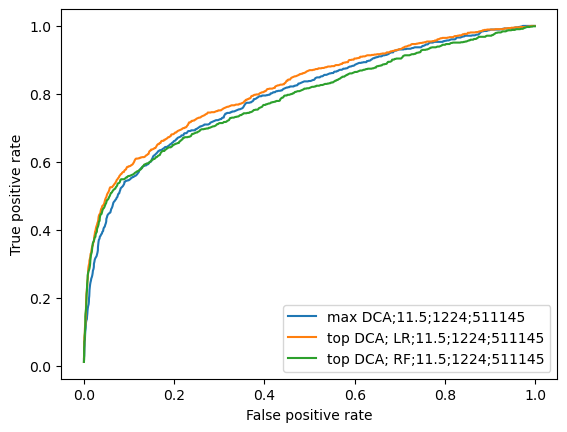

In [23]:

count_label="rate"
step=10
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step)



plt.show()

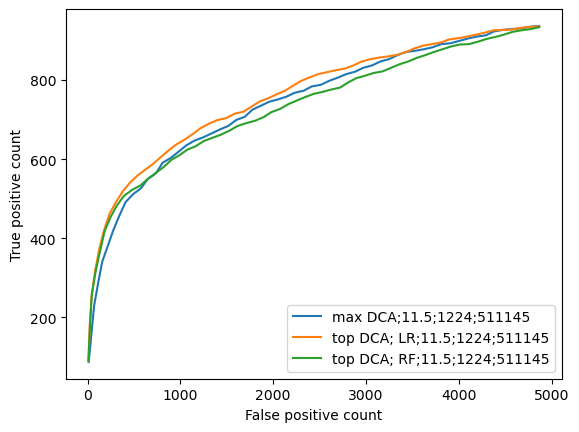

In [24]:

count_label="count"
step=100
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step)



plt.show()

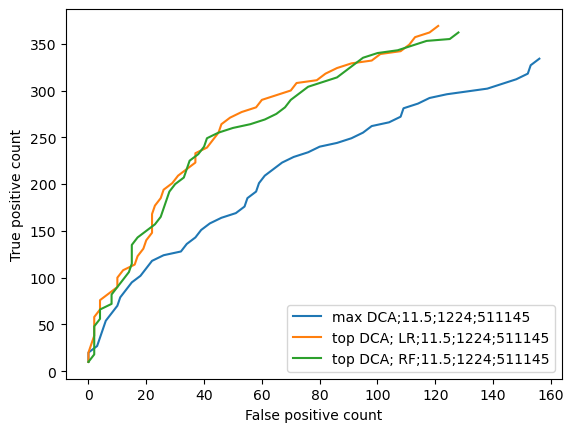

In [25]:

count_label="count"
step=10
zoom_thres=500
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



plt.show()

## check ribosome effect 



In [26]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results.keys()

dict_keys(['XtopDCAs', 'YtopDCAs', 'XtopDCAs_train', 'XtopDCAs_test', 'ytopDCAs_train', 'ytopDCAs_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [27]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results["updated_allPPI_allInfo_frame"]["status"]=[1 if s=="P" else 0 for s in STRING115EggNog1224Spe511145_topDCAs_predicted_results["updated_allPPI_allInfo_frame"]["benchmark_status"]]




In [28]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results["updated_allPPI_allInfo_frame"]

STRING_ID1    STRING_ID2 benchmark_status  maxBetDCA_score  \
0      511145.b3312  511145.b3318                P           7.3076   
1      511145.b1089  511145.b1716                P           6.6822   
2      511145.b1089  511145.b3294                P           5.6763   
3      511145.b1807  511145.b3064                P           4.8094   
4      511145.b4098  511145.b4100                P           4.4507   
...             ...           ...              ...              ...   
7960   511145.b0116  511145.b1525                N           0.4125   
25259  511145.b2075  511145.b3813                N           0.4114   
29044  511145.b2866  511145.b4221                N           0.4080   
7958   511145.b0116  511145.b1285                N           0.4016   
28941  511145.b2820  511145.b3266                N           0.3868   

       maxBetMI_score  len1  len2  LR_onesProb  RF_onesProb  status  
0              0.1296    63    99     0.991530     0.842035       1  
1              0.1436    56   117     0.999345     1.000000       1  
2              0.0934    56   127     0.996620     0.978527       1  
3              0.0942   220   337     0.998043     0.875832       1  
4              0.1398   281   194     0.991638     0.978578       1  
...               ...   ...   ...          ...          ...     ...  
7960           0.0123   469   460     0.015139     0.040209       0  
25259          0.0149  1023   718     0.017457     0.004643       0  
29044          0.0374   740  1226     0.016300     0.040209       0  
7958           0.0137   469   535     0.015623     0.040209       0  
28941          0.0162   842  1008     0.015620     0.040209       0  

[32619 rows x 10 columns]

In [29]:
test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_topDCAs_predicted_frame=get_PPIwithoutWithinRibosomess_OnlyTest(allPPI_allInfoFrame=STRING115EggNog1224Spe511145_topDCAs_predicted_results["updated_allPPI_allInfo_frame"],
                          proteinNames_dict=ecoli_proteinNames_dict,
                          testDict=STRING115EggNog1224Spe511145_topDCAs_PPTuples_testDict)

print(test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_topDCAs_predicted_frame.shape)
print(sum(test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_topDCAs_predicted_frame["status"]))

(5538, 10)
611


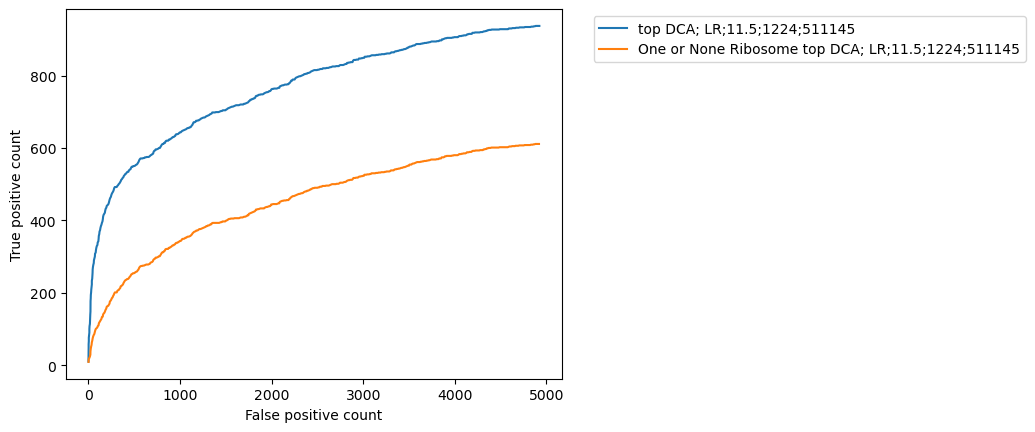

In [30]:
count_label="count"
step=10
zoom_thres=None

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




DCA_RocCurve(np.array(test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_topDCAs_predicted_frame['LR_onesProb']), 
             np.array(test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_topDCAs_predicted_frame["status"]),
             count_label=count_label,legend="One or None Ribosome top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

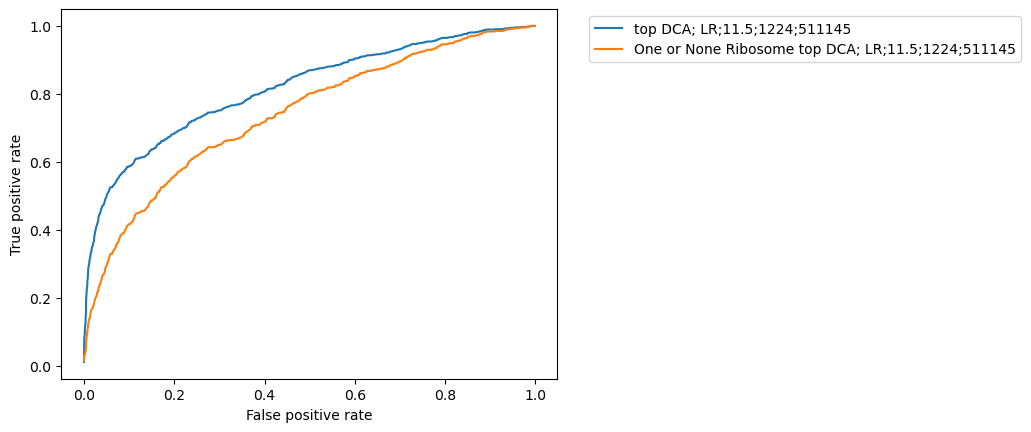

In [31]:
count_label="rate"
step=10
zoom_thres=None



DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(np.array(test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_topDCAs_predicted_frame['LR_onesProb']), 
             np.array(test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_topDCAs_predicted_frame["status"]),
             count_label=count_label,legend="One or None Ribosome top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

## check Nf90 effect 



In [32]:
test_LargeNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame,test_SmallNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame= get_PPIwithNf90Sepration_OnlyTest(allPPI_allInfoFrame=STRING115EggNog1224Spe511145_topDCAs_predicted_results["updated_allPPI_allInfo_frame"],
                          Nf90_dict=Nf90_dict,
                          testDict=STRING115EggNog1224Spe511145_topDCAs_PPTuples_testDict,
                        Nf90_sepThres=50,)
print(test_LargeNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame.shape)
print(test_SmallNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame.shape)

(2899, 10)
(2967, 10)


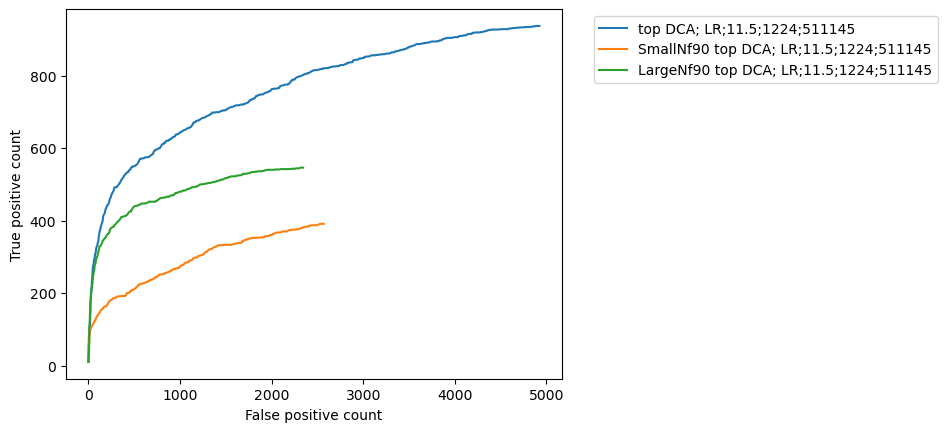

In [33]:
count_label="count"
step=10
zoom_thres=None

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(np.array(test_SmallNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame['LR_onesProb']), 
             np.array(test_SmallNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame["status"]),
             count_label=count_label,legend="SmallNf90 top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(np.array(test_LargeNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame['LR_onesProb']), 
             np.array(test_LargeNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame["status"]),
             count_label=count_label,legend="LargeNf90 top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

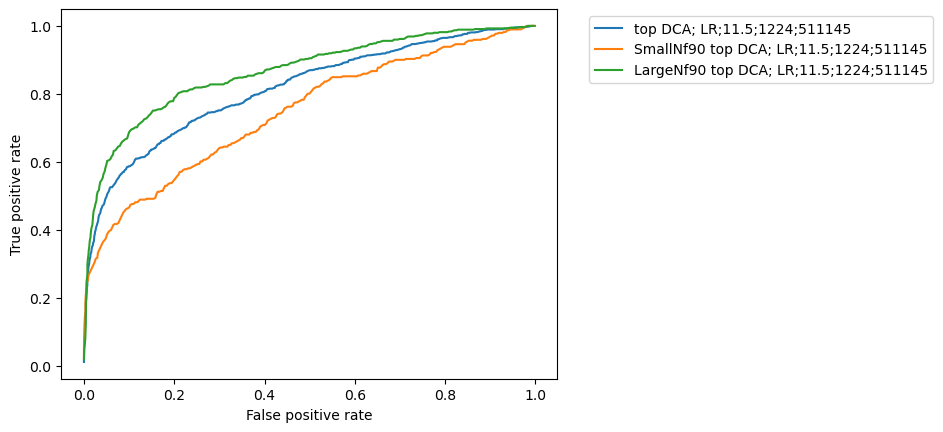

In [34]:
count_label="rate"
step=10
zoom_thres=None

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




DCA_RocCurve(np.array(test_SmallNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame['LR_onesProb']), 
             np.array(test_SmallNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame["status"]),
             count_label=count_label,legend="SmallNf90 top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(np.array(test_LargeNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame['LR_onesProb']), 
             np.array(test_LargeNf90_STRING115EggNog1224Spe511145_topDCAs_predicted_frame["status"]),
             count_label=count_label,legend="LargeNf90 top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

# STRING 11.5, phylum 2, species 511145
problem here i havent run for level 2 for STRINGPhyBalancePhyla benchmark

check scirpt http://localhost:8206/lab/workspaces/auto-8/tree/code/MNF/notebooks/STRING_Data_11.5/test_phylumeffect_withLowDCA_visulization_fullHomologous_oneBestHomologousPP.ipynb
instead

# protein level APC 

In [35]:
# #retrice all unique proteins involved 
# Unique_Ecoli_Pro1=set([p1 for p1 , p2 in HighDCA_Subject_top_pydcaFNAPC_dict.keys()])
# print(len(Unique_Ecoli_Pro1))
# Unique_Ecoli_Pro2=set([p2 for p1 , p2 in HighDCA_Subject_top_pydcaFNAPC_dict.keys()])
# print(len(Unique_Ecoli_Pro2))
# Unique_Ecoli_Pro=sorted(list(Unique_Ecoli_Pro1.union(Unique_Ecoli_Pro2)))
# print(len(Unique_Ecoli_Pro))
# print(Unique_Ecoli_Pro[0:3])
# Unique_Ecoli_idx2pro_dict={i:p for i,p in enumerate(Unique_Ecoli_Pro)}
# print(list(Unique_Ecoli_idx2pro_dict.items())[0])

In [36]:
# topDCA_num=5
# topDCA_idx=[3*i for i in range(topDCA_num)]

In [37]:
# pairwise_matrix=np.empty((len(Unique_Ecoli_idx2pro_dict)*topDCA_num,len(Unique_Ecoli_idx2pro_dict)*topDCA_num))
# pairwise_matrix[:] = np.nan
# print(pairwise_matrix.shape)
# pairwise_matrix

In [38]:
# for i in range(len(Unique_Ecoli_Pro)):
#     for j in range(i+1,len(Unique_Ecoli_Pro)):
#         pro_i,pro_j=Unique_Ecoli_idx2pro_dict[i],Unique_Ecoli_idx2pro_dict[j]
#         if (pro_i,pro_j) in HighDCA_Subject_top_pydcaFNAPC_dict:
#             pairwise_matrix[i,(topDCA_num*j):(5*topDCA_num)]=[HighDCA_Subject_top_pydcaFNAPC_dict[(pro_i,pro_j)][ii] for ii in topDCA_idx]

# For Ecoli 11.5, get its DCA score from its BestHomologous pp from other speceis 



In [39]:
HighDCA_Subject_allPPI_allInfo_frame=getMetaFrame_withHighDCA(EggNOG_maxLevel=Subject_tuple[0],currentSpe_TaxID=Subject_tuple[1],
                                                      STRING_Version="11.5",
                                                              DCA_thres=0,
                                                              benchmark_suffix="STRINGPhyBalancePhyla_Benchmark/")



HighDCA_Subject_allPPI_allInfo_list=HighDCA_Subject_allPPI_allInfo_frame.values.tolist()
HighDCA_Subject_allPPI_allInfo_dict=dict([((p1,p2),(s,dca,mi,len1,len2))for p1, p2, s,dca,mi,len1,len2 in HighDCA_Subject_allPPI_allInfo_list])


allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)


In [40]:
list(HighDCA_Subject_allPPI_allInfo_dict.items())[0]

(('511145.b3312', '511145.b3318'), ('P', 7.3076, 0.1296, 63, 99))

In [41]:
#data from http://localhost:8206/lab/workspaces/auto-n/tree/code/MNF/notebooks/STRING_Data_11.5/test_phylumeffect_homologousPPDetection_STRINGPhyBalancePhyla.ipynb
BestHomologousPP_Query_allPPI_allInfo_dict_listDict=get_QueryInfo_FullBestHomologousPP(Subject_tuple,
                                                                                                  Query_tupleList,
                                                                                                  smallPhylum_Query_tupleList,
                                                                                                  STRING_version="11.5",
                                                                                      benchmark_suffix="STRINGPhyBalancePhyla_Benchmark/",
                                                                                      homologous_status="with")



BestHomologousPP_Benchmark_folder: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/1274374_EggNOGmaxLevel1239_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINGPhyBalancePhyla_Benchmark/
allPPI_allInfo_frame.shape: (17395, 7)
len(Query_allPPI_allInfo_dict): 17395
BestHomologousPP_Benchmark_folder: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/105422_EggNOGmaxLevel201174_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINGPhyBalancePhyla_Benchmark/
allPPI_allInfo_frame.shape: (15590, 7)
len(Query_allPPI_allInfo_dict): 15590
BestHomologousPP_Benchmark_folder: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/411476_EggNOGmaxLevel976_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINGPhyBalancePhyla_Benchmark/
allPPI_allInfo_frame.shape: (8025, 7)
len(Query_allPPI_allInfo_dict): 8025


In [42]:

BestHomologousPP_Query_allPPI_allInfo_dict_listDict.keys()

dict_keys([('1239', '1274374'), ('201174', '105422'), ('976', '411476')])

In [43]:
list(BestHomologousPP_Query_allPPI_allInfo_dict_listDict[('1239', '1274374')].items())[0]

(('1274374.CBLK010000031_gene3179', '1274374.CBLK010000009_gene4383'),
 ('NotExtracted', 1.1001, 0.0756, 255, 275))

In [44]:
Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict.keys()

dict_keys([('1239', '1274374'), ('201174', '105422'), ('976', '411476')])

In [45]:
HighDCA_Subject_BestHomologousDCAs_dict=get_BestHomologousDCAs_fromMultiSpes(HighDCA_Subject_allPPI_allInfo_dict,
                                    BestHomologousPP_Query_allPPI_allInfo_dict_listDict,
                                    Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict
                                                                            )

In [46]:
list(HighDCA_Subject_BestHomologousDCAs_dict.items())[0]

(('511145.b3312', '511145.b3318'), ['P', 7.3076, nan, 3.7574, nan])

In [47]:
print(len(HighDCA_Subject_allPPI_allInfo_dict),len(HighDCA_Subject_BestHomologousDCAs_dict))

32619 32619


## check how many pp find orthologous pp and how many of them have dca scores in postive and negativ samles 


In [48]:
for _,t_dict in Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict.items():
    print(_)
    print(len(t_dict))

('1239', '1274374')
1510551
('201174', '105422')
1598711
('976', '411476')
1229632


In [49]:
HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_dict=get_BestHomologousDCAs_fromMultiSpes_checkOrthologDCA(HighDCA_Subject_allPPI_allInfo_dict,
                                    BestHomologousPP_Query_allPPI_allInfo_dict_listDict,
                                    Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict
                                                                            )

In [50]:
#HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_onlyQueryData=[v[2:] for k , v in HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_dict.items()]
HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_onlyQueryData=[v for k , v in HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_dict.items()]

HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_onlyQueryData=pd.DataFrame(HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_onlyQueryData)
print(HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_onlyQueryData.shape)
HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_onlyQueryData.head(n=4)

(32619, 8)


0       1      2      3      4      5      6      7
0  P  7.3076  False  False   True   True  False  False
1  P  6.6822  False  False  False  False  False  False
2  P  5.6763  False  False  False  False  False  False
3  P  4.8094   True  False   True   True   True   True

In [51]:
HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_onlyQueryData.sum(axis=0,numeric_only=True)

1    31758.8253
2    23990.0000
3    18231.0000
4    21361.0000
5    16155.0000
6    17028.0000
7     8263.0000
dtype: float64

In [52]:
(HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_onlyQueryData.shape[1]-2)/2
for i in range(2,HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_onlyQueryData.shape[1],2):
    temp_frame=HighDCA_Subject_BestHomologousDCAs_checkOrthologDCA_onlyQueryData.iloc[:,[0,i,i+1]]
    print("*******************************")
    print(pd.crosstab(index=temp_frame.iloc[:,0], columns=temp_frame.iloc[:,1]))

    print(pd.crosstab(index=temp_frame.iloc[:,0], columns=temp_frame.iloc[:,2]))




*******************************
2  False  True 
0              
N   6842  20245
P   1787   3745
3  False  True 
0              
N  12312  14775
P   2076   3456
*******************************
4  False  True 
0              
N   9788  17299
P   1470   4062
5  False  True 
0              
N  14041  13046
P   2423   3109
*******************************
6  False  True 
0              
N  13835  13252
P   1756   3776
7  False  True 
0              
N  21071   6016
P   3285   2247


ML_inputs: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGPhyBalancePhyla_Benchmark/ML_inputs/
allPPI_allInfo_frame.shape: (18492, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Pos_allPPI_allInfo_frame.shape: (3761, 7)
Neg_allPPI_allInfo_frame.shape: (12960, 7)
Neg_allPPI_allInfo_frame.shape: (4053, 7)
allPPI_allInfo_frame.shape: (7814, 7)

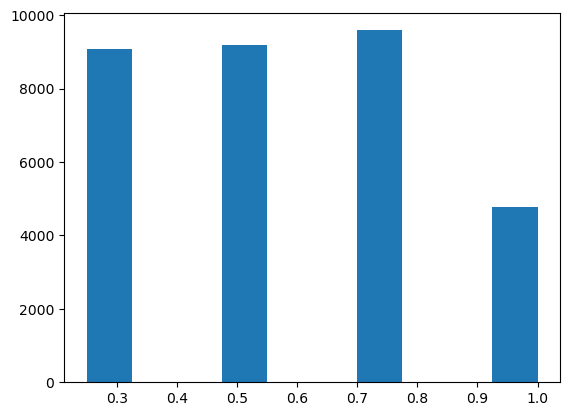

In [53]:
# check persentage of nans in intergreate homologous pp 
NotEmptyDCA_ratioList=list()
for _, dca_record in HighDCA_Subject_BestHomologousDCAs_dict.items():
    dca_record=dca_record[1:]
    NotEmptyDCA_number=len([s for s in dca_record if not np.isnan(s)])
    NotEmptyDCA_ratioList.append(NotEmptyDCA_number/(len(Query_tupleList)+1))
plt.hist( NotEmptyDCA_ratioList,bins=10)
plt.show()

In [54]:
# for negative pp in subject, check how many of them are actualy postive in ohter species 

for phylum_speID,temp_dict in Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict.items():
    count =0
    for subject_pp, v in HighDCA_Subject_BestHomologousDCAs_dict.items():
        subject_pp_status=v[0]
        if subject_pp_status=="N":

            if subject_pp in  temp_dict:
                query_pp = temp_dict[subject_pp]
                if (query_pp in BestHomologousPP_Query_allPPI_allInfo_dict_listDict[phylum_speID] )and (BestHomologousPP_Query_allPPI_allInfo_dict_listDict[phylum_speID][query_pp][0]=="P"):


                    count +=1
    print(count)



0
0
0


In [55]:
# for positive pp in subject, check how many of them are actualy postive in negative  species 

for phylum_speID,temp_dict in Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict.items():
    print(phylum_speID,len(temp_dict))
    count =0
    for subject_pp, v in HighDCA_Subject_BestHomologousDCAs_dict.items():
        subject_pp_status=v[0]
        if subject_pp_status=="P":

            if subject_pp in  temp_dict:
                query_pp = temp_dict[subject_pp]
                if (query_pp in BestHomologousPP_Query_allPPI_allInfo_dict_listDict[phylum_speID] )and (BestHomologousPP_Query_allPPI_allInfo_dict_listDict[phylum_speID][query_pp][0]=="N"):

                    count +=1
                    
    print(count)



('1239', '1274374') 1510551
0
('201174', '105422') 1598711
0
('976', '411476') 1229632
0


4319 19222
-3.5502 6.3092999999999995 -1.7843 5.8492


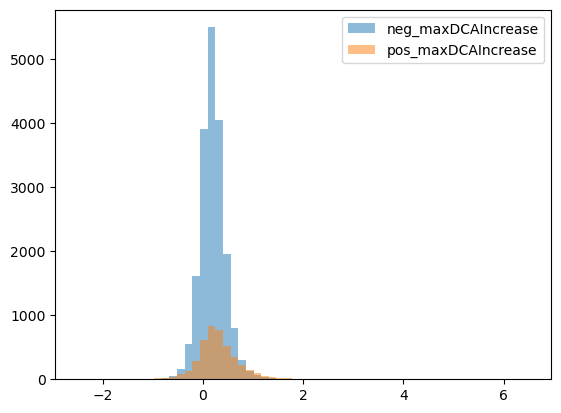

In [56]:
# check for negative pp and negative pp in subject ,
# increase of maxDCA compared with max maxDCA respectively

pos_maxDCAIncrease=list()
neg_maxDCAIncrease=list()
for subject_pp, v in HighDCA_Subject_BestHomologousDCAs_dict.items():
    subject_pp_status=v[0]
    if not np.isnan(v[2:]).all():
        if subject_pp_status=="N":
            #print(np.nanmax(v[2:]))
            neg_maxDCAIncrease.append(np.nanmax(v[2:])-v[1])
        else:
            pos_maxDCAIncrease.append(np.nanmax(v[2:])-v[1])
            
print(len(pos_maxDCAIncrease),len(neg_maxDCAIncrease))
print(min( pos_maxDCAIncrease),max(pos_maxDCAIncrease),min( neg_maxDCAIncrease),max(neg_maxDCAIncrease))

bins = np.linspace(-2.5, 6.5, 60)

plt.hist(neg_maxDCAIncrease, bins, alpha=0.5, label='neg_maxDCAIncrease')
plt.hist(pos_maxDCAIncrease, bins, alpha=0.5, label='pos_maxDCAIncrease')
plt.legend(loc='upper right')
plt.show()

4319 19222
-3.5502 3.0828000000000007 -1.7843 2.1134666666666666


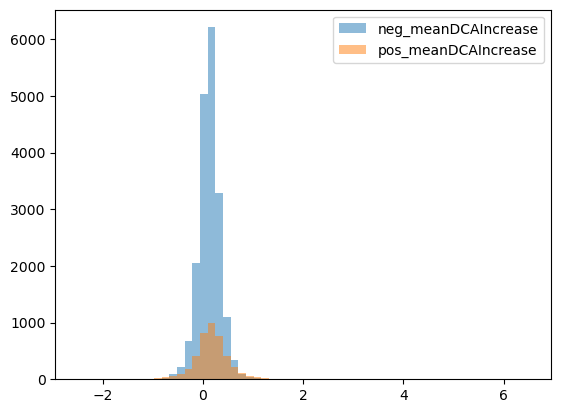

In [57]:
# check for negative pp and negative pp in subject ,
# increase of meanDCA compared with mean DCA respectively

pos_meanDCAIncrease=list()
neg_meanDCAIncrease=list()
for subject_pp, v in HighDCA_Subject_BestHomologousDCAs_dict.items():
    subject_pp_status=v[0]
    if not np.isnan(v[2:]).all():
        if subject_pp_status=="N":
            #print(np.nanmean(v[2:]))
            neg_meanDCAIncrease.append(np.nanmean(v[2:])-v[1])
        else:
            pos_meanDCAIncrease.append(np.nanmean(v[2:])-v[1])
            
print(len(pos_meanDCAIncrease),len(neg_meanDCAIncrease))
print(min( pos_meanDCAIncrease),max(pos_meanDCAIncrease),min( neg_meanDCAIncrease),max(neg_meanDCAIncrease))

bins = np.linspace(-2.5, 6.5, 60)

plt.hist(neg_meanDCAIncrease, bins, alpha=0.5, label='neg_meanDCAIncrease')
plt.hist(pos_meanDCAIncrease, bins, alpha=0.5, label='pos_meanDCAIncrease')
plt.legend(loc='upper right')
plt.show()

In [58]:
count_P_largeOri_smallHomopp=0
count_N_largeOri_smallHomopp=0

# this two are not necesseray as we filter subject spceis but high DCA already
#count_N_smallOri_largeHomopp=0
#count_P_smallOri_largeHomopp=0

for k, v in HighDCA_Subject_BestHomologousDCAs_dict.items():
    ori_DCA=v[1]
    if not np.isnan(v[2:]).all():
        if (v[0]=="P") and (ori_DCA>1) and  np.nanmin(v[2:])<1:
            count_P_largeOri_smallHomopp +=1
        
            
        elif (v[0]=="N") and (ori_DCA>1) and  np.nanmin(v[2:])<1:
            count_N_largeOri_smallHomopp +=1

In [59]:
len(HighDCA_Subject_BestHomologousDCAs_dict),count_P_largeOri_smallHomopp,count_N_largeOri_smallHomopp



(32619, 211, 1735)

In [60]:
HighDCA_Subject_BestHomologousDCAs_oriDCAs=[v[1] for (k,v) in HighDCA_Subject_BestHomologousDCAs_dict.items()]
HighDCA_Subject_BestHomologousDCAs_Labels=[v[0] for (k,v) in HighDCA_Subject_BestHomologousDCAs_dict.items()]
HighDCA_Subject_BestHomologousDCAs_Labels=[1 if label=="P" else 0 for label in HighDCA_Subject_BestHomologousDCAs_Labels]
HighDCA_Subject_BestHomologousDCAs_meanDCAs=[np.nanmean(v[1:]) for (k,v) in HighDCA_Subject_BestHomologousDCAs_dict.items()]
HighDCA_Subject_BestHomologousDCAs_maxDCAs=[np.nanmax(v[1:]) for (k,v) in HighDCA_Subject_BestHomologousDCAs_dict.items()]

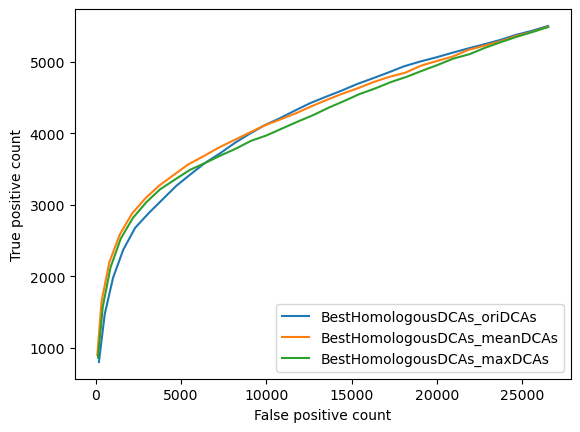

In [467]:
step=1000
zoom_thres=None
count_label="count"
DCA_RocCurve(np.array(HighDCA_Subject_BestHomologousDCAs_oriDCAs), 
             np.array(HighDCA_Subject_BestHomologousDCAs_Labels),
             count_label=count_label,legend="BestHomologousDCAs_oriDCAs",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(np.array(HighDCA_Subject_BestHomologousDCAs_meanDCAs), 
             np.array(HighDCA_Subject_BestHomologousDCAs_Labels),
             count_label=count_label,legend="BestHomologousDCAs_meanDCAs",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(np.array(HighDCA_Subject_BestHomologousDCAs_maxDCAs), 
             np.array(HighDCA_Subject_BestHomologousDCAs_Labels),
             count_label=count_label,legend="BestHomologousDCAs_maxDCAs",step=step,zoom_thres=zoom_thres)

plt.show()

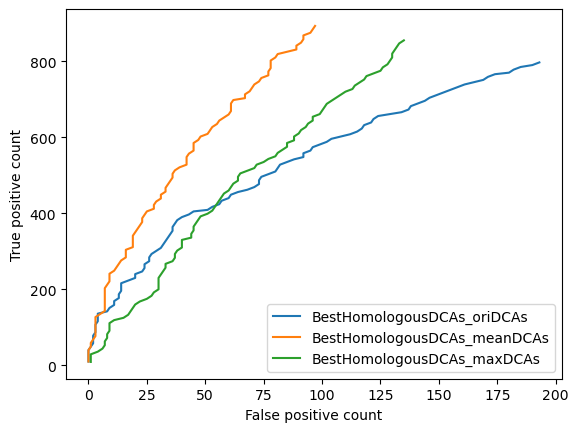

In [62]:
step=10
zoom_thres=1000
count_label="count"
DCA_RocCurve(np.array(HighDCA_Subject_BestHomologousDCAs_oriDCAs), 
             np.array(HighDCA_Subject_BestHomologousDCAs_Labels),
             count_label=count_label,legend="BestHomologousDCAs_oriDCAs",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(np.array(HighDCA_Subject_BestHomologousDCAs_meanDCAs), 
             np.array(HighDCA_Subject_BestHomologousDCAs_Labels),
             count_label=count_label,legend="BestHomologousDCAs_meanDCAs",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(np.array(HighDCA_Subject_BestHomologousDCAs_maxDCAs), 
             np.array(HighDCA_Subject_BestHomologousDCAs_Labels),
             count_label=count_label,legend="BestHomologousDCAs_maxDCAs",step=step,zoom_thres=zoom_thres)

plt.show()

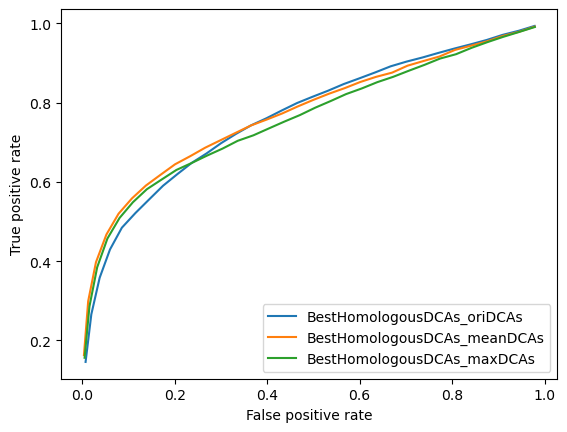

In [63]:
step=1000
zoom_thres=None
count_label="rate"
DCA_RocCurve(np.array(HighDCA_Subject_BestHomologousDCAs_oriDCAs), 
             np.array(HighDCA_Subject_BestHomologousDCAs_Labels),
             count_label=count_label,legend="BestHomologousDCAs_oriDCAs",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(np.array(HighDCA_Subject_BestHomologousDCAs_meanDCAs), 
             np.array(HighDCA_Subject_BestHomologousDCAs_Labels),
             count_label=count_label,legend="BestHomologousDCAs_meanDCAs",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(np.array(HighDCA_Subject_BestHomologousDCAs_maxDCAs), 
             np.array(HighDCA_Subject_BestHomologousDCAs_Labels),
             count_label=count_label,legend="BestHomologousDCAs_maxDCAs",step=step,zoom_thres=zoom_thres)

plt.show()

# train LR for integrated DCA scores  with only unique phylum
before i forget 287 are also from phylum 1224, which is same as 511145


In [64]:
BestHomologousPP_Query_allPPI_allInfo_dict_listDict.keys()

dict_keys([('1239', '1274374'), ('201174', '105422'), ('976', '411476')])

In [65]:
for _,t_dict in BestHomologousPP_Query_allPPI_allInfo_dict_listDict.items():
    print(len(t_dict))

17395
15590
8025


In [66]:
%%time
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results=sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                  HighDCA_Subject_BestHomologousDCAs_dict=HighDCA_Subject_BestHomologousDCAs_dict,
                  ML_methods=["LR","RF"],
                   EggNOG_group_level2=EggNOG_group_level2,
                  CoEvo_type="DCA",
                  deleting_column=None,
                  DCA_thres=0,
                    fillMissingValue=-1,
                    benchmark_suffix="STRINGPhyBalancePhyla_Benchmark/")



 ML_inputs: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINGPhyBalancePhyla_Benchmark/ML_inputs/
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 32619
OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (32619, 4)
after deleting colum, OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (32619, 4)
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (26095, 4) (6524, 4) (26095,) (6524,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 6524 658 5866
XBestHomologousDCAs_train.shape,yBestHomologousDCAs_train.shape,su

In [67]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results.keys()

dict_keys(['XBestHomologousDCAs', 'YBestHomologousDCAs', 'XBestHomologousDCAs_train', 'XBestHomologousDCAs_test', 'yBestHomologousDCAs_train', 'yBestHomologousDCAs_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [68]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"].keys()

dict_keys(['Model', 'RF_yBestHomologousDCAs_predict', 'RF_yBestHomologousDCAs_predict_prob'])

In [69]:
all(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"]==STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"])




True

In [70]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs_train"]

array([[ 0.8591,  1.2424, -1.    , -1.    ],
       [ 0.8216, -1.    ,  1.0886, -1.    ],
       [ 1.57  , -1.    , -1.    , -1.    ],
       ...,
       [ 0.9202, -1.    ,  1.1775, -1.    ],
       [ 0.7842,  1.0051, -1.    , -1.    ],
       [ 0.8406, -1.    ,  1.0281, -1.    ]])

In [71]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_train"]

array([0., 0., 0., ..., 0., 0., 0.])

In [72]:
np.sum(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs"]==-1,
       axis=0)

array([    0, 14388, 16464, 24356])

In [73]:
np.sum(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs_train"]==-1,
       axis=0)


#array([   0, 3301, 3448, 4200, 3156])

array([    0, 11802, 13458, 20018])

0.0 0.75 0.0 0.75


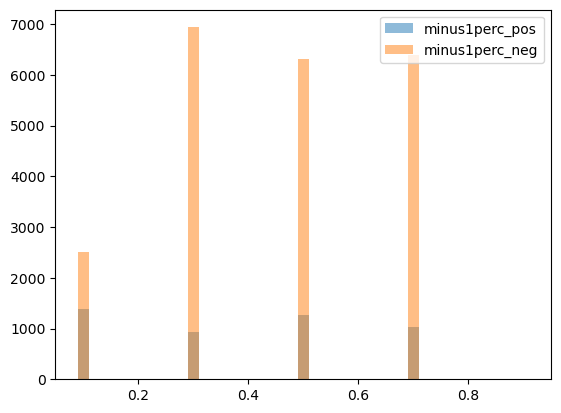

In [74]:
# here we check for positive pp and negative pp , the percentages of "-1"s 
# this picture is a bit different than old picture , check why ????!!!
# seem because of bins , coud use old file to recove 
minus1perc_pos=list()
minus1perc_neg=list()
for idx in range(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_train"].shape[0]):
    y_label=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_train"][idx]
    x_value=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs_train"][idx,:]
    #print(idx)
    minus1perc=sum(x_value==-1)/STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs_train"].shape[1]
    if y_label==1: # positive ppi 
        minus1perc_pos.append(minus1perc)
    else:
        minus1perc_neg.append(minus1perc)

print(min( minus1perc_pos),max(minus1perc_pos),min( minus1perc_neg),max(minus1perc_neg))
#bins = np.linspace(0, 1, 40)
bins = [0,0.2,0.4,0.6,0.8,1]

plt.hist(minus1perc_pos, bins, alpha=0.5, label='minus1perc_pos',rwidth=0.1)
plt.hist(minus1perc_neg, bins,alpha=0.5, label='minus1perc_neg',rwidth=0.1)
plt.legend(loc='upper right')
plt.show()

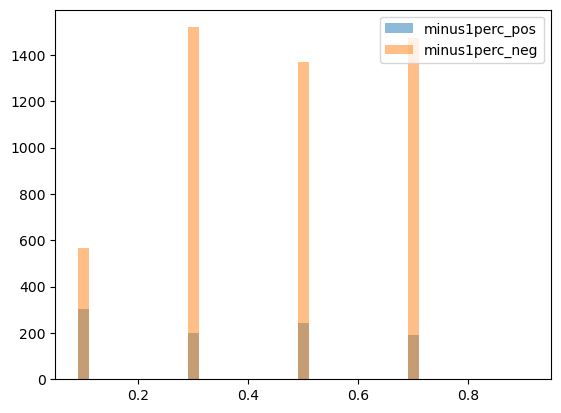

In [75]:
# here we check for positive pp and negative pp , the percentages of "-1"s 
# this picture is a bit different than old picture , check why ????!!!
# seem because of bins , coud use old file to recove 
minus1perc_pos=list()
minus1perc_neg=list()
for idx in range(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"].shape[0]):
    y_label=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"][idx]
    x_value=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs_test"][idx,:]
    #print(idx)
    minus1perc=sum(x_value==-1)/STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs_test"].shape[1]
    if y_label==1: # positive ppi 
        minus1perc_pos.append(minus1perc)
    else:
        minus1perc_neg.append(minus1perc)

min( minus1perc_pos),max(minus1perc_pos),min( minus1perc_neg),max(minus1perc_neg)
bins = [0,0.2,0.4,0.6,0.8,1]

plt.hist(minus1perc_pos, bins, alpha=0.5, label='minus1perc_pos',rwidth=0.1)
plt.hist(minus1perc_neg, bins,alpha=0.5, label='minus1perc_neg',rwidth=0.1)
plt.legend(loc='upper right')
plt.show()

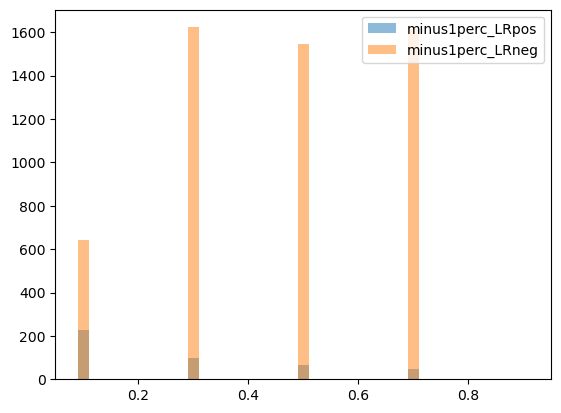

In [76]:
# here we check for positive pp and negative pp , the percentages of "-1"s 
# this picture is a bit different than old picture , check why ????!!!
# seem because of bins , coud use old file to recove 
minus1perc_pos=list()
minus1perc_neg=list()
for idx in range(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]["LR_yBestHomologousDCAs_predict"].shape[0]):
    y_label=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]["LR_yBestHomologousDCAs_predict"][idx]
    x_value=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs_test"][idx,:]
    #print(idx)
    minus1perc=sum(x_value==-1)/STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs_test"].shape[1]
    if y_label==1: # positive ppi 
        minus1perc_pos.append(minus1perc)
    else:
        minus1perc_neg.append(minus1perc)

min( minus1perc_pos),max(minus1perc_pos),min( minus1perc_neg),max(minus1perc_neg)
bins = [0,0.2,0.4,0.6,0.8,1]

plt.hist(minus1perc_pos, bins, alpha=0.5, label='minus1perc_LRpos',rwidth=0.1)
plt.hist(minus1perc_neg, bins,alpha=0.5, label='minus1perc_LRneg',rwidth=0.1)
plt.legend(loc='upper right')
plt.show()

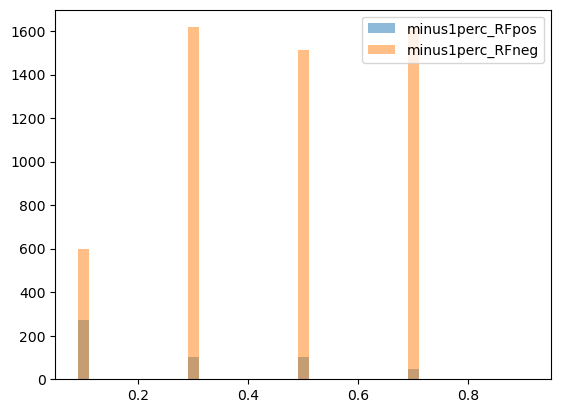

In [77]:
# here we check for positive pp and negative pp , the percentages of "-1"s 
# this picture is a bit different than old picture , check why ????!!!
# seem because of bins , coud use old file to recove 
minus1perc_pos=list()
minus1perc_neg=list()
for idx in range(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]["RF_yBestHomologousDCAs_predict"].shape[0]):
    y_label=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]["RF_yBestHomologousDCAs_predict"][idx]
    x_value=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs_test"][idx,:]
    #print(idx)
    minus1perc=sum(x_value==-1)/STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs_test"].shape[1]
    if y_label==1: # positive ppi 
        minus1perc_pos.append(minus1perc)
    else:
        minus1perc_neg.append(minus1perc)

min( minus1perc_pos),max(minus1perc_pos),min( minus1perc_neg),max(minus1perc_neg)
bins = [0,0.2,0.4,0.6,0.8,1]

plt.hist(minus1perc_pos, bins, alpha=0.5, label='minus1perc_RFpos',rwidth=0.1)
plt.hist(minus1perc_neg, bins,alpha=0.5, label='minus1perc_RFneg',rwidth=0.1)

plt.legend(loc='upper right')
plt.show()

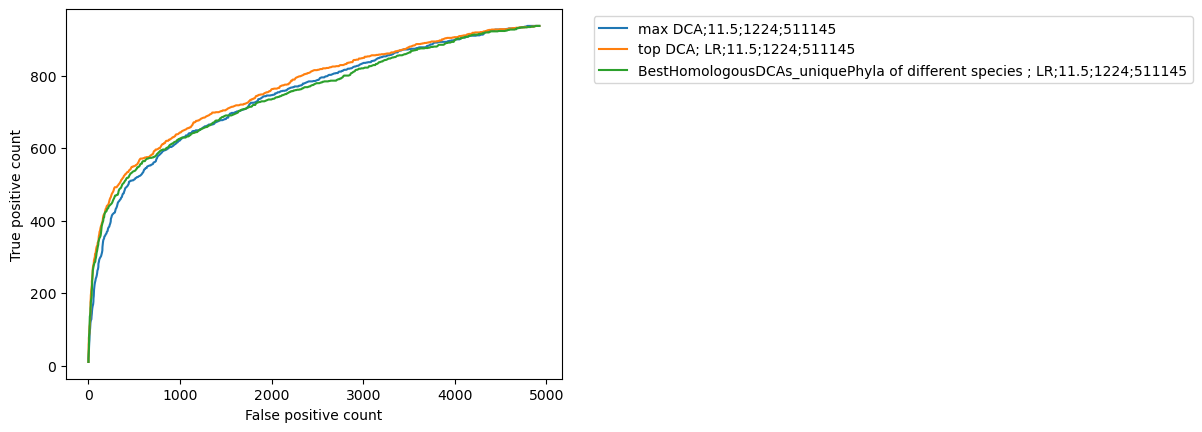

In [78]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
#              count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [79]:

count_label="count"
step=10
zoom_thres=1000




In [80]:

count_label="rate"
step=10
zoom_thres=None




## check ribosome effect 

code adpate from http://localhost:8206/lab/workspaces/auto-d/tree/code/MNF/notebooks/Ecoli_KEGG/CheckRibosomeProteinAffect.ipynb

In [81]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["updated_allPPI_allInfo_frame"]["status"]=[1 if s=="P" else 0 for s in STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["updated_allPPI_allInfo_frame"]["benchmark_status"]]



In [82]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["updated_allPPI_allInfo_frame"]

STRING_ID1    STRING_ID2 benchmark_status  maxBetDCA_score  \
0      511145.b3312  511145.b3318                P           7.3076   
1      511145.b1089  511145.b1716                P           6.6822   
2      511145.b1089  511145.b3294                P           5.6763   
3      511145.b1807  511145.b3064                P           4.8094   
4      511145.b4098  511145.b4100                P           4.4507   
...             ...           ...              ...              ...   
7960   511145.b0116  511145.b1525                N           0.4125   
25259  511145.b2075  511145.b3813                N           0.4114   
29044  511145.b2866  511145.b4221                N           0.4080   
7958   511145.b0116  511145.b1285                N           0.4016   
28941  511145.b2820  511145.b3266                N           0.3868   

       maxBetMI_score  len1  len2  LR_onesProb  RF_onesProb  status  
0              0.1296    63    99     1.000000     0.994699       1  
1              0.1436    56   117     0.999999     0.948212       1  
2              0.0934    56   127     0.999981     0.948212       1  
3              0.0942   220   337     0.999933     0.931788       1  
4              0.1398   281   194     0.999418     0.948212       1  
...               ...   ...   ...          ...          ...     ...  
7960           0.0123   469   460     0.032623     0.108191       0  
25259          0.0149  1023   718     0.036099     0.078845       0  
29044          0.0374   740  1226     0.021622     0.065336       0  
7958           0.0137   469   535     0.025663     0.103870       0  
28941          0.0162   842  1008     0.032643     0.027191       0  

[32619 rows x 10 columns]

In [83]:
test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_frame=get_PPIwithoutWithinRibosomess_OnlyTest(allPPI_allInfoFrame=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["updated_allPPI_allInfo_frame"],
                          proteinNames_dict=ecoli_proteinNames_dict,
                          testDict=STRING115EggNog1224Spe511145_topDCAs_PPTuples_testDict)

print(test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_frame.shape)

(5538, 10)


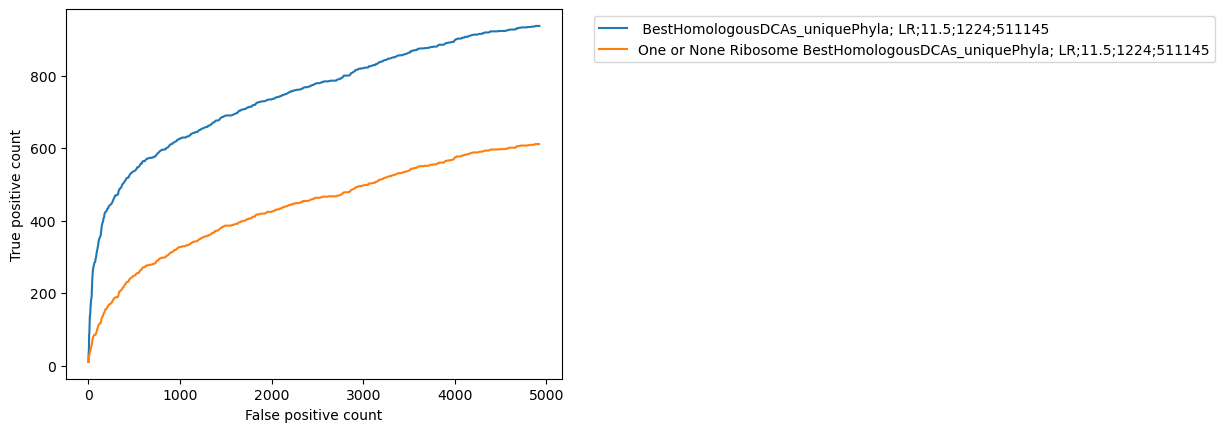

In [84]:
count_label="count"
step=10
zoom_thres=None

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend=" BestHomologousDCAs_uniquePhyla; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(np.array(test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_frame['LR_onesProb']), 
             np.array(test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_frame["status"]),
             count_label=count_label,legend="One or None Ribosome BestHomologousDCAs_uniquePhyla; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

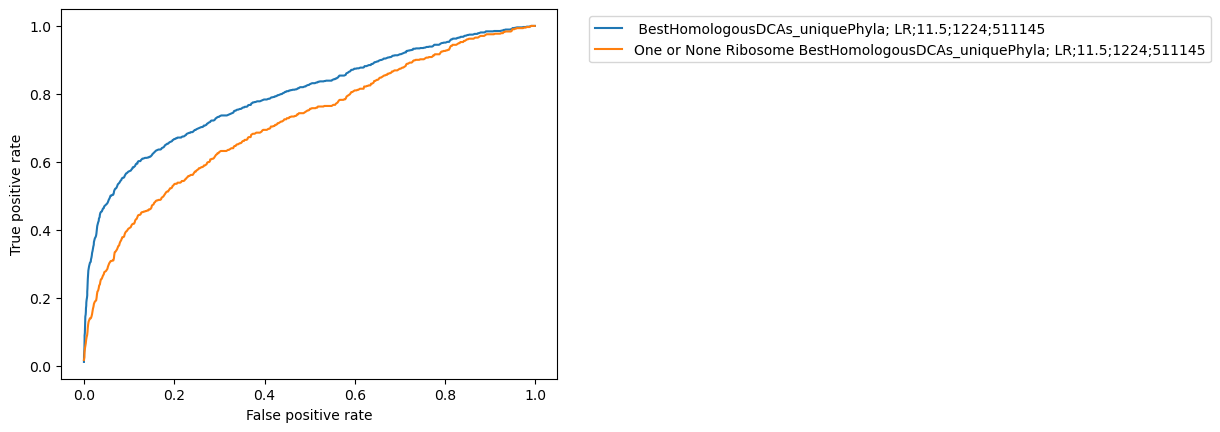

In [85]:
count_label="rate"
step=10
zoom_thres=None


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend=" BestHomologousDCAs_uniquePhyla; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(np.array(test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_frame['LR_onesProb']), 
             np.array(test_withoutWithinRibosomes_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_frame["status"]),
             count_label=count_label,legend="One or None Ribosome BestHomologousDCAs_uniquePhyla; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

# train LR for integrated DCA scores  with different phylum combination and only unique phylum
before i forget 287 are also from phylum 1224, which is same as 511145


In [86]:
allQueryPhylumSPeID=list(BestHomologousPP_Query_allPPI_allInfo_dict_listDict.keys())

print(len(allQueryPhylumSPeID))
allQueryPhylumSPeID

3


[('1239', '1274374'), ('201174', '105422'), ('976', '411476')]

1 ('1239', '1274374')
 ML_inputs: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINPhyPPI_Benchmark/ML_inputs/
allPPI_allInfo_frame.shape: (18492, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (12960, 7)
allPPI_allInfo_frame.shape: (18492, 7)
Pos_allPPI_allInfo_frame.shape: (3762, 7)
Neg_allPPI_allInfo_frame.shape: (4054, 7)
allPPI_allInfo_frame.shape: (7816, 7)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 7816
OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (7816, 4)
after deleting colum, OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (7816, 3)
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (6252, 3) (1564, 3) (6252,) (1564,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 1564 56 1508
XBestHomologousDCAs_train.shape,yBestHomologousDCAs_train.shap

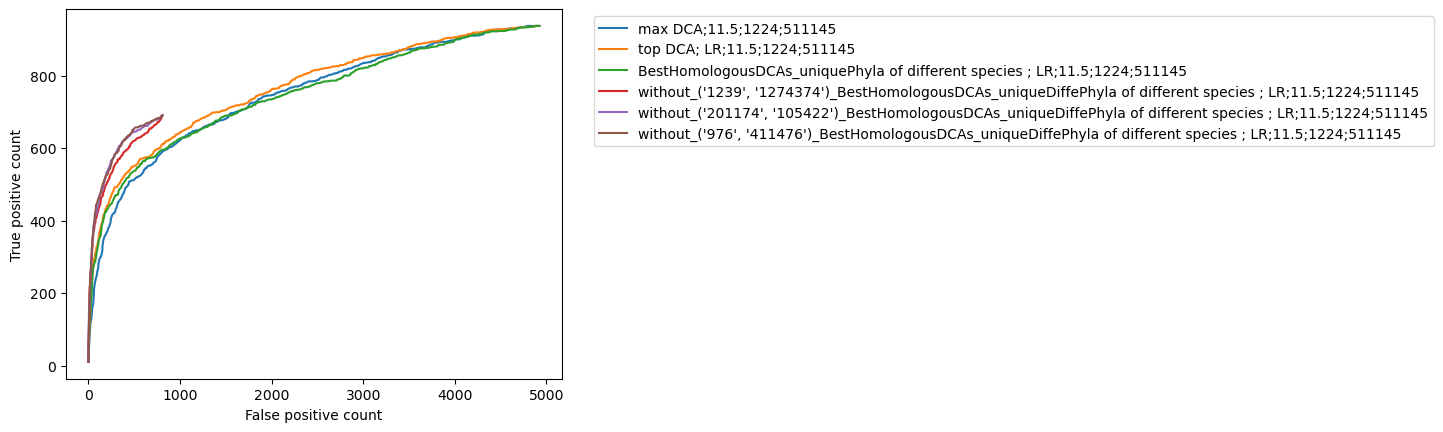

In [87]:

count_label="count"
step=10
zoom_thres=None





DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



for i in range(1,len(allQueryPhylumSPeID)+1,1):
    PhylumSPeID=allQueryPhylumSPeID[i-1]
    print(i,PhylumSPeID)
    STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results=sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                      HighDCA_Subject_BestHomologousDCAs_dict=HighDCA_Subject_BestHomologousDCAs_dict,
                       ML_methods=["LR","RF"],
                       EggNOG_group_level2=EggNOG_group_level2,
                      CoEvo_type="DCA",
                    deleting_column=[i], # notice 0 is subject speceis 
                      DCA_thres=1,
                        fillMissingValue=-1)


    #all(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"]==STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"])
    DCA_RocCurve(STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
                 STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
                 count_label=count_label,legend="without_"+str(PhylumSPeID)+"_BestHomologousDCAs_uniqueDiffePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()



1 ('1239', '1274374')
 ML_inputs: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINPhyPPI_Benchmark/ML_inputs/
allPPI_allInfo_frame.shape: (18492, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (12960, 7)
allPPI_allInfo_frame.shape: (18492, 7)
Pos_allPPI_allInfo_frame.shape: (3762, 7)
Neg_allPPI_allInfo_frame.shape: (4054, 7)
allPPI_allInfo_frame.shape: (7816, 7)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 7816
OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (7816, 4)
after deleting colum, OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (7816, 3)
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (6252, 3) (1564, 3) (6252,) (1564,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 1564 56 1508
XBestHomologousDCAs_train.shape,yBestHomologousDCAs_train.shap

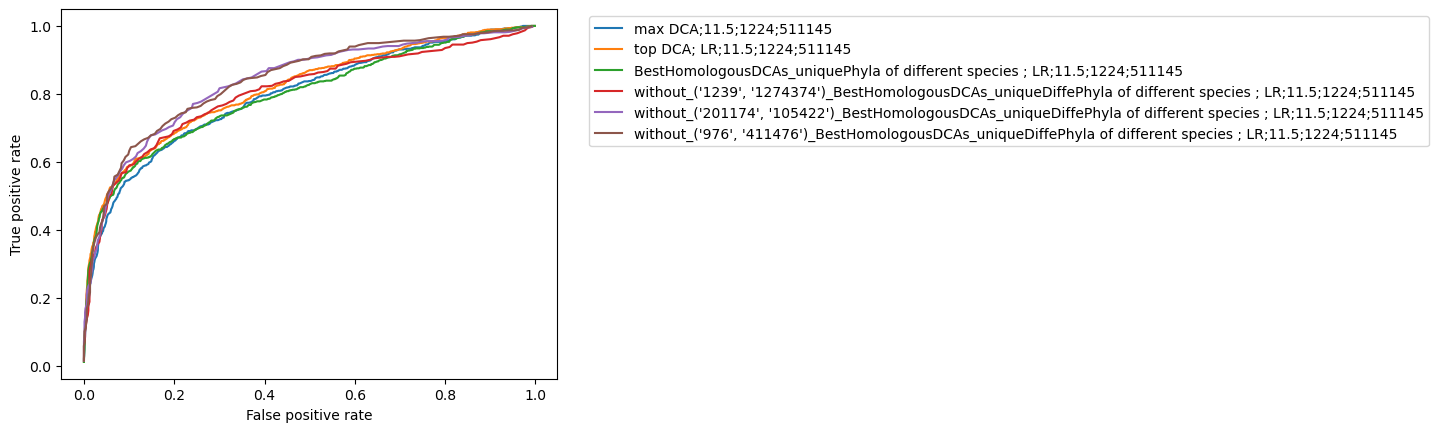

In [88]:

count_label="rate"
step=10
zoom_thres=None






DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



for i in range(1,len(allQueryPhylumSPeID)+1,1):
    PhylumSPeID=allQueryPhylumSPeID[i-1]
    print(i,PhylumSPeID)
    STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results=sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                      HighDCA_Subject_BestHomologousDCAs_dict=HighDCA_Subject_BestHomologousDCAs_dict,
                       ML_methods=["LR","RF"],
                       EggNOG_group_level2=EggNOG_group_level2,
                      CoEvo_type="DCA",
                    deleting_column=[i], # notice 0 is subject speceis 
                      DCA_thres=1,
                        fillMissingValue=-1)


    #all(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"]==STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"])
    DCA_RocCurve(STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
                 STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
                 count_label=count_label,legend="without_"+str(PhylumSPeID)+"_BestHomologousDCAs_uniqueDiffePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()



1 ('1239', '1274374')
 ML_inputs: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINPhyPPI_Benchmark/ML_inputs/
allPPI_allInfo_frame.shape: (18492, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (12960, 7)
allPPI_allInfo_frame.shape: (18492, 7)
Pos_allPPI_allInfo_frame.shape: (3762, 7)
Neg_allPPI_allInfo_frame.shape: (4054, 7)
allPPI_allInfo_frame.shape: (7816, 7)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 7816
OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (7816, 4)
after deleting colum, OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (7816, 3)
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (6252, 3) (1564, 3) (6252,) (1564,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 1564 56 1508
XBestHomologousDCAs_train.shape,yBestHomologousDCAs_train.shap

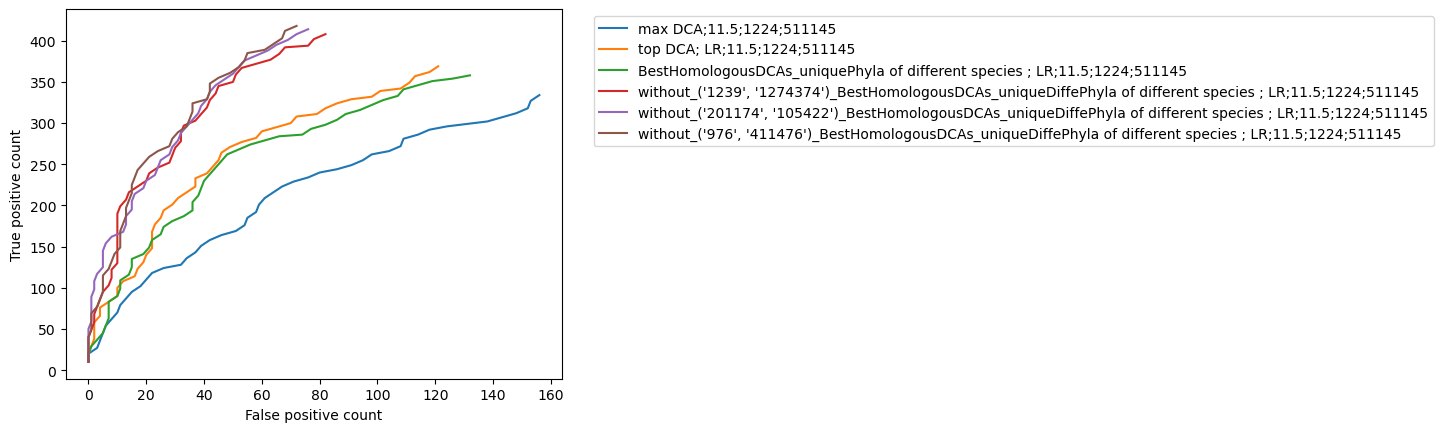

In [89]:

count_label="count"
step=10
zoom_thres=500






DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



for i in range(1,len(allQueryPhylumSPeID)+1,1):
    PhylumSPeID=allQueryPhylumSPeID[i-1]
    print(i,PhylumSPeID)
    STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results=sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                      HighDCA_Subject_BestHomologousDCAs_dict=HighDCA_Subject_BestHomologousDCAs_dict,
                       ML_methods=["LR","RF"],
                       EggNOG_group_level2=EggNOG_group_level2,
                      CoEvo_type="DCA",
                    deleting_column=[i], # notice 0 is subject speceis 
                      DCA_thres=1,
                        fillMissingValue=-1)


    #all(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"]==STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"])
    DCA_RocCurve(STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
                 STRING115EggNog1224Spe511145_uniqueDiffePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
                 count_label=count_label,legend="without_"+str(PhylumSPeID)+"_BestHomologousDCAs_uniqueDiffePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()



In [90]:

count_label="rate"
step=10
zoom_thres=None





# For Ecoli 11.5, get its top 5 DCA score from its BestHomologous pp from other speceis 



In [91]:
HighDCA_Subject_topRanking_pydcaFNAPC_file=Subect_Benchmark_folder+"DCA_thres_"+str(0)+"_topRanking_pydcaFNAPC_frame.csv" 
print(HighDCA_Subject_topRanking_pydcaFNAPC_file)

HighDCA_Subject_allPPI_info=HighDCA_Subject_allPPI_allInfo_frame.loc[:,["STRING_ID1","STRING_ID2","len1","len2"]].values.tolist()



/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGPhyBalancePhyla_Benchmark/DCA_thres_0_topRanking_pydcaFNAPC_frame.csv


In [92]:

HighDCA_Subject_top_pydcaFNAPC_dict=get_topRanking_CoEvo_file(topRanking_CoEvo_file=HighDCA_Subject_topRanking_pydcaFNAPC_file,
                                               coevolutoin_path=Subject_DCA_coevolutoin_path,
                                               coevo_suffix="_pydcaFNAPC_array",
                                               allPPI_info=HighDCA_Subject_allPPI_info, 
                                               returnDic=True,
                                               overwrite=False,)


top_CoEvo_frame.shape: (32619, 152)


In [93]:
# here to read all homoglogs dca info we here 
# and because when we computer homologous DCA , we also use pp with low dca in ecoli speceis, so it has all 
BestHomologousPP_top5DCAs_Query_allPPI_allInfo_dict_listDict=get_QueryInfo_top5DCAs_FullBestHomologousPP(Subject_tuple,
                                                                                                  Query_tupleList,
                                                                                                  smallPhylum_Query_tupleList,
                                                                                                  STRING_version="11.5",
                                                                                                  benchmark_suffix="STRINGPhyBalancePhyla_Benchmark/",
                                                                                                  topDCA_num=5,
                                                                                                   returnDic=True,
                                                                                                    overwrite=False,
                                                                                                        )



1239 1274374
BestHomologousPP_Benchmark_folder: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/1274374_EggNOGmaxLevel1239_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINGPhyBalancePhyla_Benchmark/
allPPI_allInfo_frame.shape: (17395, 7)
top_CoEvo_frame.shape: (17395, 152)
len(top_pydcaFNAPC_dict): 17395
len(Query_allPPI_allInfo_dict): 17395
201174 105422
BestHomologousPP_Benchmark_folder: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/105422_EggNOGmaxLevel201174_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINGPhyBalancePhyla_Benchmark/
allPPI_allInfo_frame.shape: (15590, 7)
top_CoEvo_frame.shape: (15590, 152)
len(top_pydcaFNAPC_dict): 15590
len(Query_allPPI_allInfo_dict): 15590
976 411476
BestHomologousPP_Benchmark_folder: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/411476_EggNOGmaxLevel976_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINGPhyBalancePhyla_Benchmark/
allPPI_allInfo_frame.shape: (80

In [94]:

BestHomologousPP_top5DCAs_Query_allPPI_allInfo_dict_listDict.keys()

dict_keys([('1239', '1274374'), ('201174', '105422'), ('976', '411476')])

In [95]:
list(BestHomologousPP_top5DCAs_Query_allPPI_allInfo_dict_listDict[('1239', '1274374')].items())[0]

(('1274374.CBLK010000031_gene3179', '1274374.CBLK010000009_gene4383'),
 [1.1001, 0.999, 0.9714, 0.9597, 0.9513])

In [96]:
HighDCA_Subject_top_pydcaFNAPC_top5DCAs_dict={pp:[v[3*i] for i in range(5)] for pp, v in HighDCA_Subject_top_pydcaFNAPC_dict.items()}

HighDCA_Subject_BestHomologousDCAs_top5DCAs_dict=get_BestHomologousDCAs_top5DCAs_fromMultiSpes(HighDCA_Subject_allPPI_allInfo_dict=HighDCA_Subject_allPPI_allInfo_dict,
                                    Subject_allPPI_top5DCAs_dict=HighDCA_Subject_top_pydcaFNAPC_top5DCAs_dict,
                                    BestHomologousPP_Query_allPPI_top5DCAs_listDict=BestHomologousPP_top5DCAs_Query_allPPI_allInfo_dict_listDict,
                                    Subject2Query_BestHomologous_ignoreQueryDCA_dict_listDict=Subject2Query_SubSpeAllPPI_BestHomologous_ignoreQueryDCA_dict_listDict,
                                        topDCA_num=5)

In [97]:
print(list(HighDCA_Subject_BestHomologousDCAs_top5DCAs_dict.items())[0])

(('511145.b3312', '511145.b3318'), ['P', 7.3076, 1.6527, 1.5302, 1.4725, 1.4675, nan, nan, nan, nan, nan, 3.7574, 3.5048, 2.4912, 2.2139, 2.147, nan, nan, nan, nan, nan])


In [98]:
print(len(HighDCA_Subject_allPPI_allInfo_dict),len(HighDCA_Subject_BestHomologousDCAs_dict),len(HighDCA_Subject_BestHomologousDCAs_top5DCAs_dict))

32619 32619 32619


# train LR for integrated  top 5 DCA scores  with only unique phylum


In [99]:
# def sepCogPairs_topDCAs_ML_predictions(EggNOG_maxLevel,currentSpe_TaxID,STRING_Version,
#                                        EggNOG_group_level2,
#                    ML_methods=["LR","RF"],
#                   DCA_thres=1,DCA_number=50,selDca_number=20,
#                    benchmark_suffix="STRINPhyPPI_Benchmark/",
#                                        downsample_prefix="",
#                                        sort_frame=True,
#                                        ifReCollect=False,
#                                       saveFrame=False,
#                                       overwrite=True):
#     '''
#     return prediciotn results of different machine leanning models;
    
#     :param DCA_thres :  number of top ranking DCA scores to be computated in data preparation step 
#     :type DCA_number:  int 
    
#     :param DCA_number:  number of top ranking DCA scors used as input to Machine learning models
#     :type selDca_number:  in t
    
#     '''
#     CoEvo_data_folder="/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING"+STRING_Version+"/"
#     input_root_folder=CoEvo_data_folder+currentSpe_TaxID+"_EggNOGmaxLevel"+EggNOG_maxLevel+"_eggNOGfilteredData/"
#     Benchmark_folder=input_root_folder+benchmark_suffix
#     DCA_coevolutoin_path=input_root_folder+downsample_prefix+"coevolutoin_result_DCA/"



#     ML_inputs=Benchmark_folder+"ML_inputs/"
#     print("ML_inputs:",ML_inputs)

#     if not os.path.exists(ML_inputs):
#         os.makedirs(ML_inputs)
        
        
#     topDCAs_predicted_results=dict()
        
        


#     allPPI_allInfo_frame=getMetaFrame_withHighDCA(EggNOG_maxLevel=EggNOG_maxLevel,currentSpe_TaxID=currentSpe_TaxID,
#                                                       STRING_Version="11.5",DCA_thres=DCA_thres,benchmark_suffix=benchmark_suffix,sort_frame=sort_frame)
    

#     allPPI_cogs=return_cogPairs_fromproPair(EggNOG_group_level2,currentSpe_TaxID,allPPI_allInfo_frame)
    
#     #allPPI_pps=allPPI_allInfo_frame.loc[:,["STRING_ID1","STRING_ID2"]].values.tolist()
#     #allPPI_pps=[tuple(pp) for pp in allPPI_pps]
    
#     allPPI_info=allPPI_allInfo_frame.loc[:,["STRING_ID1","STRING_ID2","len1","len2"]].values.tolist()
#     print("len(allPPI_info):",len(allPPI_info))

    
#     topRanking_pydcaFNAPC_file=Benchmark_folder+"DCA_thres_"+str(DCA_thres)+"_topRanking_pydcaFNAPC_frame.csv" 
#     top_pydcaFNAPC_frame=get_topRanking_CoEvo_file(topRanking_CoEvo_file=topRanking_pydcaFNAPC_file,
#                                                        coevolutoin_path=DCA_coevolutoin_path,
#                                                        coevo_suffix="_pydcaFNAPC_array",
#                                                        allPPI_info=allPPI_info, 
#                                                        returnDic=False,
#                                                        overwrite=overwrite,)
    
#     OnlyTopPosNeg_NonPara_XtopDCAs,OnlyTopPosNeg_NonPara_YtopDCAs=collect_topCoEvos_OnlyTopPosNeg(top_pydcaFNAPC_frame,allPPI_allInfo_frame,"DCA"+"DCA_thres_"+str(DCA_thres),DCA_thres,DCA_number,selDca_number,ML_inputs,ifReCollect)
    

In [100]:
# ML_inputs: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGPhyBalancePhyla_Benchmark/ML_inputs/
# allPPI_allInfo_frame.shape: (32619, 7)
# Pos_allPPI_allInfo_frame.shape: (5532, 7)
# Pos_allPPI_allInfo_frame.shape: (5532, 7)
# Neg_allPPI_allInfo_frame.shape: (27087, 7)
# Neg_allPPI_allInfo_frame.shape: (27087, 7)
# allPPI_allInfo_frame.shape: (32619, 7)
# len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
# len(allPPI_cogs): 32619
# len(allPPI_info): 32619
# top_CoEvo_frame.shape: (32619, 152)
# OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
# XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (26095, 20) (6524, 20) (26095,) (6524,)
# len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 6524 659 5865
# XtopDCAs_train.shape,ytopDCAs_train.shape,sum(ytopDCAs_train),ytopDCAs_test.shape,sum(ytopDCAs_test): (26754, 20) (26754,) 4594.0 (5865,) 938.0
# train LR now _:
# train RF now _:
# save_allPPI_allInfo_file: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGPhyBalancePhyla_Benchmark/ML_inputs/DCA_thres_0sepCogPairs_FullDataset_ML_onesProb.csv
# CPU times: user 35.9 s, sys: 15.2 s, total: 51.1 s
# Wall time: 3min 28s


# %%time
# #why suddently becase so now ? because i update conda ?
# STRING115EggNog1224Spe511145_topDCAs_predicted_results=b(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
#                                                                                           EggNOG_group_level2=EggNOG_group_level2,
#                                                                            ML_methods=["LR","RF"],
#                                                                            DCA_thres=0,DCA_number=50,selDca_number=20,
#                                                                             benchmark_suffix="STRINGPhyBalancePhyla_Benchmark/",
#                                                                                           ifReCollect=False,
#                                                                                          saveFrame=True,
#                                                                                          overwrite=False)

# # CPU times: user 1min 23s, sys: 16.2 s, total: 1min 39s
# # Wall time: 4min 16s


In [101]:
# STRING115EggNog1224Spe511145_topDCAs_predicted_results['updated_allPPI_allInfo_frame']


In [102]:
# STRING115EggNog1224Spe511145_topDCAs_predicted_results['updated_allPPI_allInfo_frame'].iloc[:,0:3].equals(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['updated_allPPI_allInfo_frame'].iloc[:,0:3] )



In [103]:
# STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['updated_allPPI_allInfo_frame']


In [104]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results=sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                  HighDCA_Subject_BestHomologousDCAs_dict=HighDCA_Subject_BestHomologousDCAs_top5DCAs_dict,
                  ML_methods=["LR","RF"],
                   EggNOG_group_level2=EggNOG_group_level2,
                  CoEvo_type="DCA",
                  deleting_column=None,
                  DCA_thres=0,
                    fillMissingValue=-1,
                    topDCA_num=5,
                    benchmark_suffix="STRINGPhyBalancePhyla_Benchmark/")



 ML_inputs: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINGPhyBalancePhyla_Benchmark/ML_inputs/
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 32619
OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (32619, 20)
after deleting colum, OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (32619, 20)
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (26095, 20) (6524, 20) (26095,) (6524,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 6524 658 5866
XBestHomologousDCAs_train.shape,yBestHomologousDCAs_train.shap

In [105]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results.keys()

dict_keys(['XBestHomologousDCAs', 'YBestHomologousDCAs', 'XBestHomologousDCAs_train', 'XBestHomologousDCAs_test', 'yBestHomologousDCAs_train', 'yBestHomologousDCAs_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [106]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs']

array([[ 7.3076,  1.6527,  1.5302, ..., -1.    , -1.    , -1.    ],
       [ 6.6822,  3.1265,  2.6542, ..., -1.    , -1.    , -1.    ],
       [ 5.6763,  3.3828,  1.9035, ..., -1.    , -1.    , -1.    ],
       ...,
       [ 0.408 ,  0.3715,  0.3707, ..., -1.    , -1.    , -1.    ],
       [ 0.4016,  0.3781,  0.3677, ..., -1.    , -1.    , -1.    ],
       [ 0.3868,  0.3857,  0.3771, ...,  0.5067,  0.5005,  0.4919]])

In [107]:
all(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"]==STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"])





True

In [108]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"].shape

(5866,)

In [109]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"].shape

(5866,)

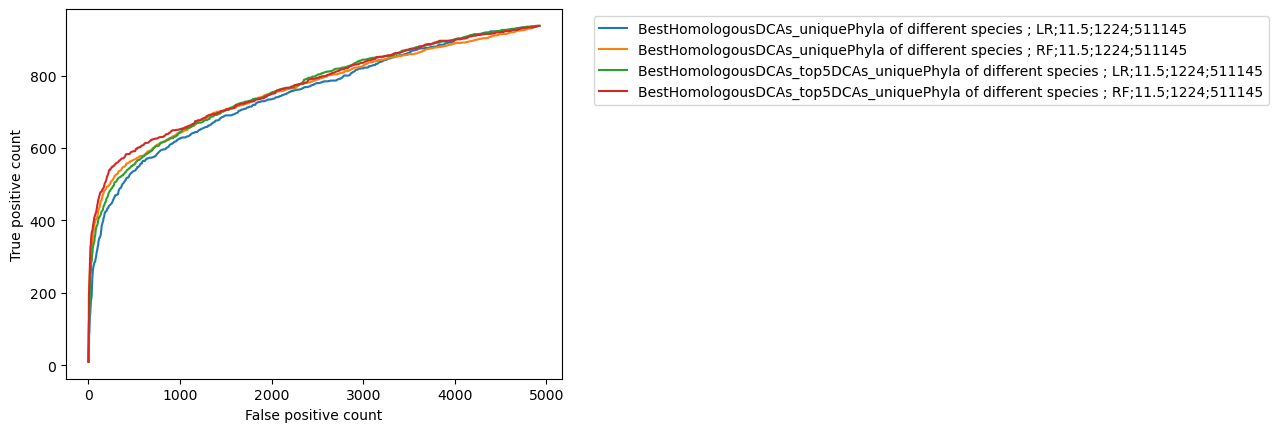

In [110]:

count_label="count"
step=10
zoom_thres=None






DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

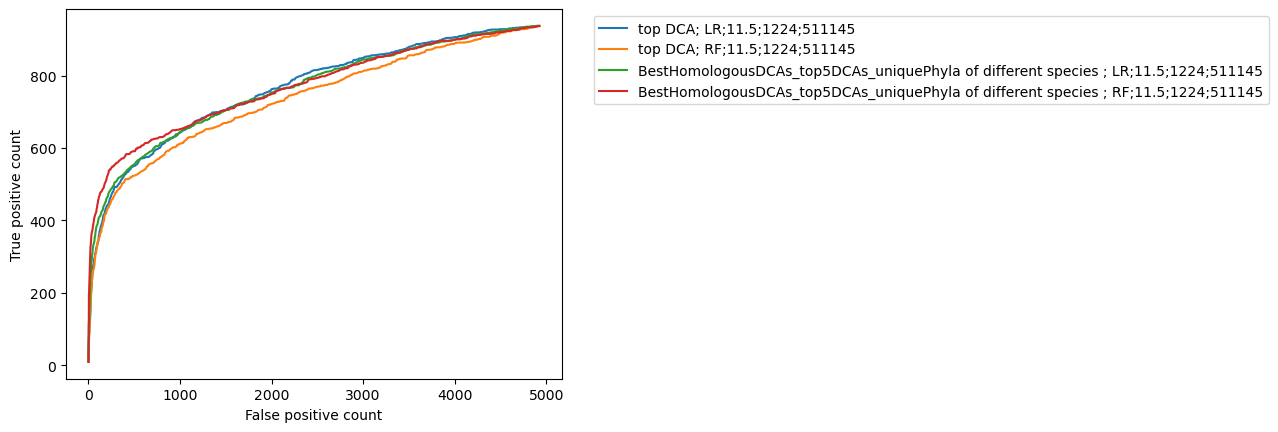

In [111]:

count_label="count"
step=10
zoom_thres=None



DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

# collected integrated max DCA score from different phla and replacing with +1, -1

In [112]:


replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results=replacingDCAScores_sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                  HighDCA_Subject_BestHomologousDCAs_dict=HighDCA_Subject_BestHomologousDCAs_dict,
                  ML_methods=["LR","RF"],
                   EggNOG_group_level2=EggNOG_group_level2,
                  CoEvo_type="DCA",
                  deleting_column=None,
                  DCA_thres=0,
                  fillDCAValue=1,
                    fillMissingValue=-1,
                    benchmark_suffix="STRINGPhyBalancePhyla_Benchmark/")





allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 32619
OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (32619, 4)
after deleting colum, OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (32619, 4)
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (26095, 4) (6524, 4) (26095,) (6524,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 6524 658 5866
XBestHomologousDCAs_train.shape,yBestHomologousDCAs_train.shape,sum(yBestHomologousDCAs_train),yBestHomologousDCAs_test.shape,sum(yBestHomologousDCAs_test): (26753, 4) (26753,) 4595.0 (5866,) 937.0


In [113]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results.keys()

dict_keys(['XBestHomologousDCAs', 'YBestHomologousDCAs', 'XBestHomologousDCAs_train', 'XBestHomologousDCAs_test', 'yBestHomologousDCAs_train', 'yBestHomologousDCAs_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [114]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs_train']

array([[ 1.,  1., -1., -1.],
       [ 1., -1.,  1., -1.],
       [ 1., -1., -1., -1.],
       ...,
       [ 1., -1.,  1., -1.],
       [ 1.,  1., -1., -1.],
       [ 1., -1.,  1., -1.]])

In [115]:
set(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['updated_allPPI_allInfo_frame']["LR_onesProb"])

{0.01494287216052505,
 0.017757410060261932,
 0.03286817301601693,
 0.03892558121456302}

In [116]:
set(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['updated_allPPI_allInfo_frame']["RF_onesProb"])

{0.10360649929361103,
 0.11170864634259417,
 0.14020695369241631,
 0.14764222388182283,
 0.18159481136327466,
 0.19162977218947302,
 0.30772188140723966,
 0.3527377715210816}

In [117]:

# print(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['LR']["Model"].best_estimator_.coef_[0])

# print(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['RF']["Model"].feature_importances_)


In [118]:
newIndex_HighDCA_Subject_allPPI_allInfo_frame=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['updated_allPPI_allInfo_frame'].reset_index(drop=True, inplace=False)

replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_X=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs']
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_XFrame=pd.DataFrame(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_X)
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_XFrame=pd.concat([newIndex_HighDCA_Subject_allPPI_allInfo_frame.loc[:,["STRING_ID1","STRING_ID2","benchmark_status","LR_onesProb","RF_onesProb"]] ,replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_XFrame],
                                                                                                axis=1,ignore_index=True)





In [119]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_XFrame.head(n=30)

0             1  2         3         4    5    6    7    8
0   511145.b3312  511145.b3318  P  0.017757  0.147642  1.0 -1.0  1.0 -1.0
1   511145.b1089  511145.b1716  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
2   511145.b1089  511145.b3294  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
3   511145.b1807  511145.b3064  P  0.038926  0.307722  1.0 -1.0  1.0  1.0
4   511145.b4098  511145.b4100  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
5   511145.b3736  511145.b3738  P  0.032868  0.111709  1.0  1.0 -1.0  1.0
6   511145.b0721  511145.b0722  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
7   511145.b1716  511145.b3186  P  0.038926  0.352738  1.0  1.0  1.0  1.0
8   511145.b0764  511145.b0765  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
9   511145.b3186  511145.b3301  P  0.038926  0.352738  1.0  1.0  1.0  1.0
10  511145.b0041  511145.b0042  P  0.038926  0.307722  1.0 -1.0  1.0  1.0
11  511145.b0041  511145.b1698  P  0.038926  0.307722  1.0 -1.0  1.0  1.0
12  511145.b2276  511145.b2280  P  0.017757  0.147642  1.0 -1.0  1.0 -1.0
13  511145.b2282  511145.b2286  P  0.017757  0.147642  1.0 -1.0  1.0 -1.0
14  511145.b2197  511145.b2199  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
15  511145.b3308  511145.b4506  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
16  511145.b1717  511145.b3301  P  0.038926  0.307722  1.0 -1.0  1.0  1.0
17  511145.b1697  511145.b1698  P  0.038926  0.307722  1.0 -1.0  1.0  1.0
18  511145.b2423  511145.b2424  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
19  511145.b0696  511145.b0698  P  0.017757  0.147642  1.0 -1.0  1.0 -1.0
20  511145.b2606  511145.b3065  P  0.032868  0.191630  1.0 -1.0 -1.0  1.0
21  511145.b2017  511145.b4539  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
22  511145.b0784  511145.b0785  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
23  511145.b3299  511145.b3703  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
24  511145.b3299  511145.b3302  P  0.017757  0.147642  1.0 -1.0  1.0 -1.0
25  511145.b0637  511145.b3310  P  0.038926  0.352738  1.0  1.0  1.0  1.0
26  511145.b2279  511145.b2280  P  0.017757  0.147642  1.0 -1.0  1.0 -1.0
27  511145.b1089  511145.b3306  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0
28  511145.b3298  511145.b3316  P  0.014943  0.181595  1.0  1.0 -1.0 -1.0
29  511145.b1089  511145.b3315  P  0.014943  0.140207  1.0 -1.0 -1.0 -1.0

In [120]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_XFrame.sort_values(by=4,ascending=False)

0             1  2         3         4    5    6    7    8
23707  511145.b0386  511145.b1749  N  0.038926  0.352738  1.0  1.0  1.0  1.0
4499   511145.b3168  511145.b4203  P  0.038926  0.352738  1.0  1.0  1.0  1.0
17586  511145.b0243  511145.b2147  N  0.038926  0.352738  1.0  1.0  1.0  1.0
4494   511145.b0169  511145.b3287  P  0.038926  0.352738  1.0  1.0  1.0  1.0
9722   511145.b1263  511145.b3296  N  0.038926  0.352738  1.0  1.0  1.0  1.0
...             ...           ... ..       ...       ...  ...  ...  ...  ...
24513  511145.b0695  511145.b4473  N  0.017757  0.103606  1.0  1.0  1.0 -1.0
24514  511145.b0857  511145.b3363  N  0.017757  0.103606  1.0  1.0  1.0 -1.0
10850  511145.b0428  511145.b1633  N  0.017757  0.103606  1.0  1.0  1.0 -1.0
24516  511145.b0033  511145.b3700  N  0.017757  0.103606  1.0  1.0  1.0 -1.0
9817   511145.b0654  511145.b1263  N  0.017757  0.103606  1.0  1.0  1.0 -1.0

[32619 rows x 9 columns]

In [121]:


replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results=VariousReplacing_sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_top5DCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                  HighDCA_Subject_BestHomologousDCAs_dict=HighDCA_Subject_BestHomologousDCAs_top5DCAs_dict,
                  ML_methods=["LR","RF"],
                   EggNOG_group_level2=EggNOG_group_level2,
                  CoEvo_type="DCA",
                  topDCA_num=5,
                  deleting_column=None,
                  DCA_thres=0,
                  fillDCAValue=1,
                    fillMissingValue=-1,
                    replacing=True,
                    replacing_strageties="replacingDCAScores",
                    benchmark_suffix="STRINGPhyBalancePhyla_Benchmark/")





allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 32619
OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (32619, 20)
after deleting colum, OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (32619, 20)
The replacing_strageties is  replacingDCAScores
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (26095, 20) (6524, 20) (26095,) (6524,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 6524 658 5866
XBestHomologousDCAs_train.shape,yBestHomologousDCAs_train.shape,sum(yBestHomologousDCAs_train),yBestHomologousDCAs_test.shape,sum(yBestHomologousDCAs_test): (26753, 20) (26753,) 4595.0 (5866,) 937.0


In [122]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results.keys()

dict_keys(['XBestHomologousDCAs', 'YBestHomologousDCAs', 'XBestHomologousDCAs_train', 'XBestHomologousDCAs_test', 'yBestHomologousDCAs_train', 'yBestHomologousDCAs_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [123]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs_train']

array([[ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       ...,
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.]])

In [124]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs_train'][0:3,:]

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
         1.,  1., -1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.]])

In [125]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs_train']

array([[ 0.8591,  0.612 ,  0.603 , ..., -1.    , -1.    , -1.    ],
       [ 0.8216,  0.8039,  0.7756, ..., -1.    , -1.    , -1.    ],
       [ 1.57  ,  1.533 ,  1.3631, ..., -1.    , -1.    , -1.    ],
       ...,
       [ 0.9202,  0.8868,  0.8609, ..., -1.    , -1.    , -1.    ],
       [ 0.7842,  0.7661,  0.7092, ..., -1.    , -1.    , -1.    ],
       [ 0.8406,  0.7228,  0.72  , ..., -1.    , -1.    , -1.    ]])

In [126]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs_train'][0:3,:]

array([[ 0.8591,  0.612 ,  0.603 ,  0.5881,  0.5204,  1.2424,  0.9857,
         0.8632,  0.8382,  0.8135, -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ],
       [ 0.8216,  0.8039,  0.7756,  0.7574,  0.7555, -1.    , -1.    ,
        -1.    , -1.    , -1.    ,  1.0886,  1.055 ,  0.9627,  0.8846,
         0.8723, -1.    , -1.    , -1.    , -1.    , -1.    ],
       [ 1.57  ,  1.533 ,  1.3631,  1.3509,  1.3502, -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ]])

### check sorted 

In [127]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results.keys()

dict_keys(['XBestHomologousDCAs', 'YBestHomologousDCAs', 'XBestHomologousDCAs_train', 'XBestHomologousDCAs_test', 'yBestHomologousDCAs_train', 'yBestHomologousDCAs_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [128]:
%%time 
sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results=sortedOtherPhyla_FullPhylaIntegration_uniquePhyla_ML_predictions('XBestHomologousDCAs', 'YBestHomologousDCAs',
                                    'XBestHomologousDCAs_train', 'XBestHomologousDCAs_test', 
                                    'yBestHomologousDCAs_train', 'yBestHomologousDCAs_test',
                                    'updated_allPPI_allInfo_frame',
                                    replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results,
                                    ML_methods=["LR","RF"],
                                    topDCA_num=1,
                                    sortAllPhyla=False,
                                    
                                    )



CPU times: user 3.42 s, sys: 10.6 s, total: 14 s
Wall time: 1.25 s


In [129]:
sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XSortedFeas'][0,:]

array([ 1.,  1., -1., -1.])

In [130]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'][0,:]

array([ 1., -1.,  1., -1.])

In [131]:
set(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['updated_allPPI_allInfo_frame']["LR_onesProb"])

{0.014663109069327485,
 0.017320017269156964,
 0.01802137872227926,
 0.05201186689831148}

In [132]:
set(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['updated_allPPI_allInfo_frame']["RF_onesProb"])

{0.11851460128486611,
 0.13768999384122502,
 0.16642925936317549,
 0.3545143212802698}

In [133]:

print(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['LR']["Model"].best_estimator_.coef_[0])

print(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['RF']["Model"].feature_importances_)


[-3.19685481  0.02020492 -0.10481904  0.65238938]
[0.         0.02658662 0.05543919 0.91797418]


In [134]:

np.sum(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs"]==-1,
       axis=0)

array([    0, 14388, 16464, 24356])

In [135]:
sortedOtherPhala_newIndex_HighDCA_Subject_allPPI_allInfo_frame=sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['updated_allPPI_allInfo_frame'].reset_index(drop=True, inplace=False)

sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_X=sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XSortedFeas']
sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_XFrame=pd.DataFrame(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_X)
sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_XFrame=pd.concat([sortedOtherPhala_newIndex_HighDCA_Subject_allPPI_allInfo_frame.loc[:,["STRING_ID1","STRING_ID2","benchmark_status","LR_onesProb","RF_onesProb"]] ,sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_XFrame],
                                                                                                axis=1,ignore_index=True)





In [136]:
sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_XFrame.head(n=30)

0             1  2         3         4    5    6    7    8
0   511145.b3312  511145.b3318  P  0.018021  0.166429  1.0  1.0 -1.0 -1.0
1   511145.b1089  511145.b1716  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
2   511145.b1089  511145.b3294  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
3   511145.b1807  511145.b3064  P  0.014663  0.118515  1.0  1.0  1.0 -1.0
4   511145.b4098  511145.b4100  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
5   511145.b3736  511145.b3738  P  0.014663  0.118515  1.0  1.0  1.0 -1.0
6   511145.b0721  511145.b0722  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
7   511145.b1716  511145.b3186  P  0.052012  0.354514  1.0  1.0  1.0  1.0
8   511145.b0764  511145.b0765  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
9   511145.b3186  511145.b3301  P  0.052012  0.354514  1.0  1.0  1.0  1.0
10  511145.b0041  511145.b0042  P  0.014663  0.118515  1.0  1.0  1.0 -1.0
11  511145.b0041  511145.b1698  P  0.014663  0.118515  1.0  1.0  1.0 -1.0
12  511145.b2276  511145.b2280  P  0.018021  0.166429  1.0  1.0 -1.0 -1.0
13  511145.b2282  511145.b2286  P  0.018021  0.166429  1.0  1.0 -1.0 -1.0
14  511145.b2197  511145.b2199  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
15  511145.b3308  511145.b4506  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
16  511145.b1717  511145.b3301  P  0.014663  0.118515  1.0  1.0  1.0 -1.0
17  511145.b1697  511145.b1698  P  0.014663  0.118515  1.0  1.0  1.0 -1.0
18  511145.b2423  511145.b2424  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
19  511145.b0696  511145.b0698  P  0.018021  0.166429  1.0  1.0 -1.0 -1.0
20  511145.b2606  511145.b3065  P  0.018021  0.166429  1.0  1.0 -1.0 -1.0
21  511145.b2017  511145.b4539  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
22  511145.b0784  511145.b0785  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
23  511145.b3299  511145.b3703  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
24  511145.b3299  511145.b3302  P  0.018021  0.166429  1.0  1.0 -1.0 -1.0
25  511145.b0637  511145.b3310  P  0.052012  0.354514  1.0  1.0  1.0  1.0
26  511145.b2279  511145.b2280  P  0.018021  0.166429  1.0  1.0 -1.0 -1.0
27  511145.b1089  511145.b3306  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0
28  511145.b3298  511145.b3316  P  0.018021  0.166429  1.0  1.0 -1.0 -1.0
29  511145.b1089  511145.b3315  P  0.017320  0.137690  1.0 -1.0 -1.0 -1.0

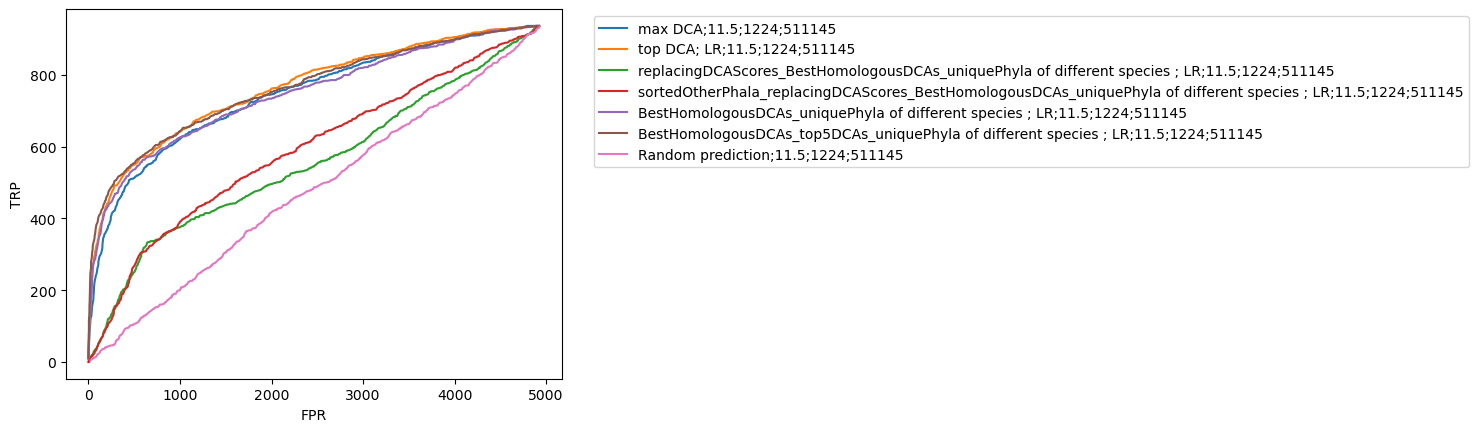

In [137]:

count_label="count"
step=10
zoom_thres=None



DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_ySortedFeas_predict_prob'], 
             sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [138]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results.keys()

dict_keys(['XBestHomologousDCAs', 'YBestHomologousDCAs', 'XBestHomologousDCAs_train', 'XBestHomologousDCAs_test', 'yBestHomologousDCAs_train', 'yBestHomologousDCAs_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

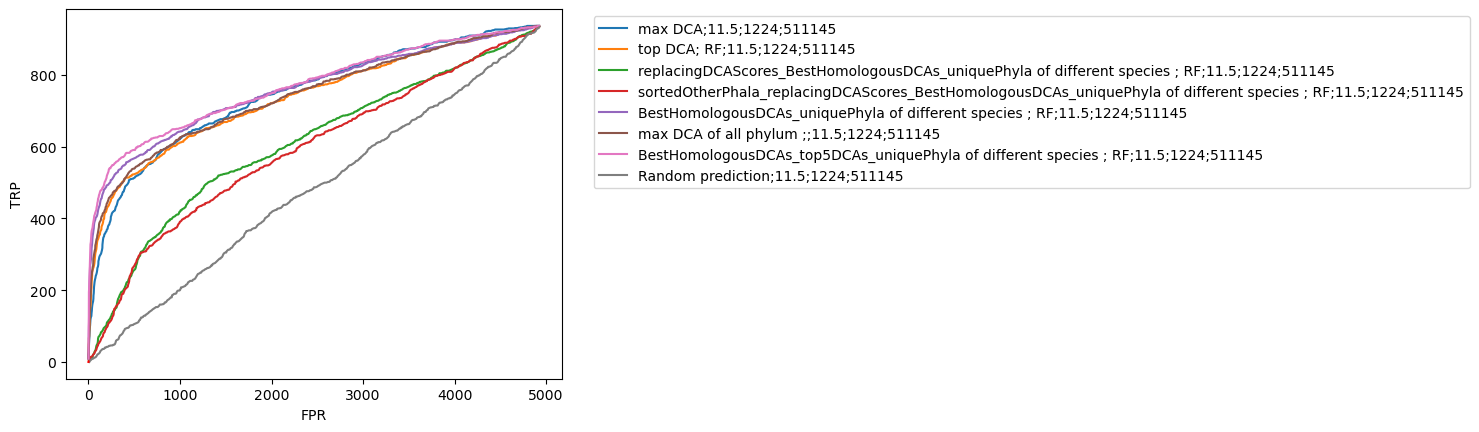

In [139]:

count_label="count"
step=10
zoom_thres=None



DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]['RF_ySortedFeas_predict_prob'], 
             sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XBestHomologousDCAs_test"].max(axis=1), 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="max DCA of all phylum ;"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

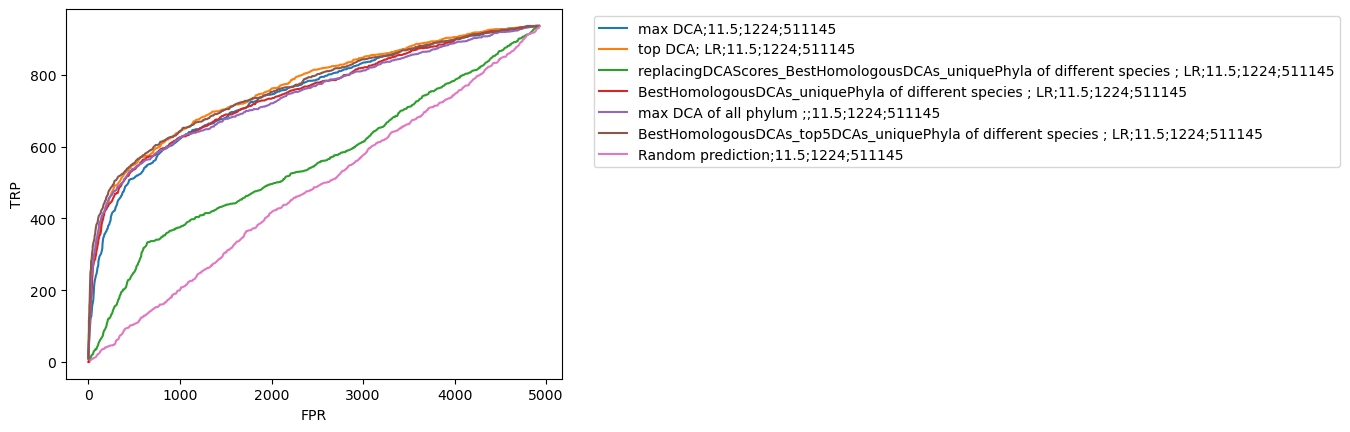

In [140]:

count_label="count"
step=10
zoom_thres=None



DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XBestHomologousDCAs_test"].max(axis=1), 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="max DCA of all phylum ;"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)


#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

# revise ratio at each -1 group 

In [141]:

beforeFixRatio_test_Phaly_posPPInum=defaultdict(int)
beforeFixRatio_test_Phaly_negPPInum=defaultdict(int)

beforeFixRatio_test_PhalyCombination_posPPInum =defaultdict(int)
beforeFixRatio_test_PhalyCombination_negPPInum=defaultdict(int)

for i in range(0,replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'].shape[0]):
    i_phyla=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'][i,:]
    i_phyla_ratio=sum(i_phyla==-1)/replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'].shape[1]
    #print(i_phyla_ratio)
    i_phyla_label=[str(p) for p in i_phyla]
    i_phyla_label="_".join(i_phyla_label)
    
    i_y=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['YBestHomologousDCAs'][i]
    if i_y==1:
        beforeFixRatio_test_Phaly_posPPInum[i_phyla_ratio] +=1
        beforeFixRatio_test_PhalyCombination_posPPInum[i_phyla_label] +=1
    elif i_y==0:
        beforeFixRatio_test_Phaly_negPPInum[i_phyla_ratio] +=1
        beforeFixRatio_test_PhalyCombination_negPPInum[i_phyla_label] +=1

beforeFixRatio_test_Phaly_negVSpos_ratio={minus1_Ratio:number/(beforeFixRatio_test_Phaly_posPPInum[minus1_Ratio]) for minus1_Ratio,number in beforeFixRatio_test_Phaly_negPPInum.items()}

beforeFixRatio_test_PhalyCombination_negVSpos_ratio={minus1_Ratio:number/(beforeFixRatio_test_PhalyCombination_posPPInum[minus1_Ratio]) for minus1_Ratio,number in beforeFixRatio_test_PhalyCombination_negPPInum.items()}


In [142]:
beforeFixRatio_test_Phaly_posPPInum, beforeFixRatio_test_Phaly_negPPInum,beforeFixRatio_test_Phaly_negVSpos_ratio

(defaultdict(int, {0.5: 1507, 0.75: 1213, 0.25: 1131, 0.0: 1681}),
 defaultdict(int, {0.5: 7687, 0.75: 7865, 0.0: 3080, 0.25: 8455}),
 {0.5: 5.100862641008627,
  0.75: 6.483924154987634,
  0.0: 1.8322427126710292,
  0.25: 7.475685234305924})

In [143]:
print(1681+3080,1131+8455,1507+7687,1213+7865)
print(1681/(1681+3080),1131/(1131+8455),1507/(1507+7687),1213/(1213+7865))




4761 9586 9194 9078
0.35307708464608273 0.11798456081785938 0.16391124646508592 0.1336197400308438


In [144]:
for  key in beforeFixRatio_test_PhalyCombination_posPPInum.keys():
    print(key,beforeFixRatio_test_PhalyCombination_posPPInum[key], beforeFixRatio_test_PhalyCombination_negPPInum[key],beforeFixRatio_test_PhalyCombination_negVSpos_ratio[key])





1.0_-1.0_1.0_-1.0 512 3273 6.392578125
1.0_-1.0_-1.0_-1.0 1213 7865 6.483924154987634
1.0_-1.0_1.0_1.0 179 425 2.374301675977654
1.0_1.0_-1.0_1.0 215 1762 8.195348837209302
1.0_1.0_1.0_1.0 1681 3080 1.8322427126710292
1.0_-1.0_-1.0_1.0 172 749 4.354651162790698
1.0_1.0_-1.0_-1.0 823 3665 4.45321992709599
1.0_1.0_1.0_-1.0 737 6268 8.504748982360923


In [145]:
fixed_negVSpos_ratio=beforeFixRatio_test_Phaly_negVSpos_ratio[min(beforeFixRatio_test_Phaly_negVSpos_ratio,key=beforeFixRatio_test_Phaly_negVSpos_ratio.get)]
fixed_negVSpos_ratio

1.8322427126710292

In [146]:
beforeFixRatio_test_Phaly_PPInum_list=list()
for key in sorted(list(beforeFixRatio_test_Phaly_posPPInum.keys())):
    #key=key/10
    print(key)
    beforeFixRatio_test_Phaly_PPInum_list.append([key,beforeFixRatio_test_Phaly_posPPInum[key],"P"])
    beforeFixRatio_test_Phaly_PPInum_list.append([key,beforeFixRatio_test_Phaly_negPPInum[key],"N"])
beforeFixRatio_test_Phaly_PPInum_frame=pd.DataFrame(beforeFixRatio_test_Phaly_PPInum_list,columns=["-1Ratio","number","benchmark_status"])

0.0
0.25
0.5
0.75


In [147]:
beforeFixRatio_test_Phaly_PPInum_frame

-1Ratio  number benchmark_status
0     0.00    1681                P
1     0.00    3080                N
2     0.25    1131                P
3     0.25    8455                N
4     0.50    1507                P
5     0.50    7687                N
6     0.75    1213                P
7     0.75    7865                N

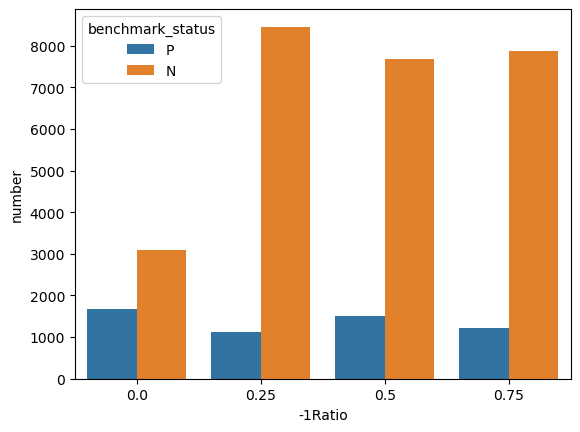

In [148]:

ax = sns.barplot(x="-1Ratio", y="number",hue="benchmark_status", data=beforeFixRatio_test_Phaly_PPInum_frame)
plt.show()

In [149]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'].shape[0]

32619

In [150]:
fixedNegVSposRratio_allIdx=getAllIdxOf_fixed_negVSpos_ratio(ori_XMatrix=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'],
                                 ori_YMatrix=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['YBestHomologousDCAs'],
                                 fixedNegVSposRratio=fixed_negVSpos_ratio )


posIdx_dict
0.5 1507 [0, 12, 13, 19, 20, 24, 26, 28, 34, 36]
0.75 1213 [1, 2, 4, 6, 8, 14, 15, 18, 21, 22]
0.25 1131 [3, 5, 10, 11, 16, 17, 31, 50, 62, 63]
0.0 1681 [7, 9, 25, 30, 35, 37, 39, 44, 59, 61]
negIdx_dict
0.5 7687 [5532, 5535, 5539, 5541, 5544, 5550, 5551, 5555, 5558, 5561]
0.75 7865 [5533, 5534, 5536, 5537, 5538, 5545, 5546, 5547, 5549, 5556]
0.0 3080 [5540, 5542, 5548, 5552, 5554, 5567, 5568, 5574, 5575, 5578]
0.25 8455 [5543, 5553, 5560, 5569, 5571, 5580, 5586, 5592, 5608, 5613]
After shuffling negIdx_dict
0.5 7687 [30128, 8715, 12347, 29658, 13380, 6502, 25196, 6442, 22732, 12516]
0.75 7865 [15585, 15385, 29742, 32566, 21304, 19436, 12536, 19803, 21766, 6912]
0.0 3080 [19203, 17246, 18672, 5635, 6497, 27767, 20209, 9585, 7411, 15469]
0.25 8455 [17537, 19831, 16955, 25885, 21977, 29027, 5851, 30336, 28897, 21886]
revised_negNum: 2761
revised_negNum: 2222
revised_negNum: 3080
revised_negNum: 2072
After fixedNegVSposRratio negIdx_dict
0.5 2761 [30128, 8715, 12347, 29658, 13

In [151]:
XMarix_fixedNegVSposRratio=copy.deepcopy(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_allIdx,:])
YMarix_fixedNegVSposRratio=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_allIdx]

afterFixRatio_test_Phaly_posPPInum_fixedNegVSposRratio =defaultdict(int)
afterFixRatio_test_Phaly_negPPInum_fixedNegVSposRratio=defaultdict(int)

afterFixRatio_test_PhalyCombination_posPPInum_fixedNegVSposRratio =defaultdict(int)
afterFixRatio_test_PhalyCombination_negPPInum_fixedNegVSposRratio=defaultdict(int)

for i in range(0,XMarix_fixedNegVSposRratio.shape[0]):
    i_phyla=XMarix_fixedNegVSposRratio[i,:]
    i_phyla_ratio=sum(i_phyla==-1)/XMarix_fixedNegVSposRratio.shape[1]
    #print(i_phyla_ratio)
    i_phyla_label=[str(p) for p in i_phyla]
    i_phyla_label="_".join(i_phyla_label)
    
    i_y=YMarix_fixedNegVSposRratio[i]
    if i_y==1:
        afterFixRatio_test_Phaly_posPPInum_fixedNegVSposRratio[i_phyla_ratio] +=1
        afterFixRatio_test_PhalyCombination_posPPInum_fixedNegVSposRratio[i_phyla_label] +=1
    elif i_y==0:
        afterFixRatio_test_Phaly_negPPInum_fixedNegVSposRratio[i_phyla_ratio] +=1
        afterFixRatio_test_PhalyCombination_negPPInum_fixedNegVSposRratio[i_phyla_label] +=1

        
afterFixRatio_test_PhalyCombination_negVSpos_ratio_fixedNegVSposRratio={minus1_Ratio:number/(afterFixRatio_test_PhalyCombination_posPPInum_fixedNegVSposRratio[minus1_Ratio]) for minus1_Ratio,number in afterFixRatio_test_PhalyCombination_negPPInum_fixedNegVSposRratio.items()}


In [152]:
afterFixRatio_test_Phaly_posPPInum_fixedNegVSposRratio, afterFixRatio_test_Phaly_negPPInum_fixedNegVSposRratio

(defaultdict(int, {0.5: 1507, 0.75: 1213, 0.25: 1131, 0.0: 1681}),
 defaultdict(int, {0.5: 2761, 0.75: 2222, 0.0: 3080, 0.25: 2072}))

In [153]:
for  key in afterFixRatio_test_PhalyCombination_posPPInum_fixedNegVSposRratio.keys():
    print(key,afterFixRatio_test_PhalyCombination_posPPInum_fixedNegVSposRratio[key], afterFixRatio_test_PhalyCombination_negPPInum_fixedNegVSposRratio[key],afterFixRatio_test_PhalyCombination_negVSpos_ratio_fixedNegVSposRratio[key])





1.0_-1.0_1.0_-1.0 512 1208 2.359375
1.0_-1.0_-1.0_-1.0 1213 2222 1.8318219291014015
1.0_-1.0_1.0_1.0 179 93 0.5195530726256983
1.0_1.0_-1.0_1.0 215 453 2.1069767441860465
1.0_1.0_1.0_1.0 1681 3080 1.8322427126710292
1.0_-1.0_-1.0_1.0 172 271 1.5755813953488371
1.0_1.0_-1.0_-1.0 823 1282 1.55771567436209
1.0_1.0_1.0_-1.0 737 1526 2.0705563093622796


In [154]:
afterFixRatio_test_Phaly_PPInum_list_fixedNegVSposRratio=list()
for key in sorted(list(afterFixRatio_test_Phaly_posPPInum_fixedNegVSposRratio.keys())):
    #key=key/10
    print(key)
    afterFixRatio_test_Phaly_PPInum_list_fixedNegVSposRratio.append([key,afterFixRatio_test_Phaly_posPPInum_fixedNegVSposRratio[key],"P"])
    afterFixRatio_test_Phaly_PPInum_list_fixedNegVSposRratio.append([key,afterFixRatio_test_Phaly_negPPInum_fixedNegVSposRratio[key],"N"])
afterFixRatio_test_Phaly_PPInum_frame_fixedNegVSposRratio=pd.DataFrame(afterFixRatio_test_Phaly_PPInum_list_fixedNegVSposRratio,columns=["-1Ratio","number","benchmark_status"])

0.0
0.25
0.5
0.75


In [155]:
afterFixRatio_test_Phaly_PPInum_frame_fixedNegVSposRratio

-1Ratio  number benchmark_status
0     0.00    1681                P
1     0.00    3080                N
2     0.25    1131                P
3     0.25    2072                N
4     0.50    1507                P
5     0.50    2761                N
6     0.75    1213                P
7     0.75    2222                N

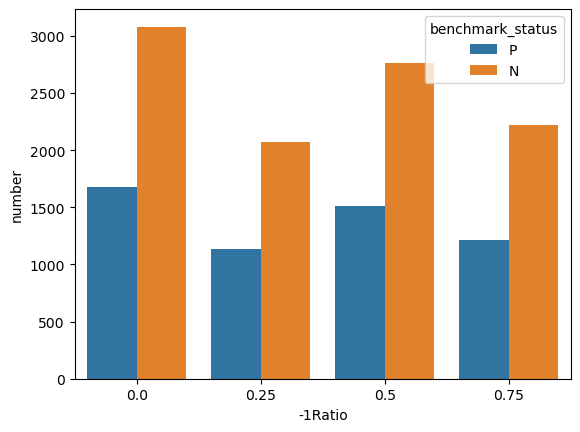

In [156]:

ax = sns.barplot(x="-1Ratio", y="number",hue="benchmark_status", data=afterFixRatio_test_Phaly_PPInum_frame_fixedNegVSposRratio)
plt.show()

In [157]:
%%time 
STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_allIdx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_topDCAs_predicted_results['XtopDCAs'][fixedNegVSposRratio_allIdx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_topDCAs_predicted_results['YtopDCAs'][fixedNegVSposRratio_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )



after filtering,  (15667, 20) (15667,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 15667
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (12533, 20) (3134, 20) (12533,) (3134,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 3134 208 2926
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (12741, 20) (12741,) 4600.0 (2926,) 932.0
CPU times: user 46.7 s, sys: 10.9 s, total: 57.5 s
Wall time: 2min 5s


In [158]:
sum(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio['YtopFeas']==1),sum(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio['YtopFeas']==0)


(5532, 10135)

In [159]:


%%time 
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_allIdx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_allIdx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )



after filtering,  (15667, 20) (15667,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 15667
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (12533, 20) (3134, 20) (12533,) (3134,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 3134 208 2926
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (12741, 20) (12741,) 4600.0 (2926,) 932.0
CPU times: user 33.3 s, sys: 13.2 s, total: 46.6 s
Wall time: 1min 28s


In [160]:

print(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio['LR']["Model"].best_estimator_.coef_[0])
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio['LR']["Model"].best_estimator_.coef_[0]
#print(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio['RF']["Model"].feature_importances_)


[ 0.32588033  0.44357972  0.54467173  0.          2.71074041  0.84598286
  0.          0.          0.         -0.86087112  0.34554275  0.
  0.          0.         -0.42219313  0.          0.          0.
  0.         -0.17588914]


array([ 0.32588033,  0.44357972,  0.54467173,  0.        ,  2.71074041,
        0.84598286,  0.        ,  0.        ,  0.        , -0.86087112,
        0.34554275,  0.        ,  0.        ,  0.        , -0.42219313,
        0.        ,  0.        ,  0.        ,  0.        , -0.17588914])

In [161]:
%%time 
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_allIdx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_allIdx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )



after filtering,  (15667, 4) (15667,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 15667
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (12533, 4) (3134, 4) (12533,) (3134,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 3134 208 2926
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (12741, 4) (12741,) 4600.0 (2926,) 932.0
CPU times: user 24 s, sys: 10.4 s, total: 34.4 s
Wall time: 51 s


In [162]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio.keys()

dict_keys(['XtopFeas', 'YtopFeas', 'XtopFeas_train', 'XtopFeas_test', 'ytopFeas_train', 'ytopFeas_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [163]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["LR"].keys()

dict_keys(['Model', 'LR_ytopFeas_predict', 'LR_ytopFeas_predict_prob', 'LR_ytopFeas_predict_train', 'LR_ytopFeas_predict_prob_train'])

In [164]:
np.sum(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["YtopFeas"]==1,
       axis=0)
np.sum(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["YtopFeas"]==0,
       axis=0)

10135

In [165]:
print(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["XtopFeas"].shape)
np.sum(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["XtopFeas"]==-1,
       axis=0)

(15667, 4)


array([   0, 5870, 6651, 9523])

In [166]:
print(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["XtopFeas"].shape)
np.sum(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["XtopFeas"]==-1,
       axis=0)

(15667, 20)


array([   0,    0,    0,    0,    0, 5870, 5870, 5870, 5870, 5870, 6651,
       6651, 6651, 6651, 6651, 9523, 9523, 9523, 9523, 9523])

### check replacing 

In [167]:
%%time 
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_allIdx,:],
                                                                inputFea_matrixList=[replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_allIdx,:],],
                                                                Y_matrix=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )



after filtering,  (15667, 4) (15667,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 15667
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (12533, 4) (3134, 4) (12533,) (3134,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 3134 208 2926
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (12741, 4) (12741,) 4600.0 (2926,) 932.0
CPU times: user 12.5 s, sys: 13.4 s, total: 25.9 s
Wall time: 18.2 s


In [168]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio.keys()

dict_keys(['XtopFeas', 'YtopFeas', 'XtopFeas_train', 'XtopFeas_test', 'ytopFeas_train', 'ytopFeas_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [169]:
print(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio['XtopFeas'].shape)
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio['XtopFeas']

(15667, 4)


array([[ 1., -1.,  1., -1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       ...,
       [ 1., -1., -1., -1.],
       [ 1., -1., -1.,  1.],
       [ 1., -1., -1., -1.]])

In [170]:
set(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio['updated_allPPI_allInfo_frame']["LR_onesProb"])

{0.05155620948931262,
 0.05215374038734017,
 0.054472962926023646,
 0.05510233469924129,
 0.05578634808639507,
 0.056429988861140624,
 0.05892754946110791,
 0.059605144336515294}

In [171]:
set(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio['updated_allPPI_allInfo_frame']["RF_onesProb"])

{0.32162530212489193,
 0.3217755242559405,
 0.32800344135540926,
 0.3586999008097251,
 0.3663364854136159,
 0.3839739910492027,
 0.38409326395818705,
 0.6752831251219286}

1.0_-1.0_1.0_-1.0 512 1208 2.359375
1.0_-1.0_-1.0_-1.0 1213 2222 1.8318219291014015
1.0_-1.0_1.0_1.0 179 98 0.547486033519553
1.0_1.0_-1.0_1.0 215 446 2.074418604651163
1.0_1.0_1.0_1.0 1681 3080 1.8322427126710292
1.0_-1.0_-1.0_1.0 172 269 1.563953488372093
1.0_1.0_-1.0_-1.0 823 1284 1.560145808019441
1.0_1.0_1.0_-1.0 737 1528 2.073270013568521


In [172]:
newIndex_HighDCA_Subject_allPPI_allInfo_frame_fixedNegVSposRratio=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio['updated_allPPI_allInfo_frame'].reset_index(drop=True, inplace=False)

replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_fixedNegVSposRratio_X=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio['XtopFeas']
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_fixedNegVSposRratio_XFrame=pd.DataFrame(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_fixedNegVSposRratio_X)
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_fixedNegVSposRratio_XFrame=pd.concat([newIndex_HighDCA_Subject_allPPI_allInfo_frame_fixedNegVSposRratio.loc[:,["STRING_ID1","STRING_ID2","benchmark_status","LR_onesProb","RF_onesProb"]] ,replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_fixedNegVSposRratio_XFrame],
                                                                                                axis=1,ignore_index=True)





In [173]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_fixedNegVSposRratio_XFrame.sort_values(by=4,ascending=False)

0             1  2         3         4    5    6    7    8
904    511145.b0296  511145.b3309  P  0.056430  0.675283  1.0 -1.0  1.0  1.0
8078   511145.b0812  511145.b3936  N  0.056430  0.675283  1.0 -1.0  1.0  1.0
12896  511145.b2926  511145.b3957  N  0.056430  0.675283  1.0 -1.0  1.0  1.0
6856   511145.b0215  511145.b3463  N  0.056430  0.675283  1.0 -1.0  1.0  1.0
2069   511145.b3319  511145.b3936  P  0.056430  0.675283  1.0 -1.0  1.0  1.0
...             ...           ... ..       ...       ...  ...  ...  ...  ...
1058   511145.b3231  511145.b3312  P  0.052154  0.321625  1.0 -1.0  1.0 -1.0
13695  511145.b0451  511145.b1288  N  0.052154  0.321625  1.0 -1.0  1.0 -1.0
13697  511145.b3162  511145.b3911  N  0.052154  0.321625  1.0 -1.0  1.0 -1.0
3378   511145.b0545  511145.b3315  P  0.052154  0.321625  1.0 -1.0  1.0 -1.0
0      511145.b3312  511145.b3318  P  0.052154  0.321625  1.0 -1.0  1.0 -1.0

[15667 rows x 9 columns]

In [174]:
test_missValueCombination=defaultdict(list)
for i,rfp in enumerate(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio['updated_allPPI_allInfo_frame']["RF_onesProb"]):
    #print(i,rfp)
    test_missValueCombination[rfp].append(tuple(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio['XtopFeas'][i,:]))

In [175]:
for k, v in test_missValueCombination.items():
    print(k,set(v))

0.32162530212489193 {(1.0, -1.0, 1.0, -1.0)}
0.3663364854136159 {(1.0, -1.0, -1.0, -1.0)}
0.6752831251219286 {(1.0, -1.0, 1.0, 1.0)}
0.3217755242559405 {(1.0, 1.0, -1.0, 1.0)}
0.3586999008097251 {(1.0, 1.0, 1.0, 1.0)}
0.38409326395818705 {(1.0, -1.0, -1.0, 1.0)}
0.3839739910492027 {(1.0, 1.0, -1.0, -1.0)}
0.32800344135540926 {(1.0, 1.0, 1.0, -1.0)}


In [176]:
%%time 
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_allIdx,:],
                                                                inputFea_matrixList=[replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_allIdx,:],],
                                                                Y_matrix=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )



after filtering,  (15667, 20) (15667,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 15667
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (12533, 20) (3134, 20) (12533,) (3134,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 3134 208 2926
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (12741, 20) (12741,) 4600.0 (2926,) 932.0
CPU times: user 13.4 s, sys: 10.6 s, total: 24 s
Wall time: 19.5 s


In [177]:
print(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio['XtopFeas'].shape)
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio['XtopFeas']

(15667, 20)


array([[ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       ...,
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.]])

### check sorted 

In [178]:
%%time 
sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio=sortedOtherPhyla_FullPhylaIntegration_uniquePhyla_ML_predictions('XtopFeas', 'YtopFeas',
                                    'XtopFeas_train', 'XtopFeas_test', 
                                    'ytopFeas_train', 'ytopFeas_test',
                                    'updated_allPPI_allInfo_frame',
                                    STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio,
                                    ML_methods=["LR","RF"],
                                    topDCA_num=5,
                                    sortAllPhyla=False,
                                    
                                    )



CPU times: user 11.6 s, sys: 10 s, total: 21.6 s
Wall time: 16.9 s


In [179]:
sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio['XSortedFeas'][0,:]

array([ 7.3076,  1.6527,  1.5302,  1.4725,  1.4675,  3.7574,  3.5048,
        2.4912,  2.2139,  2.147 , -1.    , -1.    , -1.    , -1.    ,
       -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ])

In [180]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio['XtopFeas'][0,:]


array([ 7.3076,  1.6527,  1.5302,  1.4725,  1.4675, -1.    , -1.    ,
       -1.    , -1.    , -1.    ,  3.7574,  3.5048,  2.4912,  2.2139,
        2.147 , -1.    , -1.    , -1.    , -1.    , -1.    ])

In [181]:
%%time 
sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio=sortedOtherPhyla_FullPhylaIntegration_uniquePhyla_ML_predictions('XtopFeas', 'YtopFeas',
                                    'XtopFeas_train', 'XtopFeas_test', 
                                    'ytopFeas_train', 'ytopFeas_test',
                                    'updated_allPPI_allInfo_frame',
                                    replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio,
                                    ML_methods=["LR","RF"],
                                    topDCA_num=1,
                                    sortAllPhyla=False,
                                    
                                    )



CPU times: user 2.76 s, sys: 9.54 s, total: 12.3 s
Wall time: 978 ms


In [182]:
sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio['XSortedFeas'][0,:]

array([ 1.,  1., -1., -1.])

In [183]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio['XtopFeas'][0,:]

array([ 1., -1.,  1., -1.])

In [184]:
%%time 
sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio=sortedOtherPhyla_FullPhylaIntegration_uniquePhyla_ML_predictions('XtopFeas', 'YtopFeas',
                                    'XtopFeas_train', 'XtopFeas_test', 
                                    'ytopFeas_train', 'ytopFeas_test',
                                    'updated_allPPI_allInfo_frame',
                                    replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio,
                                    ML_methods=["LR","RF"],
                                    topDCA_num=5,
                                    sortAllPhyla=False,
                                    
                                    )



CPU times: user 3.1 s, sys: 10.7 s, total: 13.8 s
Wall time: 1.96 s


In [185]:
sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio['XSortedFeas'][0:2,:]

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.]])

In [186]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio['XtopFeas'][0:2,:]

array([[ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
         1.,  1., -1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.]])

### plot

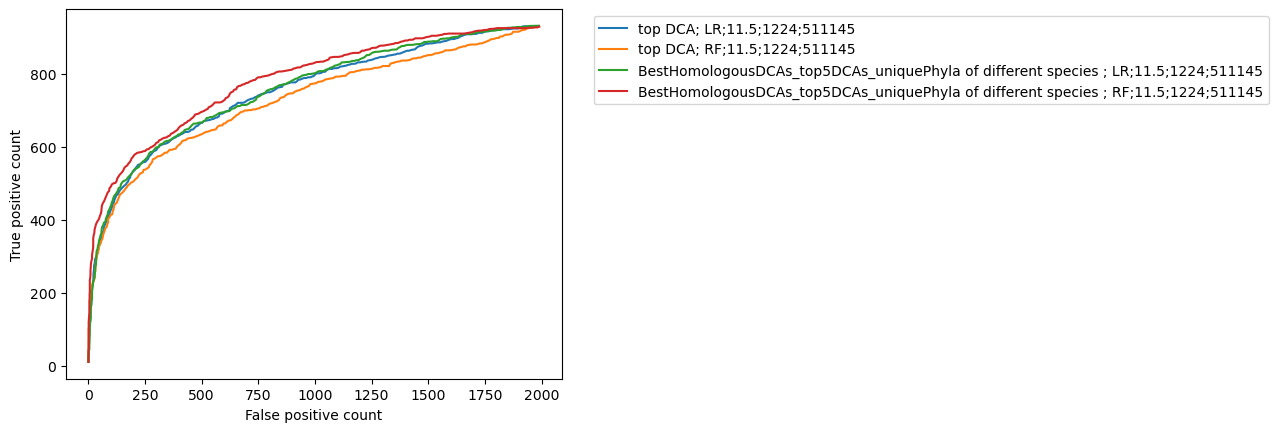

In [187]:

count_label="count"
step=10
zoom_thres=None


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

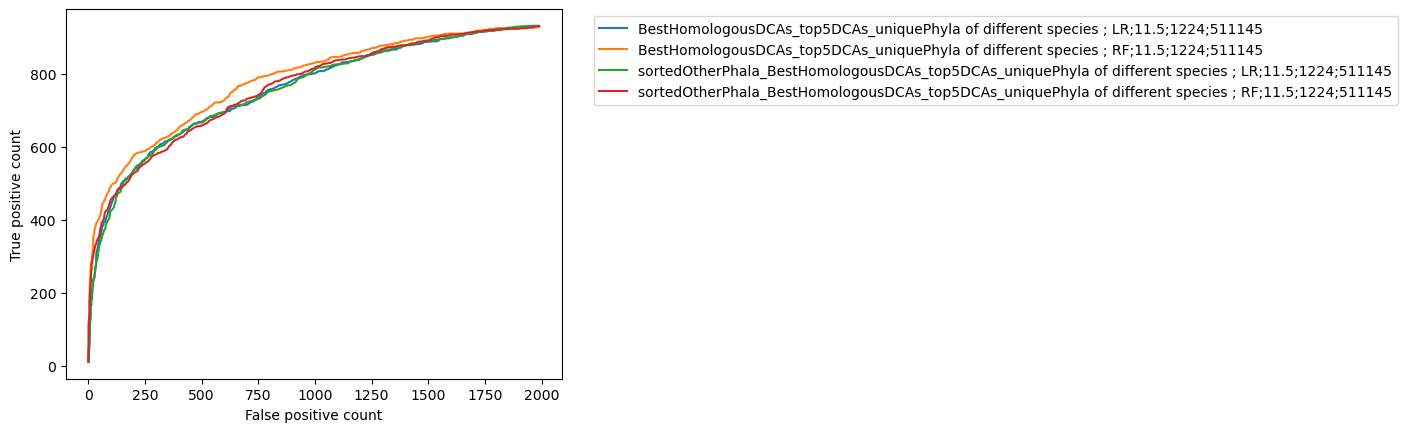

In [188]:

count_label="count"
step=10
zoom_thres=None



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ySortedFeas_predict_prob'], 
             sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ySortedFeas_predict_prob'], 
             sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

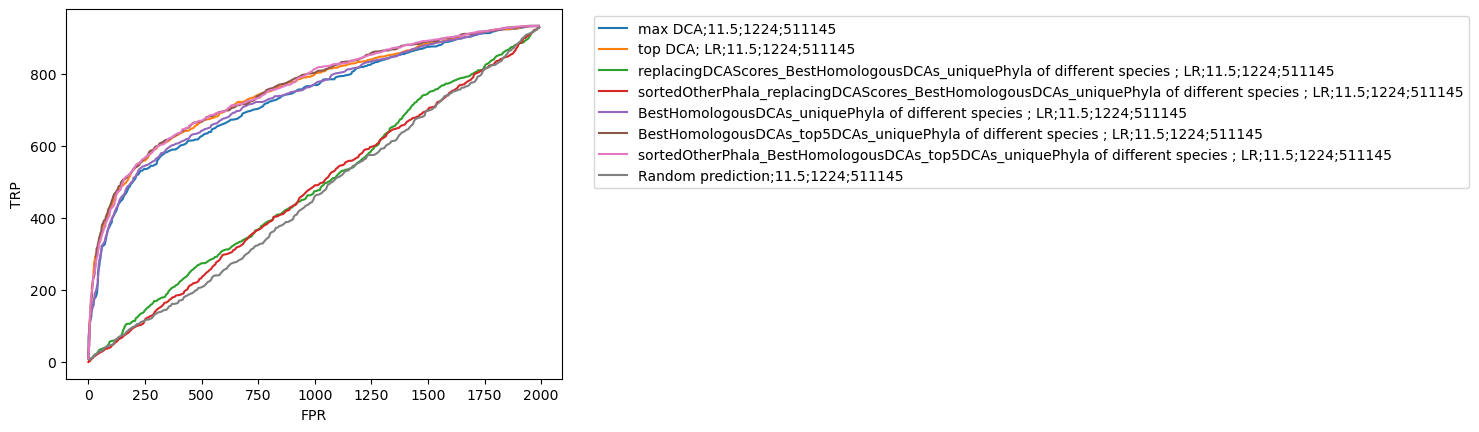

In [189]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ySortedFeas_predict_prob'], 
             sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ySortedFeas_predict_prob'], 
             sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

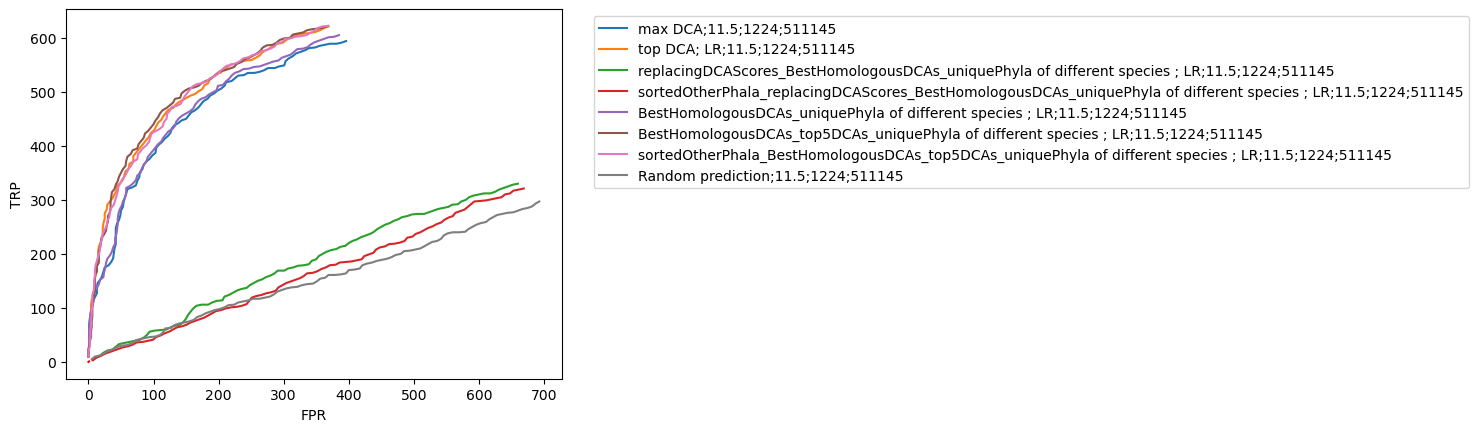

In [190]:

count_label="count"
step=10
zoom_thres=1000




DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ySortedFeas_predict_prob'], 
             sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ySortedFeas_predict_prob'], 
             sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

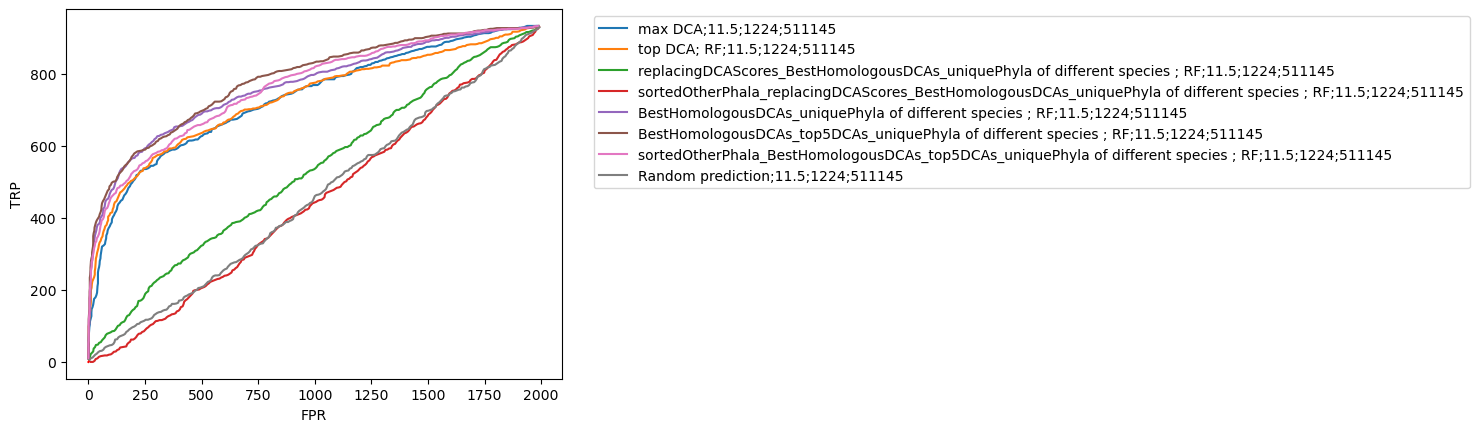

In [191]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ySortedFeas_predict_prob'], 
             sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ySortedFeas_predict_prob'], 
             sortedOtherPhala_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

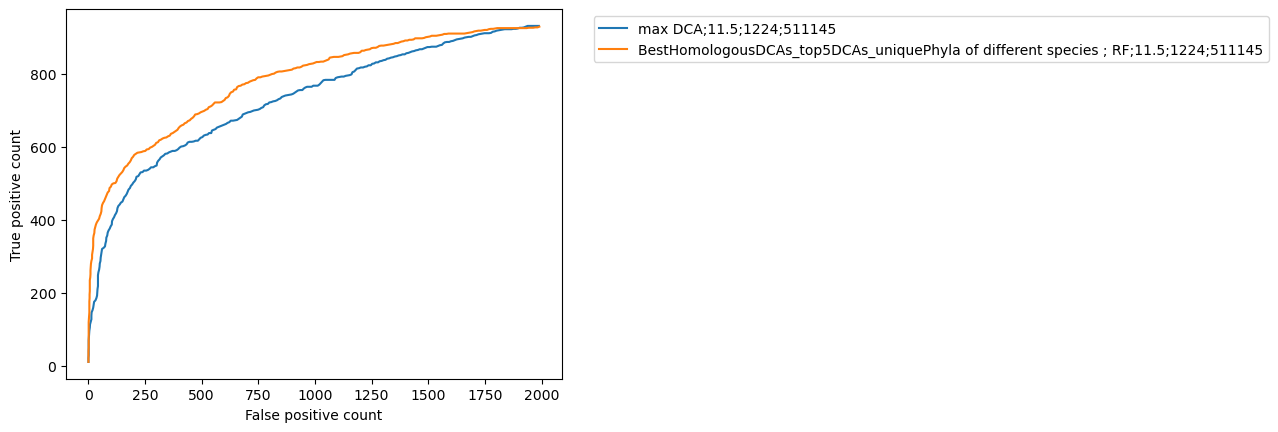

In [192]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [193]:

print(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio['LR']["Model"].best_estimator_.coef_[0])

# print(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio['RF']["Model"].feature_importances_)


[0.33967286 0.28105528 0.6688296  0.         0.11187474 0.12197941
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.93488302 1.8962854 ]


In [194]:

print(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio['LR']["Model"].best_estimator_.coef_[0])

# print(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio['RF']["Model"].feature_importances_)


[ 0.32588033  0.44357972  0.54467173  0.          2.71074041  0.84598286
  0.          0.          0.         -0.86087112  0.34554275  0.
  0.          0.         -0.42219313  0.          0.          0.
  0.         -0.17588914]


In [195]:


# print(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['LR']["Model"].best_estimator_.coef_[0])

# print(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['RF']["Model"].feature_importances_)


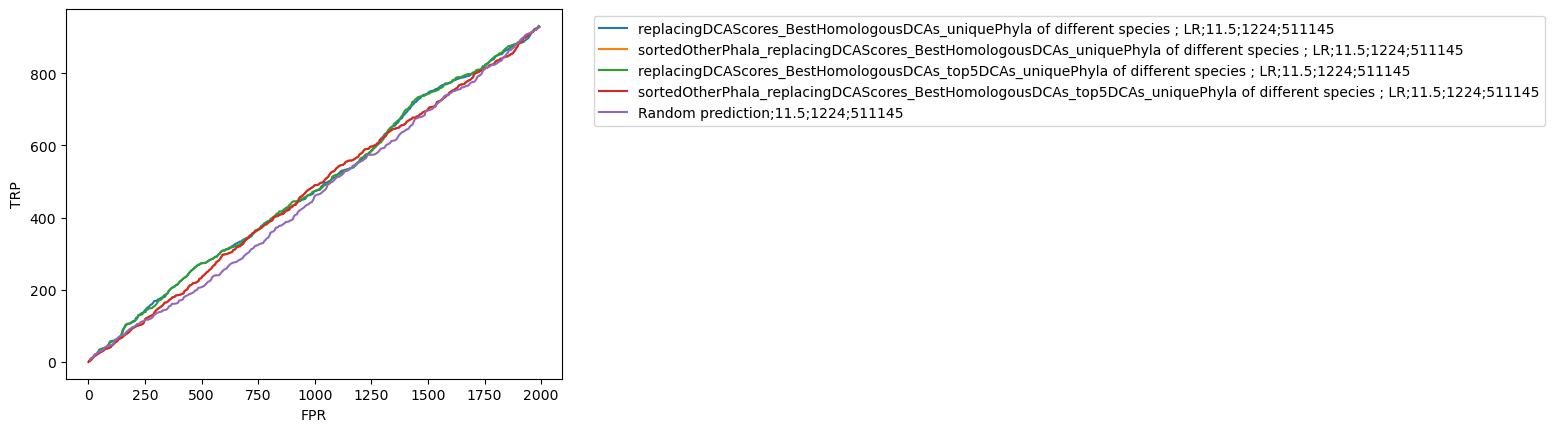

In [196]:

count_label="count"
step=10
zoom_thres=None





DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ySortedFeas_predict_prob'], 
             sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["LR"]['LR_ySortedFeas_predict_prob'], 
             sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_replacingDCAScores_BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

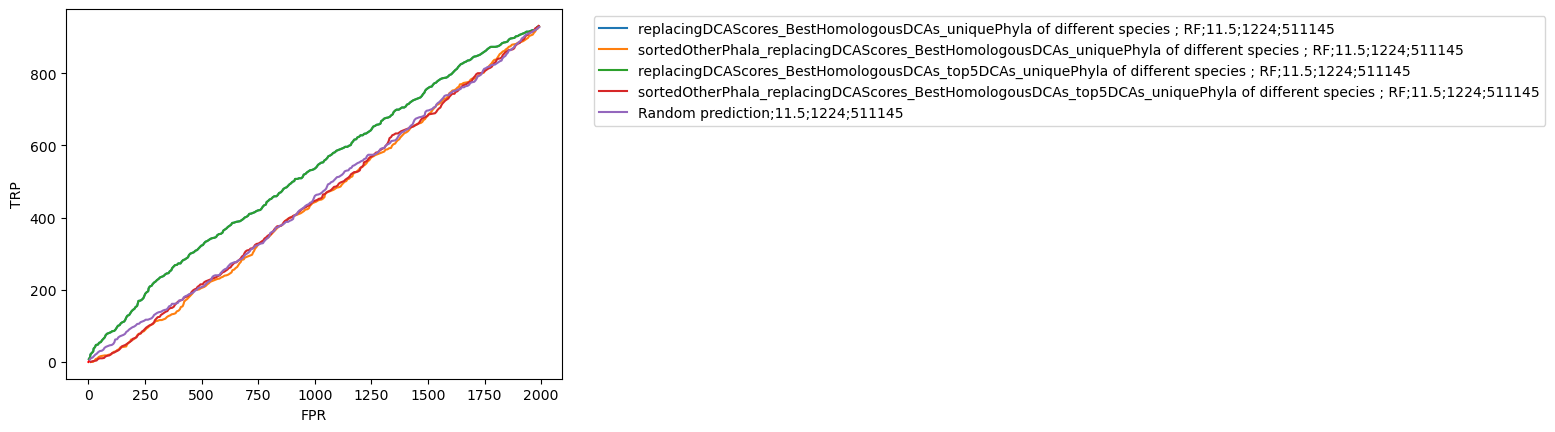

In [197]:

count_label="count"
step=10
zoom_thres=None





DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ySortedFeas_predict_prob'], 
             sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["RF"]['RF_ySortedFeas_predict_prob'], 
             sortedOtherPhala_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio["ySortedFeas_test"],
             count_label=count_label,legend="sortedOtherPhala_replacingDCAScores_BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio["ytopFeas_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

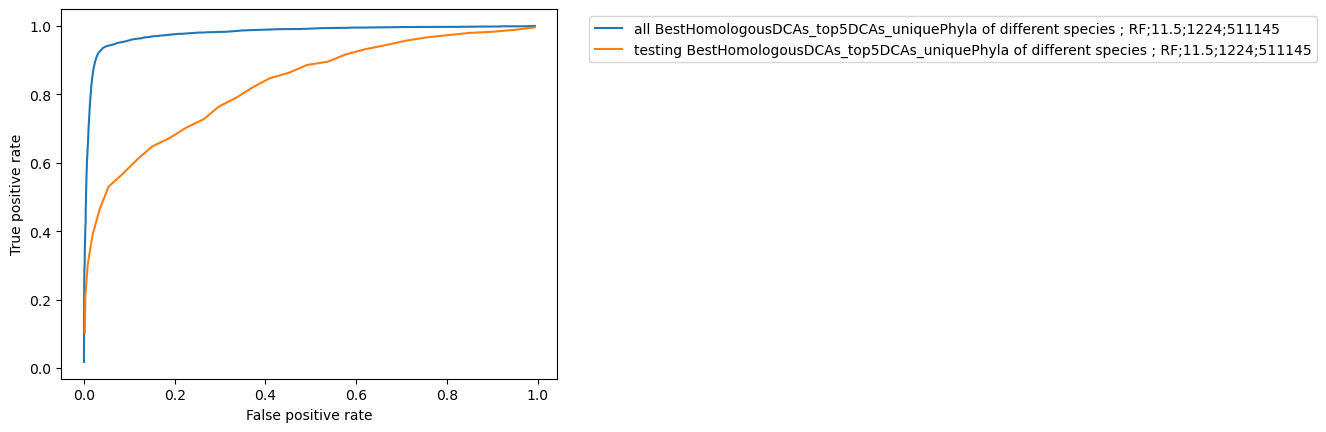

# revise ratio at each -1 group , and consider order and combination of -1



In [198]:


beforeFixRatio_test_Phaly_posPPInum, beforeFixRatio_test_Phaly_negPPInum,beforeFixRatio_test_Phaly_negVSpos_ratio

(defaultdict(int, {0.5: 1507, 0.75: 1213, 0.25: 1131, 0.0: 1681}),
 defaultdict(int, {0.5: 7687, 0.75: 7865, 0.0: 3080, 0.25: 8455}),
 {0.5: 5.100862641008627,
  0.75: 6.483924154987634,
  0.0: 1.8322427126710292,
  0.25: 7.475685234305924})

In [199]:
for  key in beforeFixRatio_test_PhalyCombination_posPPInum.keys():
    print(key,beforeFixRatio_test_PhalyCombination_posPPInum[key], beforeFixRatio_test_PhalyCombination_negPPInum[key],beforeFixRatio_test_PhalyCombination_negVSpos_ratio[key])





1.0_-1.0_1.0_-1.0 512 3273 6.392578125
1.0_-1.0_-1.0_-1.0 1213 7865 6.483924154987634
1.0_-1.0_1.0_1.0 179 425 2.374301675977654
1.0_1.0_-1.0_1.0 215 1762 8.195348837209302
1.0_1.0_1.0_1.0 1681 3080 1.8322427126710292
1.0_-1.0_-1.0_1.0 172 749 4.354651162790698
1.0_1.0_-1.0_-1.0 823 3665 4.45321992709599
1.0_1.0_1.0_-1.0 737 6268 8.504748982360923


In [200]:
fixedCombination_negVSpos_ratio=beforeFixRatio_test_PhalyCombination_negVSpos_ratio[min(beforeFixRatio_test_PhalyCombination_negVSpos_ratio,key=beforeFixRatio_test_PhalyCombination_negVSpos_ratio.get)]
fixedCombination_negVSpos_ratio

1.8322427126710292

In [201]:
fixedNegVSposRratio_keepCombination_allIdx=getAllIdxOf_fixed_negVSpos_ratio_keepCombination(ori_XMatrix=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'],
                                 ori_YMatrix=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['YBestHomologousDCAs'],
                                 fixedCombinatioNegVSposRratio=fixedCombination_negVSpos_ratio,
                                                                                           )


posIdx_dict
1.0_-1.0_1.0_-1.0 512 [0, 12, 13, 19, 24, 26, 34, 36, 43, 51]
1.0_-1.0_-1.0_-1.0 1213 [1, 2, 4, 6, 8, 14, 15, 18, 21, 22]
1.0_-1.0_1.0_1.0 179 [3, 10, 11, 16, 17, 31, 76, 92, 99, 143]
1.0_1.0_-1.0_1.0 215 [5, 63, 114, 124, 228, 232, 326, 373, 378, 380]
1.0_1.0_1.0_1.0 1681 [7, 9, 25, 30, 35, 37, 39, 44, 59, 61]
1.0_-1.0_-1.0_1.0 172 [20, 41, 96, 102, 108, 115, 121, 135, 153, 160]
1.0_1.0_-1.0_-1.0 823 [28, 46, 47, 52, 58, 66, 91, 93, 107, 126]
1.0_1.0_1.0_-1.0 737 [50, 62, 89, 94, 123, 129, 141, 158, 170, 205]
negIdx_dict
1.0_1.0_-1.0_-1.0 3665 [5532, 5535, 5550, 5576, 5579, 5589, 5595, 5597, 5606, 5627]
1.0_-1.0_-1.0_-1.0 7865 [5533, 5534, 5536, 5537, 5538, 5545, 5546, 5547, 5549, 5556]
1.0_-1.0_1.0_-1.0 3273 [5539, 5541, 5544, 5555, 5561, 5585, 5596, 5611, 5615, 5629]
1.0_1.0_1.0_1.0 3080 [5540, 5542, 5548, 5552, 5554, 5567, 5568, 5574, 5575, 5578]
1.0_-1.0_1.0_1.0 425 [5543, 5614, 5630, 5654, 5776, 5779, 5878, 5975, 5998, 6007]
1.0_-1.0_-1.0_1.0 749 [5551, 5558, 5566, 55

In [202]:
XMarix_fixedNegVSposRratio_keepCombination=copy.deepcopy(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx,:])
YMarix_fixedNegVSposRratio_keepCombination=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx]

test_Phaly_posPPInum_fixedNegVSposRratio_keepCombination =defaultdict(int)
test_Phaly_negPPInum_fixedNegVSposRratio_keepCombination=defaultdict(int)

test_PhalyCombination_posPPInum_fixedNegVSposRratio_keepCombination =defaultdict(int)
test_PhalyCombination_negPPInum_fixedNegVSposRratio_keepCombination=defaultdict(int)

for i in range(0,XMarix_fixedNegVSposRratio_keepCombination.shape[0]):
    i_phyla=XMarix_fixedNegVSposRratio_keepCombination[i,:]
    i_phyla_ratio=sum(i_phyla==-1)/XMarix_fixedNegVSposRratio_keepCombination.shape[1]
    #print(i_phyla_ratio)
    i_phyla_label=[str(p) for p in i_phyla]
    i_phyla_label="_".join(i_phyla_label)
    
    i_y=YMarix_fixedNegVSposRratio_keepCombination[i]
    if i_y==1:
        test_Phaly_posPPInum_fixedNegVSposRratio_keepCombination[i_phyla_ratio] +=1
        test_PhalyCombination_posPPInum_fixedNegVSposRratio_keepCombination[i_phyla_label] +=1
    elif i_y==0:
        test_Phaly_negPPInum_fixedNegVSposRratio_keepCombination[i_phyla_ratio] +=1
        test_PhalyCombination_negPPInum_fixedNegVSposRratio_keepCombination[i_phyla_label] +=1

        
test_PhalyCombination_negVSpos_ratio_fixedNegVSposRratio_keepCombination={minus1_Ratio:number/(test_PhalyCombination_posPPInum_fixedNegVSposRratio_keepCombination[minus1_Ratio]) for minus1_Ratio,number in test_PhalyCombination_negPPInum_fixedNegVSposRratio_keepCombination.items()}


In [203]:
test_Phaly_posPPInum_fixedNegVSposRratio_keepCombination, test_Phaly_negPPInum_fixedNegVSposRratio_keepCombination

(defaultdict(int, {0.5: 1507, 0.75: 1213, 0.25: 1131, 0.0: 1681}),
 defaultdict(int, {0.5: 2760, 0.75: 2222, 0.0: 3080, 0.25: 2070}))

In [204]:
for  key in test_PhalyCombination_posPPInum_fixedNegVSposRratio_keepCombination.keys():
    print(key,test_PhalyCombination_posPPInum_fixedNegVSposRratio_keepCombination[key], test_PhalyCombination_negPPInum_fixedNegVSposRratio_keepCombination[key],test_PhalyCombination_negVSpos_ratio_fixedNegVSposRratio_keepCombination[key])





1.0_-1.0_1.0_-1.0 512 938 1.83203125
1.0_-1.0_-1.0_-1.0 1213 2222 1.8318219291014015
1.0_-1.0_1.0_1.0 179 327 1.8268156424581006
1.0_1.0_-1.0_1.0 215 393 1.827906976744186
1.0_1.0_1.0_1.0 1681 3080 1.8322427126710292
1.0_-1.0_-1.0_1.0 172 315 1.8313953488372092
1.0_1.0_-1.0_-1.0 823 1507 1.8311057108140947
1.0_1.0_1.0_-1.0 737 1350 1.8317503392130259


In [205]:
test_Phaly_PPInum_list_fixedNegVSposRratio_keepCombination=list()
for key in sorted(list(test_Phaly_posPPInum_fixedNegVSposRratio_keepCombination.keys())):
    #key=key/10
    print(key)
    test_Phaly_PPInum_list_fixedNegVSposRratio_keepCombination.append([key,test_Phaly_posPPInum_fixedNegVSposRratio_keepCombination[key],"P"])
    test_Phaly_PPInum_list_fixedNegVSposRratio_keepCombination.append([key,test_Phaly_negPPInum_fixedNegVSposRratio_keepCombination[key],"N"])
test_Phaly_PPInum_frame_fixedNegVSposRratio_keepCombination=pd.DataFrame(test_Phaly_PPInum_list_fixedNegVSposRratio_keepCombination,columns=["-1Ratio","number","benchmark_status"])

0.0
0.25
0.5
0.75


In [206]:
test_Phaly_PPInum_frame_fixedNegVSposRratio_keepCombination

-1Ratio  number benchmark_status
0     0.00    1681                P
1     0.00    3080                N
2     0.25    1131                P
3     0.25    2070                N
4     0.50    1507                P
5     0.50    2760                N
6     0.75    1213                P
7     0.75    2222                N

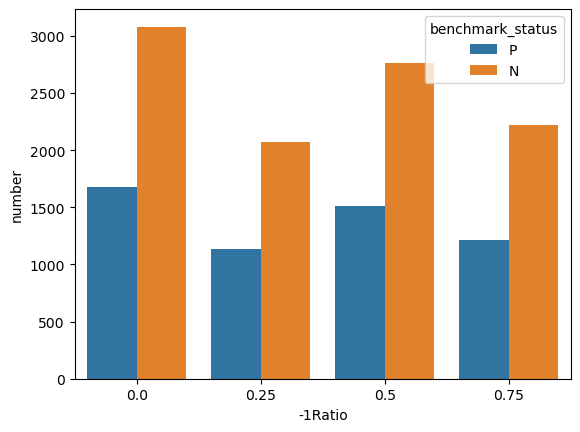

In [207]:

ax = sns.barplot(x="-1Ratio", y="number",hue="benchmark_status", data=test_Phaly_PPInum_frame_fixedNegVSposRratio_keepCombination)
plt.show()

In [208]:
%%time 
STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_keepCombination_allIdx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_topDCAs_predicted_results['XtopDCAs'][fixedNegVSposRratio_keepCombination_allIdx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_topDCAs_predicted_results['YtopDCAs'][fixedNegVSposRratio_keepCombination_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )



after filtering,  (15664, 20) (15664,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 15664
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (12531, 20) (3133, 20) (12531,) (3133,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 3133 215 2918
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (12746, 20) (12746,) 4604.0 (2918,) 928.0
CPU times: user 44.4 s, sys: 13.1 s, total: 57.4 s
Wall time: 2min 8s


In [614]:
sum(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas'])

5532.0

In [483]:
# print(np.sum(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["YtopFeas"]==1,
#        axis=0),
# np.sum(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["YtopFeas"]==0,
#        axis=0))

In [484]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination.keys()

dict_keys(['XtopFeas', 'YtopFeas', 'XtopFeas_train', 'XtopFeas_test', 'ytopFeas_train', 'ytopFeas_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [211]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame'].to_csv(Subect_Benchmark_folder+"fixedNegVSposRratio_metadata.csv",
                                                                                                                                  header=True, index=None,sep="\t",
                                                                                                                                 )

In [498]:
#https://stackoverflow.com/questions/34143829/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-jobli
with open(os.path.join(Subect_Benchmark_folder,
                       f"STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination_LR.pickle"),"wb") as f:
    pickle.dump(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['Model'].best_estimator_,f)
    
    
    
#https://stackoverflow.com/questions/34143829/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-jobli
with open(os.path.join(Subect_Benchmark_folder,
                       f"STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination_RF.pickle"),"wb") as f:
    pickle.dump(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['Model'].best_estimator_,f)
    
    

In [515]:
%%time 
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_keepCombination_allIdx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )



after filtering,  (15664, 20) (15664,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 15664
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (12531, 20) (3133, 20) (12531,) (3133,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 3133 215 2918
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (12746, 20) (12746,) 4604.0 (2918,) 928.0
CPU times: user 31.3 s, sys: 17.2 s, total: 48.4 s
Wall time: 1min 27s


In [525]:
%%time 
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs,\
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_testPPs=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_keepCombination_allIdx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                getTrainandTestPPTuples=True
                                                                
                                                                                             )

print(len(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs))
print(len(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_testPPs))


count=0
for pp in STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs:
    if HighDCA_Subject_allPPI_allInfo_dict[pp][0]=="P":
        count +=1
print(count)

after filtering,  (15664, 20) (15664,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 15664
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 3133 215 2918
len(all_PPTuples_train),len(all_PPTuples_test): 12746 2918
12746
2918
4604
CPU times: user 9.68 s, sys: 1.44 s, total: 11.1 s
Wall time: 11.1 s


### check overfitting 

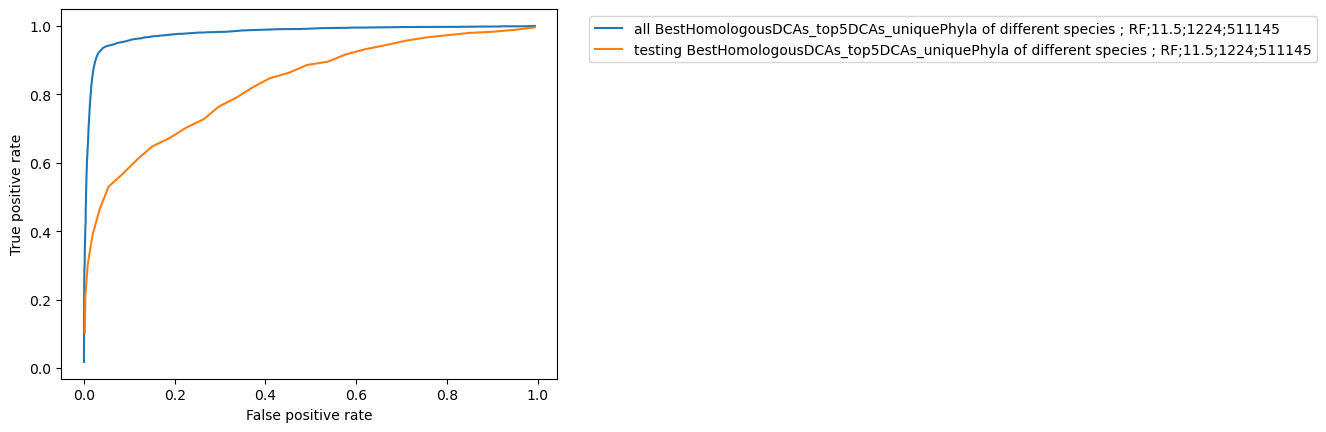

In [617]:

count_label="rate"
step=100
zoom_thres=None


# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["updated_allPPI_allInfo_frame"]["LR_onesProb"], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas'],
#              count_label=count_label,legend="all BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["updated_allPPI_allInfo_frame"]["RF_onesProb"], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas'],
             count_label=count_label,legend="all BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="testing BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="testing BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

### save ML model to identify novel ppi in whole proteome level 

In [499]:
#https://stackoverflow.com/questions/34143829/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-jobli
with open(os.path.join(Subect_Benchmark_folder,
                       f"STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_LR.pickle"),"wb") as f:
    pickle.dump(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['Model'].best_estimator_,f)
    
    
    
#https://stackoverflow.com/questions/34143829/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-jobli
with open(os.path.join(Subect_Benchmark_folder,
                       f"STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_RF.pickle"),"wb") as f:
    pickle.dump(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['Model'].best_estimator_,f)
    
    
with open(os.path.join(Subect_Benchmark_folder,
                       f"STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs.pickle"),"wb") as f:
    pickle.dump(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs,f)
    
    
# then transfer this to s3it 
rsync -az --progress /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGPhyBalancePhyla_Benchmark/STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs.pickle  tfang@cluster.s3it.uzh.ch:/net/cephfs/shares/von-mering.imls.uzh/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGPhyBalancePhyla_Benchmark

In [527]:
Subect_Benchmark_folder

'/mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGPhyBalancePhyla_Benchmark/'

In [213]:

tobeSaved_frame=pd.DataFrame(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['XtopFeas'])

tobeSaved_frame.to_csv(Subect_Benchmark_folder+"fixedNegVSposRratio_BestHomologousDCAs_top5DCAs.csv",
                                           header=True, index=None,sep="\t",  
                                                 )

In [214]:
%%time 
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_keepCombination_allIdx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )



after filtering,  (15664, 4) (15664,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 15664
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (12531, 4) (3133, 4) (12531,) (3133,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 3133 215 2918
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (12746, 4) (12746,) 4604.0 (2918,) 928.0
CPU times: user 25.4 s, sys: 10.8 s, total: 36.2 s
Wall time: 53.5 s


In [215]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination.keys()

dict_keys(['XtopFeas', 'YtopFeas', 'XtopFeas_train', 'XtopFeas_test', 'ytopFeas_train', 'ytopFeas_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [216]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"].keys()

dict_keys(['Model', 'LR_ytopFeas_predict', 'LR_ytopFeas_predict_prob', 'LR_ytopFeas_predict_train', 'LR_ytopFeas_predict_prob_train'])

In [217]:
print(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas"].shape)
np.sum(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas"]==-1,
       axis=0)

(15664, 4)


array([   0, 5878, 6860, 9302])

In [218]:
print(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas"].shape)
np.sum(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas"]==-1,
       axis=0)

(15664, 20)


array([   0,    0,    0,    0,    0, 5878, 5878, 5878, 5878, 5878, 6860,
       6860, 6860, 6860, 6860, 9302, 9302, 9302, 9302, 9302])

In [219]:

print(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['LR']["Model"].best_estimator_.coef_[0])
# print(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['RF']["Model"].feature_importances_)


[ 0.43443672  0.34965541  0.32048865  0.          2.93283246  0.84599574
  0.          0.          0.         -0.84241495  0.34753211  0.
  0.          0.         -0.34603379  0.          0.          0.
  0.         -0.26558989]


### check replacing 

In [220]:
%%time 
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_keepCombination_allIdx,:],
                                                                inputFea_matrixList=[replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx,:],],
                                                                Y_matrix=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )



after filtering,  (15664, 20) (15664,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 15664
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (12531, 20) (3133, 20) (12531,) (3133,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 3133 215 2918
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (12746, 20) (12746,) 4604.0 (2918,) 928.0
CPU times: user 14.1 s, sys: 13.1 s, total: 27.2 s
Wall time: 20.4 s


In [221]:
%%time 
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_keepCombination_allIdx,:],
                                                                inputFea_matrixList=[replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx,:],],
                                                                Y_matrix=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )



after filtering,  (15664, 4) (15664,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 15664
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (12531, 4) (3133, 4) (12531,) (3133,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 3133 215 2918
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (12746, 4) (12746,) 4604.0 (2918,) 928.0
CPU times: user 14.7 s, sys: 17.9 s, total: 32.7 s
Wall time: 20.4 s


In [222]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination.keys()

dict_keys(['XtopFeas', 'YtopFeas', 'XtopFeas_train', 'XtopFeas_test', 'ytopFeas_train', 'ytopFeas_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [223]:
print(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination['XtopFeas'].shape)
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination['XtopFeas']

(15664, 4)


array([[ 1., -1.,  1., -1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -1.],
       ...,
       [ 1., -1., -1., -1.],
       [ 1., -1.,  1., -1.],
       [ 1.,  1., -1.,  1.]])

In [438]:
set(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame']["LR_onesProb"])

{0.05470112823829623}

In [437]:
set(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame']["RF_onesProb"])

{0.347941273580922,
 0.3492618157648646,
 0.35452494691464714,
 0.35489798731309025,
 0.35986275843194226,
 0.36834914131087027,
 0.37106600537859463,
 0.3774819865021516}

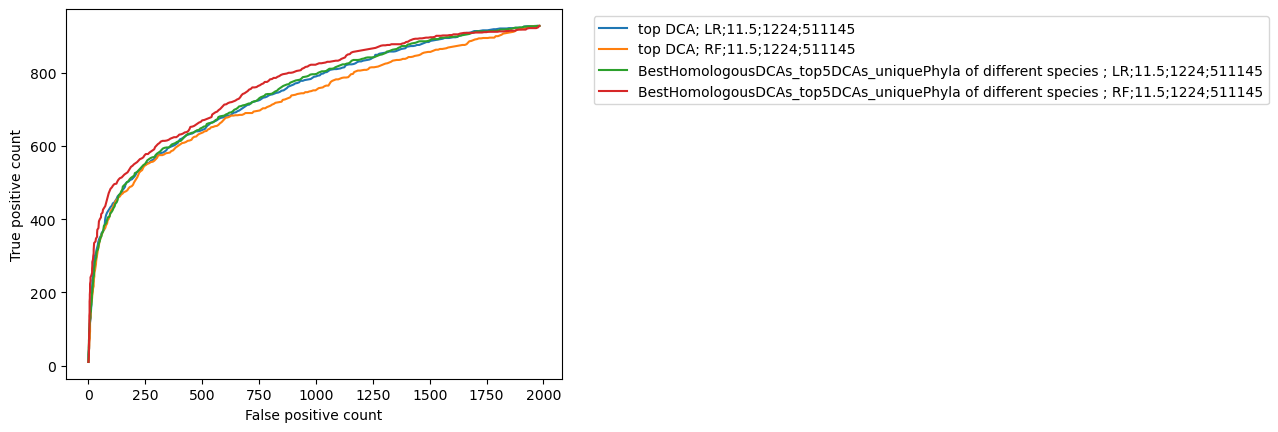

In [226]:

count_label="count"
step=10
zoom_thres=None


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

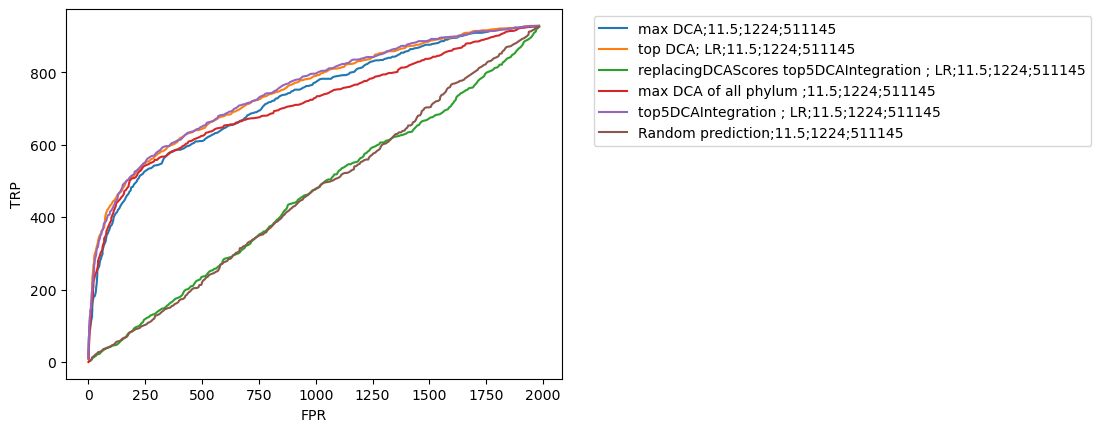

In [227]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores top5DCAIntegration ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"].max(axis=1), 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="max DCA of all phylum "+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

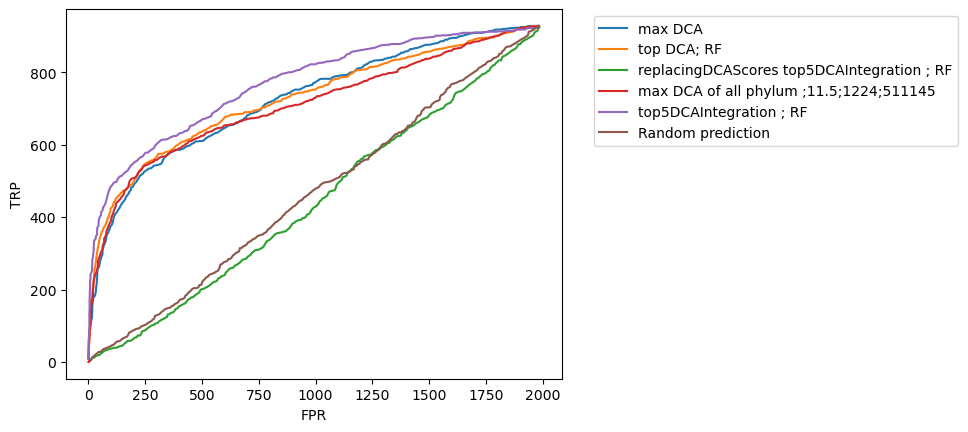

In [228]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="max DCA",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores top5DCAIntegration ; RF",step=step,zoom_thres=zoom_thres)




# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"].max(axis=1), 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="max DCA of all phylum "+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; RF",step=step,zoom_thres=zoom_thres)


Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction",step=step,zoom_thres=zoom_thres)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

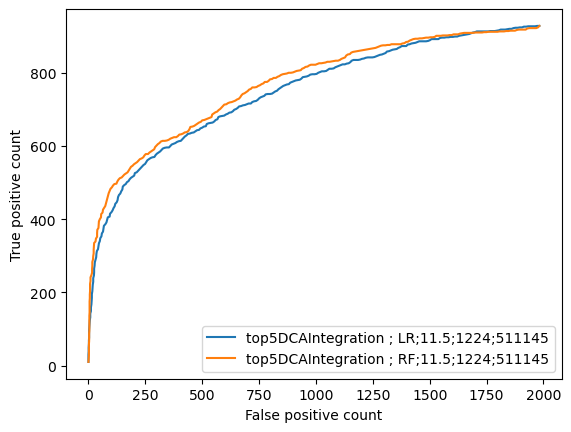

In [229]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

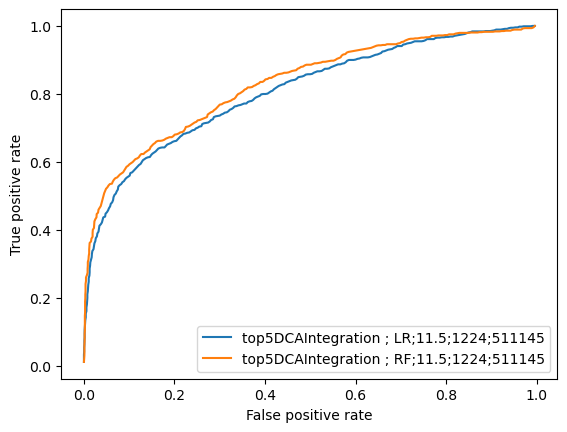

In [230]:

count_label="rate"
step=10
zoom_thres=None




DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

# testing remove samples with many missing values 

In [231]:
notManyNans_0_idx,notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results=sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                  HighDCA_Subject_BestHomologousDCAs_dict=HighDCA_Subject_BestHomologousDCAs_dict,
                  ML_methods=["LR","RF"],
                   EggNOG_group_level2=EggNOG_group_level2,
                  CoEvo_type="DCA",
                  deleting_column=None,
                  DCA_thres=0,
                    fillMissingValue=-1,
                    removeSamples_withManyNans=True,
                    allowedMissing_num=[0,],
                    topDCA_num=1,
                    benchmark_suffix="STRINGPhyBalancePhyla_Benchmark/")

print(len(notManyNans_0_idx),sum(notManyNans_0_idx))

 ML_inputs: /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/511145_EggNOGmaxLevel1224_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_STRINGPhyBalancePhyla_Benchmark/ML_inputs/
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
Pos_allPPI_allInfo_frame.shape: (5532, 7)
Neg_allPPI_allInfo_frame.shape: (27087, 7)
allPPI_allInfo_frame.shape: (32619, 7)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 32619
OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (32619, 4)
i_allowedMissing_num:, 0
after removeSamples_withManyNans, OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (4761, 4)
after removeSamples_withManyNans,len(allPPI_cogs): 4761
after deleting colum, OnlyTopPosNeg_NonPara_XBestHomologousDCAs.shape: (4761, 4)
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (3

In [232]:
print(sum(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['YBestHomologousDCAs']==1),
     sum(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['YBestHomologousDCAs']==0))

1681 3080


In [233]:
%%time 
notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.loc[notManyNans_0_idx,:],
                                                                #inputFea_labelList=["DCAs",],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs"][notManyNans_0_idx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_topDCAs_predicted_results["YtopDCAs"][notManyNans_0_idx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )

after filtering,  (4761, 20) (4761,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 4761
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (3808, 20) (953, 20) (3808,) (953,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 953 47 906
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (3855, 20) (3855,) 1359.0 (906,) 322.0
CPU times: user 19.6 s, sys: 11.4 s, total: 31 s
Wall time: 40.3 s


In [234]:

%%time 
notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.loc[notManyNans_0_idx,:],
                                                                #inputFea_labelList=["DCAs",],
                                                                inputFea_matrixList=[replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["XBestHomologousDCAs"][notManyNans_0_idx,:],],
                                                                Y_matrix=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["YBestHomologousDCAs"][notManyNans_0_idx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )

after filtering,  (4761, 4) (4761,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 4761
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (3808, 4) (953, 4) (3808,) (953,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 953 47 906
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (3855, 4) (3855,) 1359.0 (906,) 322.0
CPU times: user 12.8 s, sys: 12.1 s, total: 24.9 s
Wall time: 15.2 s


In [235]:
%%time 
notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Subject_allPPI_allInfo_frame.loc[notManyNans_0_idx,:],
                                                                #inputFea_labelList=["DCAs",],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XBestHomologousDCAs"][notManyNans_0_idx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["YBestHomologousDCAs"][notManyNans_0_idx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )

after filtering,  (4761, 20) (4761,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 4761
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (3808, 20) (953, 20) (3808,) (953,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 953 47 906
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (3855, 20) (3855,) 1359.0 (906,) 322.0
CPU times: user 12.8 s, sys: 13 s, total: 25.8 s
Wall time: 30.8 s


In [236]:
notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]["Model"].best_estimator_.coef_[0]

array([-0.05922495,  0.        ,  0.        ,  0.        ,  1.83694057,
        0.27002474,  0.        ,  0.        ,  0.4887179 ,  2.24574405,
        0.26851733,  0.        ,  0.79367869,  0.        ,  0.86940759,
       -0.34314649,  0.        ,  0.        ,  0.        ,  2.17609916])

In [237]:
notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results.keys()

dict_keys(['XBestHomologousDCAs', 'YBestHomologousDCAs', 'XBestHomologousDCAs_train', 'XBestHomologousDCAs_test', 'yBestHomologousDCAs_train', 'yBestHomologousDCAs_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

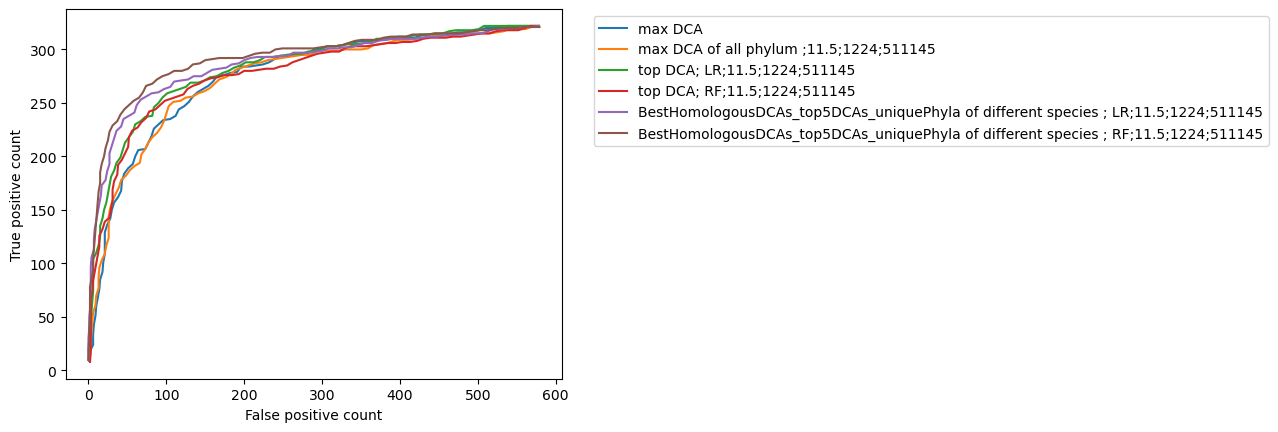

In [238]:

count_label="count"
step=10
zoom_thres=None



DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XtopFeas_test"].max(axis=1), 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA of all phylum "+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

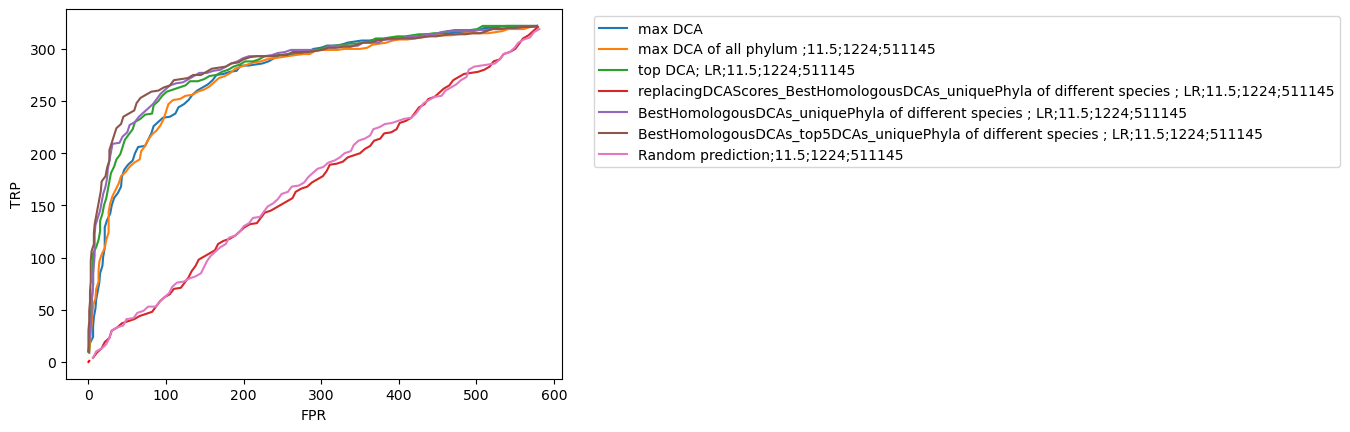

In [239]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XtopFeas_test"].max(axis=1), 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA of all phylum "+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [240]:
notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results.keys()

dict_keys(['XtopFeas', 'YtopFeas', 'XtopFeas_train', 'XtopFeas_test', 'ytopFeas_train', 'ytopFeas_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [241]:
notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['XtopFeas']

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [242]:
notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'],

(array([[0.94456475, 0.05543525],
        [0.94456475, 0.05543525],
        [0.94456475, 0.05543525],
        ...,
        [0.94456475, 0.05543525],
        [0.94456475, 0.05543525],
        [0.94456475, 0.05543525]]),)

In [243]:
set(notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['updated_allPPI_allInfo_frame']["LR_onesProb"])

{0.05543525431430377}

In [244]:
set(notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results['updated_allPPI_allInfo_frame']["RF_onesProb"])

{0.3520363164721142}

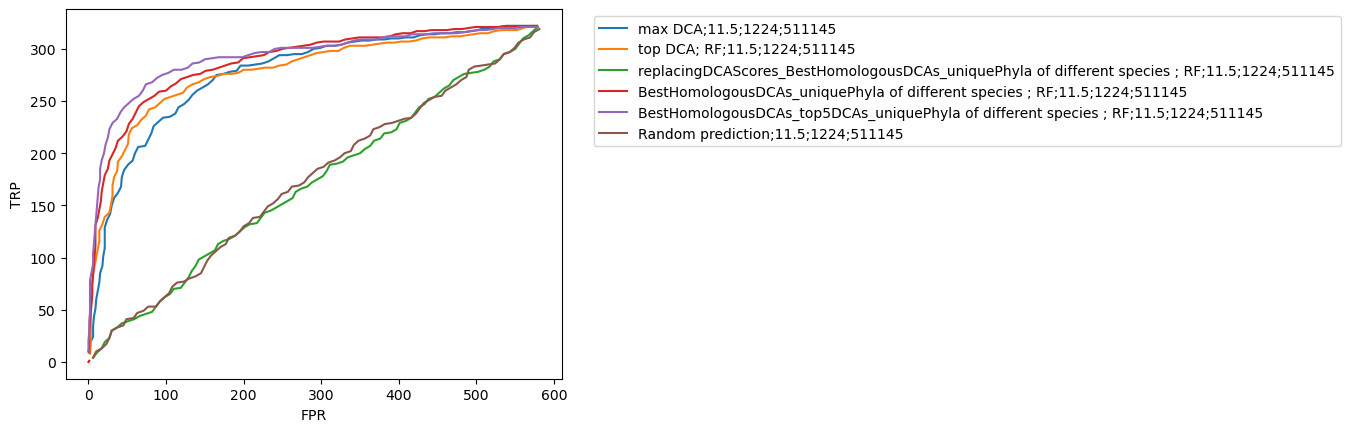

In [245]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

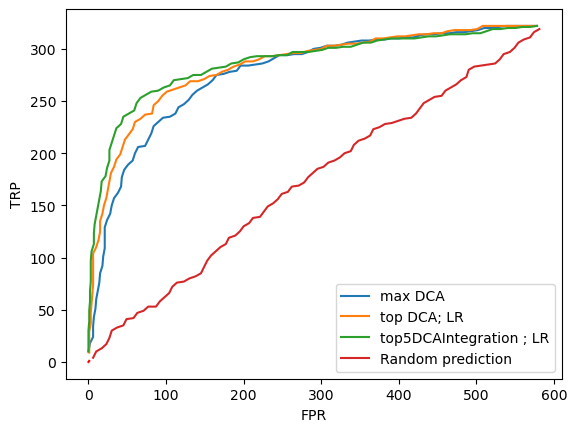

In [246]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; LR",step=step,zoom_thres=zoom_thres)


Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction",step=step)




#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

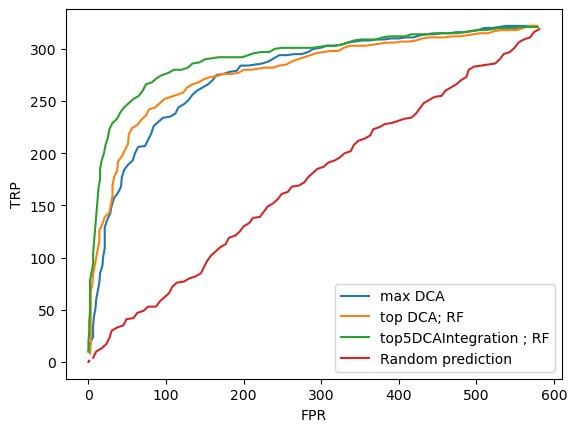

In [247]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; RF",step=step,zoom_thres=zoom_thres)


Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction",step=step)




#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

# check real pdb benchmark 

In [320]:
%reload_ext autoreload
%autoreload 2

from pdb_benchmark import get_STRING1105_pdb_interact
from pdb_benchmark import get_filter_pdbBenchmark

In [318]:
pdb_interact_PPs,pdb_complex_PPs=get_STRING1105_pdb_interact(pdb_interact_filename="/mnt/mnemo6/damian/STRING_derived_v11.5/pdb/pdb_interact.tsv",
                                retrieve_spe=511145,)


In [340]:

_,pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx=get_filter_pdbBenchmark(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame'],
                                      pdb_interact_PPs,pdb_complex_PPs,
                           pos_lable="pdb_contact",
                            return_idx=True)

print(len(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx),)



_,pdb_interact_STRING115EggNog1224Spe511145_topDCAs_fixedNegVSposRratio_keepCombination_idx=get_filter_pdbBenchmark(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame'],
                                      pdb_interact_PPs,pdb_complex_PPs,
                           pos_lable="pdb_contact",
                            return_idx=True)

print(len(pdb_interact_STRING115EggNog1224Spe511145_topDCAs_fixedNegVSposRratio_keepCombination_idx),)



10426
10426


In [341]:

_,pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx=get_filter_pdbBenchmark(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame'],
                                      pdb_interact_PPs,pdb_complex_PPs,
                           pos_lable="pdb_complex",
                            return_idx=True)

print(len(pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx),)



_,pdb_complex_STRING115EggNog1224Spe511145_topDCAs_fixedNegVSposRratio_keepCombination_idx=get_filter_pdbBenchmark(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame'],
                                      pdb_interact_PPs,pdb_complex_PPs,
                           pos_lable="pdb_complex",
                            return_idx=True)

print(len(pdb_complex_STRING115EggNog1224Spe511145_topDCAs_fixedNegVSposRratio_keepCombination_idx),)



13086
13086


In [325]:
%%time 
pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame'].iloc[pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['XtopFeas'][pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas'][pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )


after filtering,  (10426, 20) (10426,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 10426
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (8340, 20) (2086, 20) (8340,) (2086,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 2086 85 2001
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (8425, 20) (8425,) 231.0 (2001,) 63.0
CPU times: user 13.5 s, sys: 16.2 s, total: 29.7 s
Wall time: 51.5 s


In [332]:
pdb_interact_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame'].iloc[pdb_interact_STRING115EggNog1224Spe511145_topDCAs_fixedNegVSposRratio_keepCombination_idx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['XtopFeas'][pdb_interact_STRING115EggNog1224Spe511145_topDCAs_fixedNegVSposRratio_keepCombination_idx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas'][pdb_interact_STRING115EggNog1224Spe511145_topDCAs_fixedNegVSposRratio_keepCombination_idx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )


after filtering,  (10426, 20) (10426,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 10426
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (8340, 20) (2086, 20) (8340,) (2086,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 2086 85 2001
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (8425, 20) (8425,) 231.0 (2001,) 63.0


In [342]:
%%time 
pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame'].iloc[pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['XtopFeas'][pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas'][pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )


after filtering,  (13086, 20) (13086,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 13086
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (10468, 20) (2618, 20) (10468,) (2618,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 2618 110 2508
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (10578, 20) (10578,) 2419.0 (2508,) 535.0
CPU times: user 15.6 s, sys: 11.8 s, total: 27.4 s
Wall time: 44.3 s


In [343]:
pdb_complex_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Subject_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame'].iloc[pdb_complex_STRING115EggNog1224Spe511145_topDCAs_fixedNegVSposRratio_keepCombination_idx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['XtopFeas'][pdb_complex_STRING115EggNog1224Spe511145_topDCAs_fixedNegVSposRratio_keepCombination_idx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas'][pdb_complex_STRING115EggNog1224Spe511145_topDCAs_fixedNegVSposRratio_keepCombination_idx], 
                                                                ML_methods=["LR","RF"],
                                                                                             )


after filtering,  (13086, 20) (13086,)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 13086
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (10468, 20) (2618, 20) (10468,) (2618,)
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 2618 110 2508
XtopFeas_train.shape,ytopFeas_train.shape,sum(ytopFeas_train),ytopFeas_test.shape,sum(ytopFeas_test): (10578, 20) (10578,) 2419.0 (2508,) 535.0


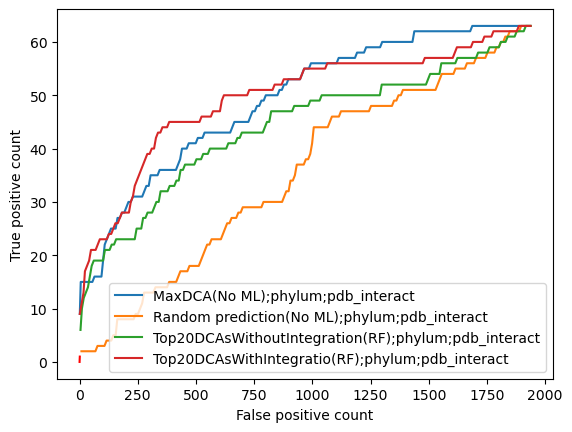

CPU times: user 2.7 s, sys: 115 ms, total: 2.82 s
Wall time: 2.64 s


In [351]:
%%time
count_label="count"
step=10
zoom_thres=None

DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)"+";phylum;pdb_interact",step=step,zoom_thres=zoom_thres)

Random_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)"+";phylum;pdb_interact",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             pdb_interact_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)"+";phylum;pdb_interact",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)"+";phylum;pdb_interact",step=step,zoom_thres=zoom_thres)



plt.show()

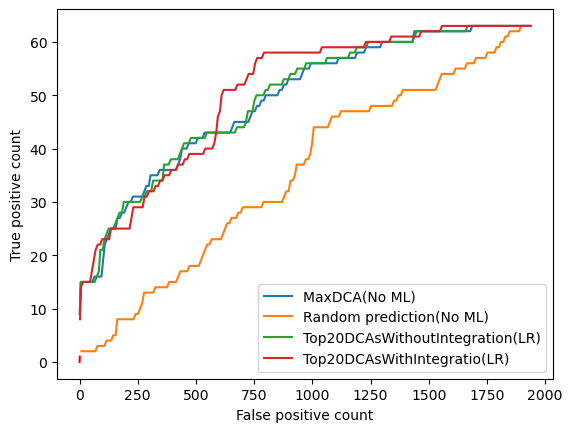

CPU times: user 2.7 s, sys: 124 ms, total: 2.83 s
Wall time: 2.66 s


In [352]:
%%time
count_label="count"
step=10
zoom_thres=None

DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres)


Random_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             pdb_interact_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(LR)",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(LR)",step=step,zoom_thres=zoom_thres)



plt.show()

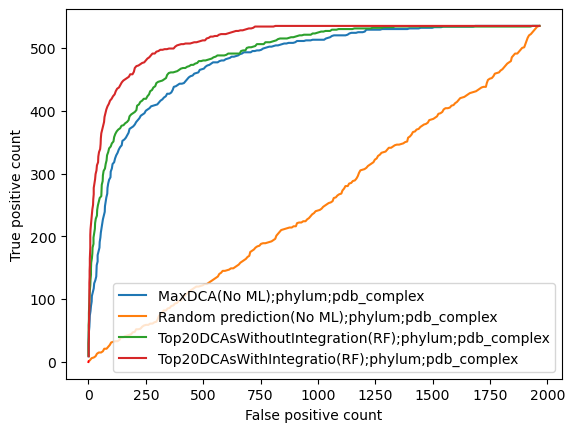

CPU times: user 4.13 s, sys: 102 ms, total: 4.23 s
Wall time: 4.05 s


In [353]:
%%time
count_label="count"
step=10
zoom_thres=None

DCA_RocCurve(pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)"+";phylum;pdb_complex",step=step,zoom_thres=zoom_thres)

Random_RocCurve(pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)"+";phylum;pdb_complex",step=step,zoom_thres=zoom_thres)





DCA_RocCurve(pdb_complex_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             pdb_complex_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)"+";phylum;pdb_complex",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)"+";phylum;pdb_complex",step=step,zoom_thres=zoom_thres)




plt.show()

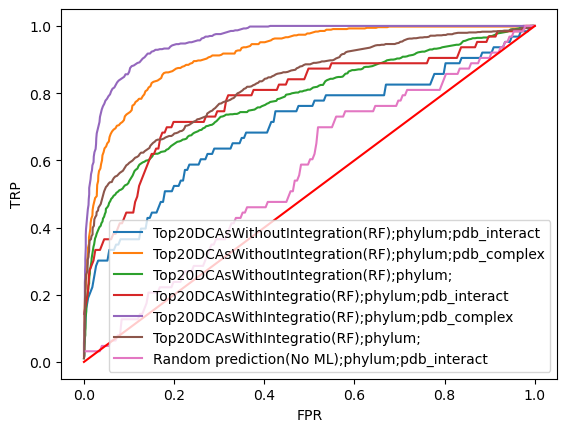

CPU times: user 9.68 s, sys: 123 ms, total: 9.81 s
Wall time: 9.62 s


In [400]:
%%time
count_label="rate"
step=10
zoom_thres=None

DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             pdb_interact_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)"+";phylum;pdb_interact",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(pdb_complex_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             pdb_complex_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)"+";phylum;pdb_complex",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)"+";phylum;",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)"+";phylum;pdb_interact",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)"+";phylum;pdb_complex",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)"+";phylum;",step=step,zoom_thres=zoom_thres)



Random_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)"+";phylum;pdb_interact",step=step,zoom_thres=zoom_thres)




plt.show()

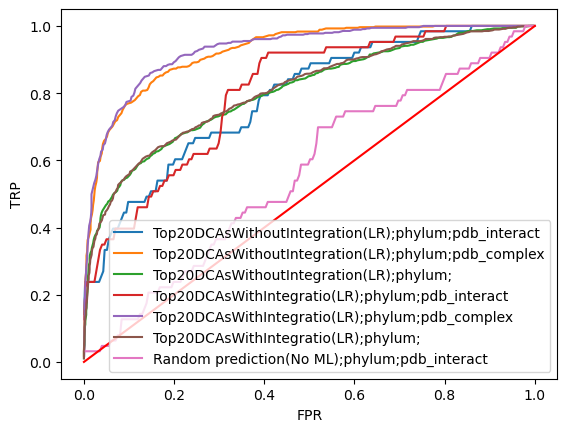

CPU times: user 9.78 s, sys: 0 ns, total: 9.78 s
Wall time: 9.59 s


In [405]:
%%time
count_label="rate"
step=10
zoom_thres=None

DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             pdb_interact_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(LR)"+";phylum;pdb_interact",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(pdb_complex_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             pdb_complex_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(LR)"+";phylum;pdb_complex",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(LR)"+";phylum;",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(LR)"+";phylum;pdb_interact",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(LR)"+";phylum;pdb_complex",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(LR)"+";phylum;",step=step,zoom_thres=zoom_thres)



Random_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)"+";phylum;pdb_interact",step=step,zoom_thres=zoom_thres)




plt.show()

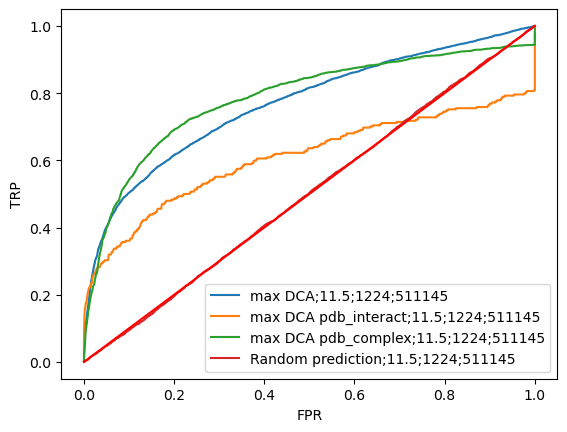

CPU times: user 12min 6s, sys: 0 ns, total: 12min 6s
Wall time: 12min 6s


In [406]:
%%time 
count_label="rate"
step=10#100
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["YtopDCAs"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step)



DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs"][pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["YtopDCAs"][pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx],
             count_label=count_label,legend="max DCA pdb_interact"+";11.5;1224;511145",step=step)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs"][pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["YtopDCAs"][pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_fixedNegVSposRratio_keepCombination_idx],
             count_label=count_label,legend="max DCA pdb_complex"+";11.5;1224;511145",step=step)

# DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs"][idx_pdb_otherpos_STRING115EggNog1224Spe511145_topDCAs_frame,0], 
#              STRING115EggNog1224Spe511145_topDCAs_predicted_results["YtopDCAs"][idx_pdb_otherpos_STRING115EggNog1224Spe511145_topDCAs_frame],
#              count_label=count_label,legend="max DCA otherpos"+";11.5;1224;511145",step=step)

Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["YtopDCAs"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)

plt.show()

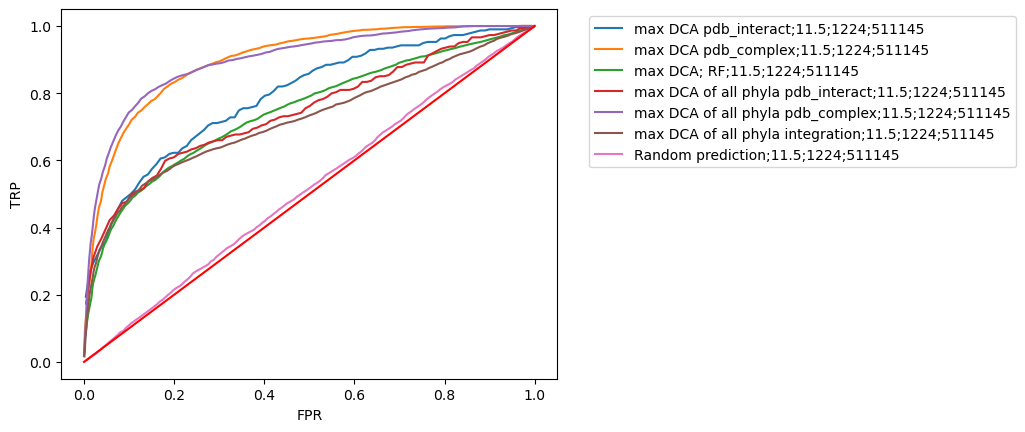

CPU times: user 32.2 s, sys: 0 ns, total: 32.2 s
Wall time: 32 s


In [420]:
%%time 
count_label="rate"
step=100
zoom_thres=None




DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas"][:,0], 
             pdb_interact_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["YtopFeas"],
             count_label=count_label,legend="max DCA pdb_interact"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(pdb_complex_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas"][:,0], 
             pdb_complex_STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["YtopFeas"],
             count_label=count_label,legend="max DCA pdb_complex"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["YtopFeas"],
             count_label=count_label,legend="max DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas"].max(axis=1),
             pdb_interact_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["YtopFeas"],
             count_label=count_label,legend="max DCA of all phyla pdb_interact"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas"].max(axis=1),
             pdb_complex_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["YtopFeas"],
             count_label=count_label,legend="max DCA of all phyla pdb_complex"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)
DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas"].max(axis=1),
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["YtopFeas"],
             count_label=count_label,legend="max DCA of all phyla integration"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["YtopFeas"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

# figure 3 

In [440]:
fig3C_list=list()
for _ ,row in beforeFixRatio_test_Phaly_PPInum_frame.iterrows():
    #print(row[1])
    fig3C_list.append([row[0]*4,row[1],"unfixedRatio_"+row[2]])
    
for _ ,row in afterFixRatio_test_Phaly_PPInum_frame_fixedNegVSposRratio.iterrows():
    #print(row[1])
    fig3C_list.append([row[0]*4,row[1],"fixedRatio_"+row[2]])
    
fig3C_frame=pd.DataFrame(fig3C_list,
                        columns=["Num Of missing values","Count", "Benchmark status"])



In [441]:
test_model=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]["Model"]
test_model.best_estimator_.feature_importances_

array([0.09028104, 0.09787431, 0.11355067, 0.10903802, 0.12265896,
       0.03166385, 0.03516154, 0.04177408, 0.04266978, 0.0470724 ,
       0.02690298, 0.02695168, 0.03284651, 0.03982591, 0.04385109,
       0.01741298, 0.01886036, 0.01924464, 0.02031199, 0.02204721])

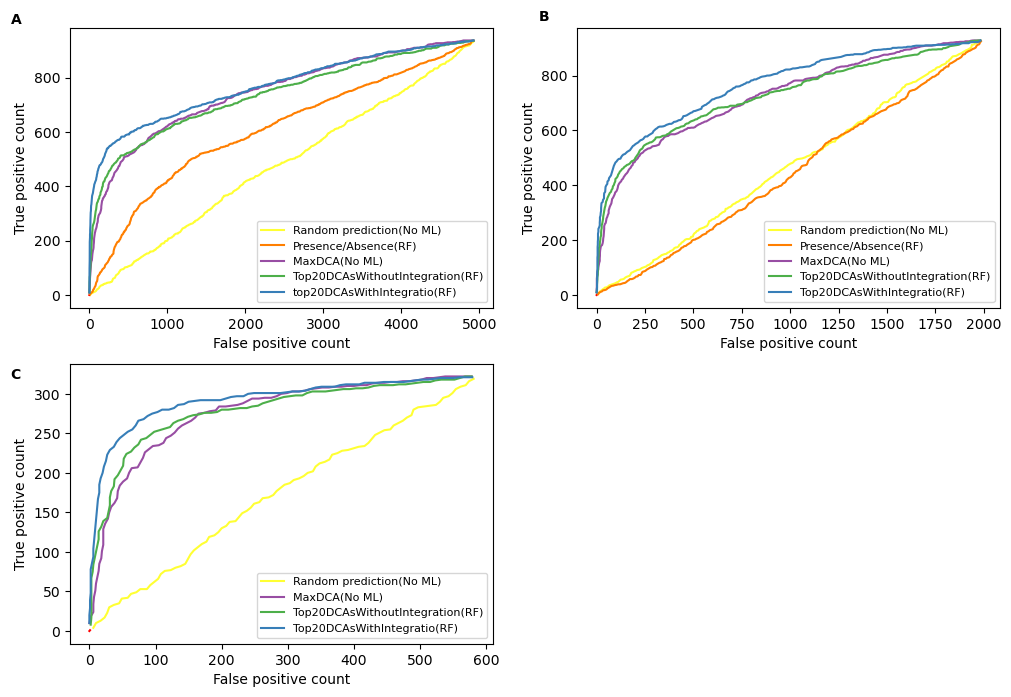

CPU times: user 37.2 s, sys: 138 ms, total: 37.4 s
Wall time: 36.9 s


In [503]:
%%time 
# Fig 3 
# https://towardsdatascience.com/4-simple-tips-for-plotting-multiple-graphs-in-python-38df2112965c
# https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

fig3 = plt.figure(figsize=(12,8))
count_label="count"
step=10 #10
zoom_thres=None

colors=['#ffff33', '#ff7f00', '#984ea3', '#4daf4a', '#377eb8', '#e41a1c']

axA = plt.subplot(2,2,1)
Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
                legend="Random prediction(No ML)",
                step=step,
                color=colors[0]
               )

DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="Presence/Absence(RF)",
             step=step,zoom_thres=zoom_thres,
                color=colors[1])

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="MaxDCA(No ML)",
             step=step,zoom_thres=zoom_thres,color=colors[2])


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="Top20DCAsWithoutIntegration(RF)",
             step=step,zoom_thres=zoom_thres,color=colors[3])

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="top20DCAsWithIntegratio(RF)",
             step=step,zoom_thres=zoom_thres,color=colors[4])



#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axA.set_title("Performance ",loc='left',loc='center',fontsize=10)
#ax1.set_xlabel("taaata",loc='left top')
axA.text(-1000, 1000, 'A', weight='bold')
axA.legend(fontsize=8)



axB =plt.subplot(2,2,2)
Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,color=colors[0])

DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Presence/Absence(RF)",step=step,zoom_thres=zoom_thres,color=colors[1])


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,color=colors[2])

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,color=colors[3])

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)",step=step,zoom_thres=zoom_thres,color=colors[4])



#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
axB.text(-300, 1000, 'B', weight='bold')
axB.legend(fontsize=8)




axC =plt.subplot(2,2,3)
Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,color=colors[0])

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,color=colors[2])

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,color=colors[3])


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)",step=step,zoom_thres=zoom_thres,color=colors[4])



axC.text(-120, 318.75, 'C', weight='bold') 
axC.legend(fontsize=8)
plt.show()

fig3.savefig("/mnt/mnemo5/tao/temp_figures/Fig3.pdf", dpi=600)




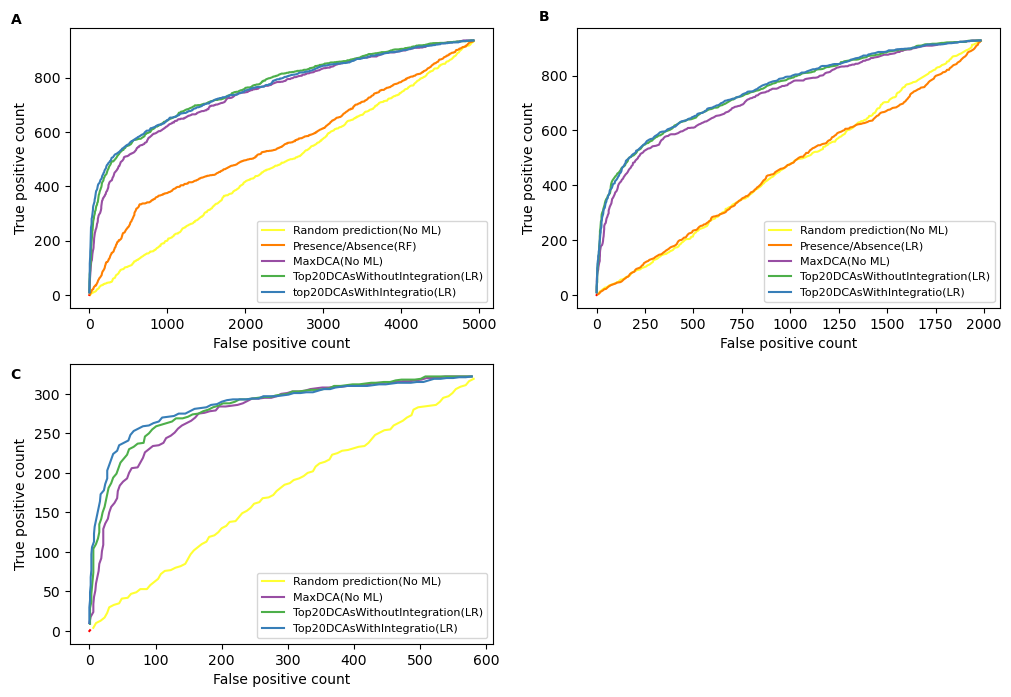

CPU times: user 37.1 s, sys: 12.4 ms, total: 37.1 s
Wall time: 36.9 s


In [502]:
%%time 
# Fig 3 this one use LR model not RF model 
fig3 = plt.figure(figsize=(12,8))
count_label="count"
step=10 #10
zoom_thres=None

colors=['#ffff33', '#ff7f00', '#984ea3', '#4daf4a', '#377eb8', '#e41a1c']

axA = plt.subplot(2,2,1)
Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
                legend="Random prediction(No ML)",
                step=step,
                color=colors[0]
               )

DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="Presence/Absence(RF)",
             step=step,zoom_thres=zoom_thres,
                color=colors[1])

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="MaxDCA(No ML)",
             step=step,zoom_thres=zoom_thres,color=colors[2])


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="Top20DCAsWithoutIntegration(LR)",
             step=step,zoom_thres=zoom_thres,color=colors[3])

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="top20DCAsWithIntegratio(LR)",
             step=step,zoom_thres=zoom_thres,color=colors[4])



#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axA.set_title("Performance ",loc='left',loc='center',fontsize=10)
#ax1.set_xlabel("taaata",loc='left top')
axA.text(-1000, 1000, 'A', weight='bold')
axA.legend(fontsize=8)



axB =plt.subplot(2,2,2)
Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,color=colors[0])

DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Presence/Absence(LR)",step=step,zoom_thres=zoom_thres,color=colors[1])


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,color=colors[2])

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(LR)",step=step,zoom_thres=zoom_thres,color=colors[3])

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(LR)",step=step,zoom_thres=zoom_thres,color=colors[4])



#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
axB.text(-300, 1000, 'B', weight='bold')
axB.legend(fontsize=8)




axC =plt.subplot(2,2,3)
Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,color=colors[0])

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,color=colors[2])

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(LR)",step=step,zoom_thres=zoom_thres,color=colors[3])


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(LR)",step=step,zoom_thres=zoom_thres,color=colors[4])



axC.text(-120, 318.75, 'C', weight='bold') 
axC.legend(fontsize=8)
plt.show()




CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11.7 µs


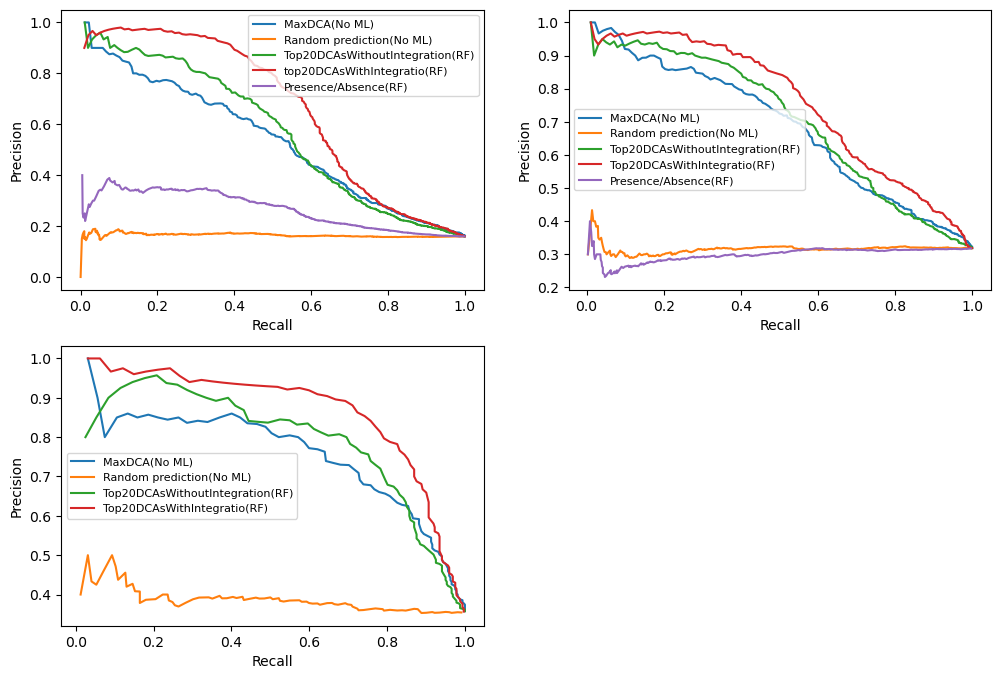

In [612]:
%time
plotType="PR"
count_label="rate"


# Fig 3 
# https://towardsdatascience.com/4-simple-tips-for-plotting-multiple-graphs-in-python-38df2112965c
# https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

fig3 = plt.figure(figsize=(12,8))
step=10
zoom_thres=None

axA = plt.subplot(2,2,1)
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="MaxDCA(No ML)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="Random prediction(No ML)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType, 
             randomplot=True)

# Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
#              count_label=count_label,
#                 legend="Random prediction(No ML)",
#                 step=step,
#                plotType=plotType)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="Top20DCAsWithoutIntegration(RF)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="top20DCAsWithIntegratio(RF)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="Presence/Absence(RF)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType)
#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axA.set_title("Performance ",loc='left',loc='center',fontsize=10)
#ax1.set_xlabel("taaata",loc='left top')
#axA.text(-1000, 1000, 'A', weight='bold')
axA.legend(fontsize=8)



axB =plt.subplot(2,2,2)
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            randomplot=True)
# Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,
#                plotType=plotType)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Presence/Absence(RF)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)


#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axB.text(-300, 1000, 'B', weight='bold')
axB.legend(fontsize=8)


# axC = plt.subplot(2,2,3)
# # https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146
# # Create an array with the colors you want to use
# colors = ["#404040", "#bababa","#ca0020","#f4a582"] # https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=4
# # Set your custom color palette
# #sns.set_palette(sns.color_palette(colors))
# customPalette = sns.set_palette(sns.color_palette(colors))
# ax=sns.barplot(x="Num Of missing values", y="Count",hue="Benchmark status", 
#             data=fig3C_frame,
#            palette=customPalette,
#               ax=axC)
# #axC.text(-1, 8500, 'C', weight='bold') 
# axC.legend(fontsize=8)
# sns.reset_defaults()



axD =plt.subplot(2,2,3)
DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            randomplot=True)

# Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
#              count_label=count_label,legend="Random prediction(No ML)",step=step,
#                plotType=plotType)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)


#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axD.text(-80, 318.75, 'D', weight='bold') # (300/8000)*(8500)=318.75
                                         # (600/3.5)*(-1)=171.428
axD.legend(fontsize=8)
plt.show()

fig3.savefig("/mnt/mnemo5/tao/temp_figures/Fig3.pdf", dpi=600)




CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11.4 µs


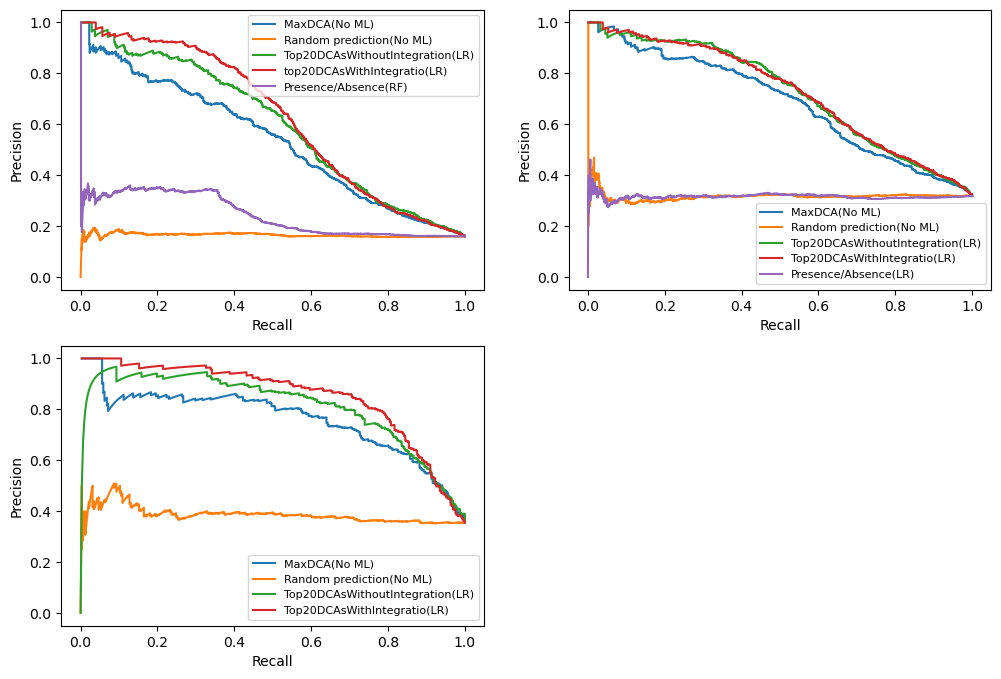

In [611]:
%time
plotType="PR"
count_label="rate" # this one use LR model 


# Fig 3 
# https://towardsdatascience.com/4-simple-tips-for-plotting-multiple-graphs-in-python-38df2112965c
# https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

fig3 = plt.figure(figsize=(12,8))
step=1
zoom_thres=None

axA = plt.subplot(2,2,1)
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="MaxDCA(No ML)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="Random prediction(No ML)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType, 
             randomplot=True)

# Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
#              count_label=count_label,
#                 legend="Random prediction(No ML)",
#                 step=step,
#                plotType=plotType)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="Top20DCAsWithoutIntegration(LR)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="top20DCAsWithIntegratio(LR)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="Presence/Absence(RF)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType)
#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axA.set_title("Performance ",loc='left',loc='center',fontsize=10)
#ax1.set_xlabel("taaata",loc='left top')
#axA.text(-1000, 1000, 'A', weight='bold')
axA.legend(fontsize=8)



axB =plt.subplot(2,2,2)
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            randomplot=True)
# Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,
#                plotType=plotType)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(LR)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(LR)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Presence/Absence(LR)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)


#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axB.text(-300, 1000, 'B', weight='bold')
axB.legend(fontsize=8)


# axC = plt.subplot(2,2,3)
# # https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146
# # Create an array with the colors you want to use
# colors = ["#404040", "#bababa","#ca0020","#f4a582"] # https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=4
# # Set your custom color palette
# #sns.set_palette(sns.color_palette(colors))
# customPalette = sns.set_palette(sns.color_palette(colors))
# ax=sns.barplot(x="Num Of missing values", y="Count",hue="Benchmark status", 
#             data=fig3C_frame,
#            palette=customPalette,
#               ax=axC)
# #axC.text(-1, 8500, 'C', weight='bold') 
# axC.legend(fontsize=8)
# sns.reset_defaults()



axD =plt.subplot(2,2,3)
DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            randomplot=True)

# Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
#              count_label=count_label,legend="Random prediction(No ML)",step=step,
#                plotType=plotType)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(LR)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(LR)",step=step,zoom_thres=zoom_thres,
            plotType=plotType)


#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axD.text(-80, 318.75, 'D', weight='bold') # (300/8000)*(8500)=318.75
                                         # (600/3.5)*(-1)=171.428
axD.legend(fontsize=8)
plt.show()





## figure 3 sup , check if add max DCA of all phyla , dropped

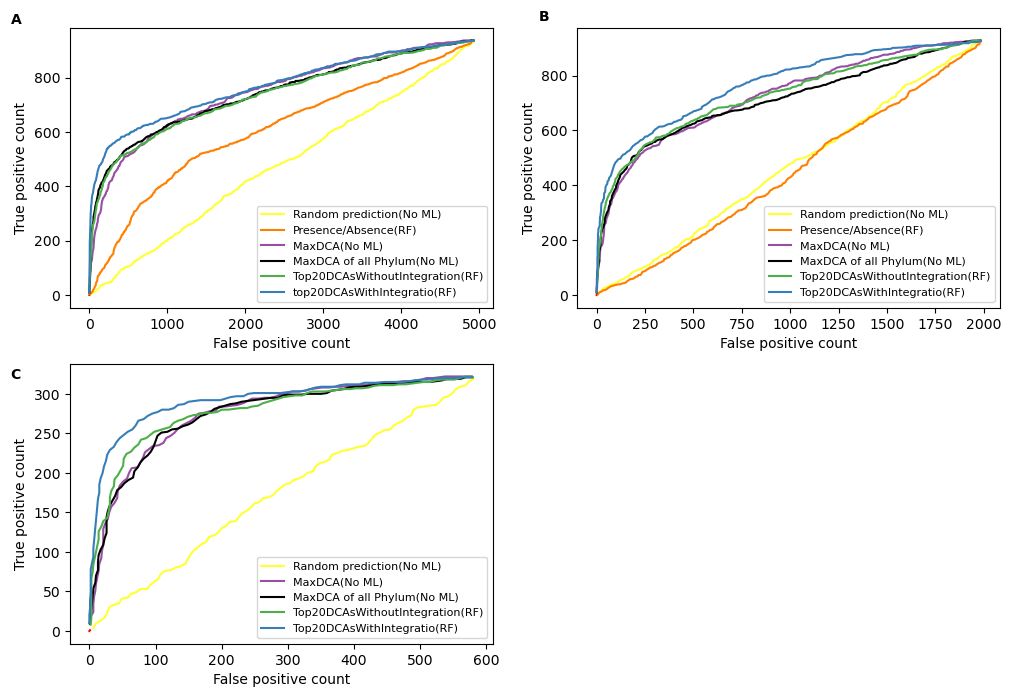

CPU times: user 45.6 s, sys: 163 ms, total: 45.7 s
Wall time: 45.3 s


In [481]:
%%time 
# Fig 3 
# https://towardsdatascience.com/4-simple-tips-for-plotting-multiple-graphs-in-python-38df2112965c
# https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

fig3 = plt.figure(figsize=(12,8))
count_label="count"
step=10 #10
zoom_thres=None

colors=['#ffff33', '#ff7f00', '#984ea3', '#4daf4a', '#377eb8', '#e41a1c']

axA = plt.subplot(2,2,1)
Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
                legend="Random prediction(No ML)",
                step=step,
                color=colors[0]
               )

DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="Presence/Absence(RF)",
             step=step,zoom_thres=zoom_thres,
                color=colors[1])


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="MaxDCA(No ML)",
             step=step,zoom_thres=zoom_thres,color=colors[2])


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XBestHomologousDCAs_test"].max(axis=1), 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="MaxDCA of all Phylum(No ML)",
             step=step,zoom_thres=zoom_thres,color="black")


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="Top20DCAsWithoutIntegration(RF)",
             step=step,zoom_thres=zoom_thres,color=colors[3])

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="top20DCAsWithIntegratio(RF)",
             step=step,zoom_thres=zoom_thres,color=colors[4])



#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axA.set_title("Performance ",loc='left',loc='center',fontsize=10)
#ax1.set_xlabel("taaata",loc='left top')
axA.text(-1000, 1000, 'A', weight='bold')
axA.legend(fontsize=8)



axB =plt.subplot(2,2,2)
Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,color=colors[0])

DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Presence/Absence(RF)",step=step,zoom_thres=zoom_thres,color=colors[1])


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,color=colors[2])



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"].max(axis=1), 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,
             legend="MaxDCA of all Phylum(No ML)",
             step=step,zoom_thres=zoom_thres,color="black")

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,color=colors[3])

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)",step=step,zoom_thres=zoom_thres,color=colors[4])



#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
axB.text(-300, 1000, 'B', weight='bold')
axB.legend(fontsize=8)




axC =plt.subplot(2,2,3)
Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,color=colors[0])

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,color=colors[2])


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XtopFeas_test"].max(axis=1), 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,
             legend="MaxDCA of all Phylum(No ML)",
             step=step,zoom_thres=zoom_thres,color="black")

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,color=colors[3])


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)",step=step,zoom_thres=zoom_thres,color=colors[4])



axC.text(-120, 318.75, 'C', weight='bold') 
axC.legend(fontsize=8)
plt.show()

fig3.savefig("/mnt/mnemo5/tao/temp_figures/Fig3.pdf", dpi=600)




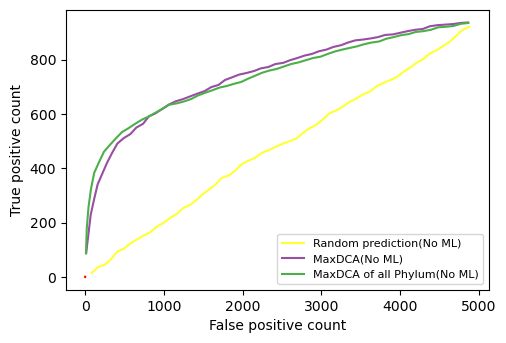

CPU times: user 1.63 s, sys: 105 ms, total: 1.73 s
Wall time: 1.59 s


In [477]:
%%time 
# Fig 3 
# https://towardsdatascience.com/4-simple-tips-for-plotting-multiple-graphs-in-python-38df2112965c
# https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

fig3 = plt.figure(figsize=(12,8)) #plt.figure(figsize=(12,8))
count_label="count"
step=100 #10
zoom_thres=None

colors=['#ffff33', '#ff7f00', '#984ea3', '#4daf4a', '#377eb8', '#e41a1c']

axA = plt.subplot(2,2,1)
Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
                legend="Random prediction(No ML)",
                step=step,
                color=colors[0]
               )


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="MaxDCA(No ML)",
             step=step,zoom_thres=zoom_thres,color=colors[2])

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XBestHomologousDCAs_test"].max(axis=1), 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="MaxDCA of all Phylum(No ML)",
             step=step,zoom_thres=zoom_thres,color=colors[3])


#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axA.set_title("Performance ",loc='left',loc='center',fontsize=10)
#ax1.set_xlabel("taaata",loc='left top')
#axA.text(-1000, 1000, 'A', weight='bold')

axA.legend(fontsize=8)

plt.show()

## sup figure 1 

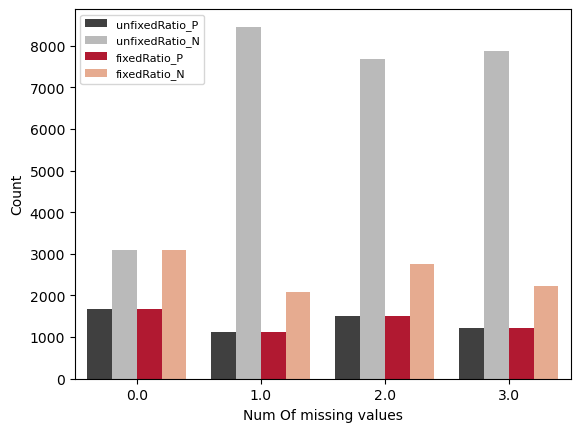

In [439]:
#axC = plt.subplot(2,2,3)
axC= plt.subplot(1,1,1)
# https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146
# Create an array with the colors you want to use
colors = ["#404040", "#bababa","#ca0020","#f4a582"] # https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=4
# Set your custom color palette
#sns.set_palette(sns.color_palette(colors))
customPalette = sns.set_palette(sns.color_palette(colors))
ax=sns.barplot(x="Num Of missing values", y="Count",hue="Benchmark status", 
            data=fig3C_frame,
           palette=customPalette,
              ax=axC)
axC.legend(fontsize=8)
sns.reset_defaults()

plt.show()

# remove training from benchmark 


In [603]:
def RemoveCertainPPfrom_allPredictionResults(result_list,pp_list,
                                             allNeedPP_status,
                                                     certainPP_dict,
                                                   KeepOrRemove="keep",
                                                   returnNumericStatus=False):
    # here notice pp names  in pp_list and trainPP_dict should be both sorted 
    assert len(result_list)==len(pp_list)
    print(len(result_list),len(pp_list))

    keepIdx=[idx for idx, pp in enumerate(pp_list) if tuple(pp) not in certainPP_dict]
    
    result_list_keepIdx=[result_list[idx] for idx in keepIdx]
    pp_list_keepIdx=[tuple(pp_list[idx]) for idx in keepIdx]
    
    print(len(result_list_keepIdx),len(pp_list_keepIdx))
    
    if returnNumericStatus:
        pp_list_keepIdx=[1 if allNeedPP_status[pp]=="P" else 0 for pp in pp_list_keepIdx]
        return(result_list_keepIdx,pp_list_keepIdx)
    else:
        return(result_list_keepIdx,pp_list_keepIdx)

In [604]:
HighDCA_Subject_allPPI_status_dict={k:v[0] for k,v in HighDCA_Subject_allPPI_allInfo_dict.items()}

In [605]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs_status=\
{pp:HighDCA_Subject_allPPI_allInfo_dict[pp][0] for pp in STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs}

print(len(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs_status))

12746


In [606]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results.keys()

dict_keys(['XBestHomologousDCAs', 'YBestHomologousDCAs', 'XBestHomologousDCAs_train', 'XBestHomologousDCAs_test', 'yBestHomologousDCAs_train', 'yBestHomologousDCAs_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [607]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'].shape




(32619, 20)

In [608]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['XtopFeas'].shape


(15664, 20)

In [609]:
%%time
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_maxDCAs,\
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_pps=\
RemoveCertainPPfrom_allPredictionResults(np.max(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'],axis=1),
                                    STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['updated_allPPI_allInfo_frame'].loc[:,["STRING_ID1","STRING_ID2"]].values.tolist(),
                                               allNeedPP_status=HighDCA_Subject_allPPI_status_dict,
                                certainPP_dict=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs_status,
                                    returnNumericStatus=True
                                              )



STRING115EggNog1224Spe511145_maxDCAs,\
STRING115EggNog1224Spe511145_pps=\
RemoveCertainPPfrom_allPredictionResults(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'][:,0],
                                    STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['updated_allPPI_allInfo_frame'].loc[:,["STRING_ID1","STRING_ID2"]].values.tolist(),
                                               allNeedPP_status=HighDCA_Subject_allPPI_status_dict,
                                certainPP_dict=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs_status,
                                    returnNumericStatus=True
                                              )



STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_LR_results,\
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_LR_pps=\
RemoveCertainPPfrom_allPredictionResults(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["updated_allPPI_allInfo_frame"]["LR_onesProb"],
                                    STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['updated_allPPI_allInfo_frame'].loc[:,["STRING_ID1","STRING_ID2"]].values.tolist(),
                                               allNeedPP_status=HighDCA_Subject_allPPI_status_dict,
                                certainPP_dict=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs_status,
                                    returnNumericStatus=True
                                              )

STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_RF_results,\
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_RF_pps=\
RemoveCertainPPfrom_allPredictionResults(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["updated_allPPI_allInfo_frame"]["RF_onesProb"],
                                    STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['updated_allPPI_allInfo_frame'].loc[:,["STRING_ID1","STRING_ID2"]].values.tolist(),
                                               allNeedPP_status=HighDCA_Subject_allPPI_status_dict,
                                certainPP_dict=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs_status,
                                    returnNumericStatus=True
                                              )


32619 32619
19873 19873
32619 32619
19873 19873
32619 32619
19873 19873
32619 32619
19873 19873
CPU times: user 214 ms, sys: 0 ns, total: 214 ms
Wall time: 213 ms


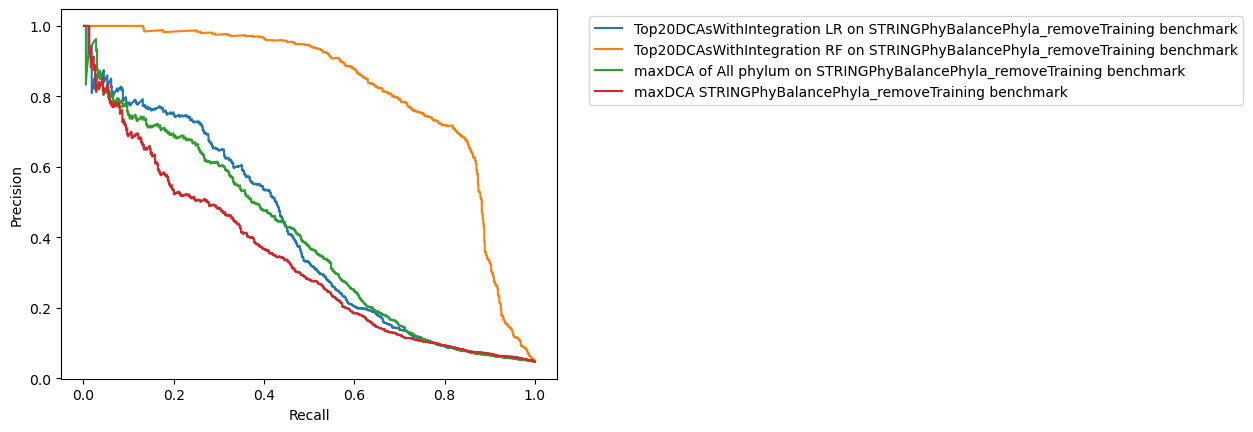

CPU times: user 7.41 s, sys: 125 ms, total: 7.54 s
Wall time: 7.33 s


In [610]:
%%time
step=1
zoom_thres=None #None#100000  #2269192,30000, 300
plotType="PR"
tiny_randomnoise_range=0.01

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_LR_results,
                        STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_LR_pps,
                       legend="Top20DCAsWithIntegration LR on STRINGPhyBalancePhyla_removeTraining benchmark",
                       step=step,
                       zoom_thres=zoom_thres,
                         plotType=plotType,
             tiny_randomnoise_range=tiny_randomnoise_range,
                                              )


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_RF_results,
                        STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_RF_pps,
                       legend="Top20DCAsWithIntegration RF on STRINGPhyBalancePhyla_removeTraining benchmark",
                       step=step,
                       zoom_thres=zoom_thres,
             plotType=plotType,
             tiny_randomnoise_range=tiny_randomnoise_range
                                              )

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_maxDCAs,
                        STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_pps,
                       legend="maxDCA of All phylum on STRINGPhyBalancePhyla_removeTraining benchmark",
                       step=step,
                       zoom_thres=zoom_thres,
             plotType=plotType,
             tiny_randomnoise_range=tiny_randomnoise_range
                                              )


DCA_RocCurve(STRING115EggNog1224Spe511145_maxDCAs,
                        STRING115EggNog1224Spe511145_pps,
                       legend="maxDCA STRINGPhyBalancePhyla_removeTraining benchmark",
                       step=step,
                       zoom_thres=zoom_thres,
             plotType=plotType,
             tiny_randomnoise_range=tiny_randomnoise_range
                                              )







# plt.legend(  loc='upper right' )
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )

plt.show()                                    
                                               
# when step=10, zoom_thres=30000, take arount 2 mins , each 
                                               

In [595]:
print(len(set(STRING115EggNog1224Spe511145_maxDCAs)),len(set(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_maxDCAs)))


print(len(set(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_LR_results)),len(set(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_RF_results)))

8177 8833
19873 19538


In [601]:
sorted(STRING115EggNog1224Spe511145_maxDCAs)[0:3]

[0.3868, 0.4114, 0.4125]

In [602]:
sorted(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_maxDCAs)[0:3]

[0.4235, 0.441, 0.4479]

In [600]:
sum(STRING115EggNog1224Spe511145_pps)

928

# test including small phylum 
go to 
test_includeSmallPhyla_withLowDCA_phylumeffect_STRINGPhyBalancePhyla_visulization_fullHomologous_oneBestHomologousPP.ipynb

# bias of missing values checking for phylum integration , goes to 

http://localhost:8206/lab/workspaces/auto-l/tree/code/MNF/notebooks/STRING_Data_11.5/test_phylumeffect_visulization_fullHomologous_oneBestHomologousPP_inspectMissingValue.ipynb

# now combined with all kinds of additinal features 

adapt code from http://localhost:8206/lab/workspaces/auto-l/tree/code/MNF/notebooks/STRING_Data_11.5/CoEvo_EggNOG_STRING115_EggNog1224_varyEggNOGMaxLevels_STRINPhyPPI_simpleMLmodels.ipynb



In [250]:
for this better to use new notebook and use save data from this notebook
as this notebook curretly is large and complicated enough

/MNF/notebooks/STRING_Data_11.5/test_phylumeffect_visulization_fullHomologous_oneBestHomologousPP_allFeatures.ipynb

SyntaxError: invalid syntax (<ipython-input-250-6bcd2fcba2e3>, line 1)